In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
from pylab import *
%matplotlib inline

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Reading the data as dataframe

In [5]:
concrete_df=pd.read_csv('concrete.csv')

In [6]:
concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

# Exploratory Data Analysis

In [7]:
# Shape of the data
# =================
concrete_df.shape

(1030, 9)

In [8]:
#Inference: The given has 1030 datapoints with 9 attributes

In [9]:
# Checking for the presence of missing values
# ===========================================
print('Total No.of NaN values in each attributes')
concrete_df.isnull().sum()

Total No.of NaN values in each attributes


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [10]:
# Inference about Missing Values
# ------------------------------
# All the 9 attributes doesn't have any missing values
# No missing values are observed.

In [11]:
# Checking for the presence of missing values & Data Pollution
# ============================================================
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
# Inference about Missing Values & Data Pollution
# -----------------------------------------------
# All the 9 attributes doesn't have any missing values
# All the 9 attributes have the datatype as float64 and int64. (not as object datatype)
# So missing values were not replaced with '?' or '#' (No Data Pollution is also observed)

In [13]:
# Checking for duplicate records
# ==============================
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = concrete_df[concrete_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   
604   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
733   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
738   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
766   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
830   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
880   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
884   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
892   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
933   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
943   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
967   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
992   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   

     strength  
278     33.40  
298     33.40  
400     35.30  
420     35.30  
463     77.30  
468     19.69  
482     65.20  
493     79.30  
517     64.30  
525     71.30  
527     65.20  
576     55.90  
577     60.29  
604     77.30  
733     79.30  
738     71.30  
766     79.30  
830     49.20  
880     64.30  
884     49.20  
892     77.30  
933     55.90  
943     35.30  
967     71.30  
992     60.29

In [14]:
duplicateRowsDF.shape

(25, 9)

In [15]:
# Inference about Duplicate Records
# ---------------------------------
# Totally 25 duplicate records are present

In [16]:
# Finding out the range of values
# ===============================
Concrete_Range=concrete_df.describe().transpose()[['min','max']]
Concrete_Range['Range']=Concrete_Range['max']-Concrete_Range['min']
Concrete_Range

min     max   Range
cement        102.00   540.0  438.00
slag            0.00   359.4  359.40
ash             0.00   200.1  200.10
water         121.80   247.0  125.20
superplastic    0.00    32.2   32.20
coarseagg     801.00  1145.0  344.00
fineagg       594.00   992.6  398.60
age             1.00   365.0  364.00
strength        2.33    82.6   80.27

In [17]:
# Inference from Range of values
# ------------------------------
# Cement ranges from 102 to 540
# Slag ranges from 0 to 359.4
# Ash ranges from 0 to 200.1
# Water ranges from 121.80 to 247.80
# Superplastic ranges from 0.00 to 32.2
# Coarseagg ranges from 801.00 to 1145.0
# Fineagg ranges from 594.00 to 992.6
# age ranges from 1.00 to 365.0
# Strength from 2.33 t0 82.6

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

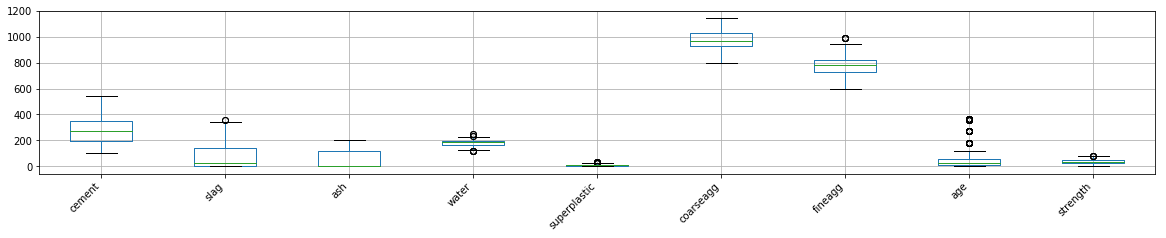

In [18]:
# Observing the Outliers using box plot
# =====================================
concrete_df.boxplot(figsize=(20,3))
plt.xticks(rotation=45,ha="right")

In [19]:
# Inference from the box plot:
# ----------------------------
# Outliers were observed in the attributes 'slag', 'water', 'superplastic', 'fineagg', 'age' and 'strength' 

## Univariate Analysis

In [20]:
# Descriptive Statistics
# ======================
# 5 point summary of numerical attribute
concrete_df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

mean      :  281.1678640776698
median    :  272.9
variance  :  10910.976743981531
std dev   :  104.455620930525
skewness  :  0.5087389156389815
kurtosois :  2.4760521281730985


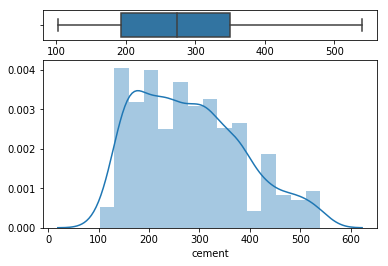

In [21]:
# Analysing the attribute 'cement'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['cement'], ax=ax_box)
sns.distplot(concrete_df['cement'], ax=ax_hist, kde=True)

print("mean      : ", np.mean(concrete_df['cement']))
print("median    : ", np.median(concrete_df['cement']))
print("variance  : ", np.var(concrete_df['cement']))
print("std dev   : ", np.std(concrete_df['cement']))
print("skewness  : ", skew(concrete_df['cement']))
print("kurtosois : ", kurtosis(concrete_df['cement'], fisher = False))

In [22]:
# Inference about the attribute 'cement'
# -------------------------------------
# Mean and Median is almost similar
# Outliers is not available.
# Skewness is between (0.5 and 1) ==> So it is moderately skewed
# Kurtosis < 3 ==> So it has Thin tail (sharper than normal distribution)

In [23]:
# Analysing the data spread for the attribute 'cement'
print("Minimum        : ", concrete_df['cement'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['cement'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['cement'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['cement'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['cement'].max()) # Maximum Value
print("Range          : ", concrete_df['cement'].max()-concrete_df['cement'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['cement'].quantile(0.25)-concrete_df['cement'].min())
print("Q2-Q1          : ", concrete_df['cement'].quantile(0.50)-concrete_df['cement'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['cement'].quantile(0.75)-concrete_df['cement'].quantile(0.50))
print("Max-Q3         : ", concrete_df['cement'].max()-concrete_df['cement'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['cement'].quantile(0.75)-concrete_df['cement'].quantile(0.25))


Minimum        :  102.0
1st Quantile   :  192.375
2nd Quantile   :  272.9
3rd Quantile   :  350.0
Maximum        :  540.0
Range          :  438.0


Q1-Min         :  90.375
Q2-Q1          :  80.52499999999998
Q3-Q2          :  77.10000000000002
Max-Q3         :  190.0


IQR          :  157.625


In [24]:
# Inference about the attribute 'cement'
# -------------------------------------
# Q1-Min < Max-Q3 ==> Comparitively Longer tails observed at the right hand side
# Q2-Q1 & Q3-Q2 have approximately equal distribution 

mean   :  73.89582524271844
median :  22.0
var    :  7436.897506843171
std    :  86.23744840174233
skew   :  0.7995503309986298
kurt   :  2.4884684490378692


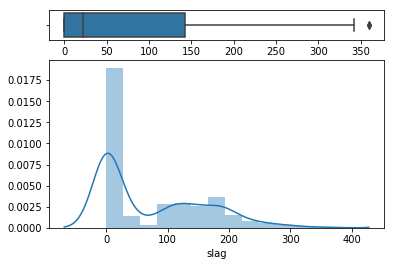

In [25]:
# Analysing the attribute 'slag'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['slag'], ax=ax_box)
sns.distplot(concrete_df['slag'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['slag']))
print("median : ", np.median(concrete_df['slag']))
print("var    : ", np.var(concrete_df['slag']))
print("std    : ", np.std(concrete_df['slag']))
print("skew   : ", skew(concrete_df['slag']))
print("kurt   : ", kurtosis(concrete_df['slag'], fisher = False))

In [26]:
# Inference about the attribute 'slag'
# -------------------------------------
# Two gaussians were observed
# Huge difference between mean and median
# Nearly 471 datapoints have zero values
# Few Outliers were observed

In [27]:
# Analysing the data spread for the attribute 'slag'
print("Minimum        : ", concrete_df['slag'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['slag'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['slag'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['slag'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['slag'].max()) # Maximum Value
print("Range          : ", concrete_df['slag'].max()-concrete_df['cement'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['slag'].quantile(0.25)-concrete_df['slag'].min())
print("Q2-Q1          : ", concrete_df['slag'].quantile(0.50)-concrete_df['slag'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['slag'].quantile(0.75)-concrete_df['slag'].quantile(0.50))
print("Max-Q3         : ", concrete_df['slag'].max()-concrete_df['slag'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['slag'].quantile(0.75)-concrete_df['slag'].quantile(0.25))


Minimum        :  0.0
1st Quantile   :  0.0
2nd Quantile   :  22.0
3rd Quantile   :  142.95
Maximum        :  359.4
Range          :  257.4


Q1-Min         :  0.0
Q2-Q1          :  22.0
Q3-Q2          :  120.94999999999999
Max-Q3         :  216.45


IQR          :  142.95


In [28]:
# Inference about the attribute 'slag'
# -------------------------------------
# Q1-Min = 0 ==> Most of the attributes have zero values
# Q1-Min < Max-Q3 ==> Comparitively Longer tails observed at the right hand side & oultiers observed in the right hand side
# Difference between Q2-Q1 & Q3-Q2 is huge. So the body of the distribution is right skewed. 

mean   :  54.188349514563086
median :  0.0
var    :  4091.6402137807895
std    :  63.965930101740796
skew   :  0.5365710347923704
kurt   :  1.6718754368776017


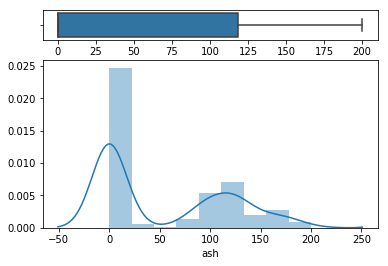

In [29]:
# Analysing the attribute 'ash'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['ash'], ax=ax_box)
sns.distplot(concrete_df['ash'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['ash']))
print("median : ", np.median(concrete_df['ash']))
print("var    : ", np.var(concrete_df['ash']))
print("std    : ", np.std(concrete_df['ash']))
print("skew   : ", skew(concrete_df['ash']))
print("kurt   : ", kurtosis(concrete_df['ash'], fisher = False))

In [30]:
# Inference about the attribute 'ash'
# -------------------------------------
# Two gaussians were observed
# Huge difference between mean and median
# Nearly 566 datapoints have zero values
# Outliers are not observed in the box plot

In [31]:
# Analysing the data spread for the attribute 'ash'
print("Minimum        : ", concrete_df['ash'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['ash'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['ash'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['ash'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['ash'].max()) # Maximum Value
print("Range          : ", concrete_df['ash'].max()-concrete_df['ash'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['ash'].quantile(0.25)-concrete_df['ash'].min())
print("Q2-Q1          : ", concrete_df['ash'].quantile(0.50)-concrete_df['ash'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['ash'].quantile(0.75)-concrete_df['ash'].quantile(0.50))
print("Max-Q3         : ", concrete_df['ash'].max()-concrete_df['ash'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['ash'].quantile(0.75)-concrete_df['ash'].quantile(0.25))

Minimum        :  0.0
1st Quantile   :  0.0
2nd Quantile   :  0.0
3rd Quantile   :  118.3
Maximum        :  200.1
Range          :  200.1


Q1-Min         :  0.0
Q2-Q1          :  0.0
Q3-Q2          :  118.3
Max-Q3         :  81.8


IQR          :  118.3


In [32]:
# Inference about the attribute 'ash'
# -------------------------------------
# Q1-Min & Q2-Q1 = 0 ==> So nearly 50% of the data points have zero values in the 'ash' attribute
# Q1-Min << Max-Q3 ==> Comparitively Longer tails observed at the right hand side & oultiers observed in the right hand side
# Difference between Q2-Q1 & Q3-Q2 is huge. So the body of the distribution is right skewed. 

mean   :  181.56728155339798
median :  185.0
var    :  455.5599295032511
std    :  21.343849922243436
skew   :  0.07451965817729818
kurt   :  3.115670257236671


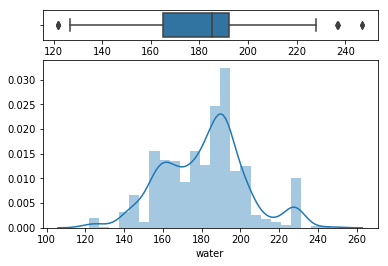

In [33]:
# Analysing the attribute 'water'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['water'], ax=ax_box)
sns.distplot(concrete_df['water'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['water']))
print("median : ", np.median(concrete_df['water']))
print("var    : ", np.var(concrete_df['water']))
print("std    : ", np.std(concrete_df['water']))
print("skew   : ", skew(concrete_df['water']))
print("kurt   : ", kurtosis(concrete_df['water'], fisher = False))

In [34]:
# Inference about the attribute 'water'
# -------------------------------------
# Mean and median is almost similar
# Few outliers were observed both in left and right hand side of the whiskers plot.
# 3 small gaussians were observed.
# Skewness is between (-0.5 and 0.5) ==> So it is approximately symmetric
# Kurtosis > 3 ==> So it has Thick tail (broader than normal distribution)

In [35]:
# Analysing the data spread for the attribute 'water'
print("Minimum        : ", concrete_df['water'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['water'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['water'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['water'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['water'].max()) # Maximum Value
print("Range          : ", concrete_df['water'].max()-concrete_df['water'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['water'].quantile(0.25)-concrete_df['water'].min())
print("Q2-Q1          : ", concrete_df['water'].quantile(0.50)-concrete_df['water'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['water'].quantile(0.75)-concrete_df['water'].quantile(0.50))
print("Max-Q3         : ", concrete_df['water'].max()-concrete_df['water'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['water'].quantile(0.75)-concrete_df['water'].quantile(0.25))

Minimum        :  121.8
1st Quantile   :  164.9
2nd Quantile   :  185.0
3rd Quantile   :  192.0
Maximum        :  247.0
Range          :  125.2


Q1-Min         :  43.10000000000001
Q2-Q1          :  20.099999999999994
Q3-Q2          :  7.0
Max-Q3         :  55.0


IQR          :  27.099999999999994


In [36]:
# Inference about the attribute 'water'
# -------------------------------------
# Q1-Min > Max-Q3 ==> Comparitively Longer tails observed at the left hand side 
# Oultiers are observed both in the left and right hand side
# Q2-Q1 > Q3-Q2. So the body of the distribution is slightly left skewed. 

mean   :  6.204660194174756
median :  6.4
var    :  35.652133622395944
std    :  5.970940765272751
skew   :  0.9058808712519942
kurt   :  4.398607857846008


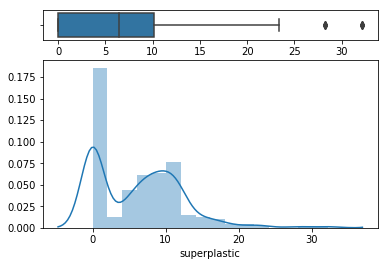

In [37]:
# Analysing the attribute 'superplastic'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['superplastic'], ax=ax_box)
sns.distplot(concrete_df['superplastic'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['superplastic']))
print("median : ", np.median(concrete_df['superplastic']))
print("var    : ", np.var(concrete_df['superplastic']))
print("std    : ", np.std(concrete_df['superplastic']))
print("skew   : ", skew(concrete_df['superplastic']))
print("kurt   : ", kurtosis(concrete_df['superplastic'], fisher = False))

In [38]:
# Inference about the attribute 'superplastic'
# ---------------------------------------------
# Mean and median is almost similar
# Few outliers were observed both in right hand side of the whiskers plot.
# 2 gaussians were observed.
# Nearly 379 datapoints have zero values

In [39]:
# Analysing the data spread for the attribute 'superplastic'
print("Minimum        : ", concrete_df['superplastic'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['superplastic'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['superplastic'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['superplastic'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['superplastic'].max()) # Maximum Value
print("Range          : ", concrete_df['superplastic'].max()-concrete_df['superplastic'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['superplastic'].quantile(0.25)-concrete_df['superplastic'].min())
print("Q2-Q1          : ", concrete_df['superplastic'].quantile(0.50)-concrete_df['superplastic'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['superplastic'].quantile(0.75)-concrete_df['superplastic'].quantile(0.50))
print("Max-Q3         : ", concrete_df['superplastic'].max()-concrete_df['superplastic'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['superplastic'].quantile(0.75)-concrete_df['superplastic'].quantile(0.25))

Minimum        :  0.0
1st Quantile   :  0.0
2nd Quantile   :  6.4
3rd Quantile   :  10.2
Maximum        :  32.2
Range          :  32.2


Q1-Min         :  0.0
Q2-Q1          :  6.4
Q3-Q2          :  3.799999999999999
Max-Q3         :  22.000000000000004


IQR          :  10.2


In [40]:
# Inference about the attribute 'superplastic'
# -------------------------------------
# Q1-Min = 0 ==> Most of the attributes have zero values
# Q1-Min < Max-Q3 ==> Comparitively Longer tails observed at the right hand side & few oultiers observed in the right hand side
# Q2-Q1 < Q3-Q2. So the body of the distribution is right skewed. 

mean   :  972.918932038835
median :  968.0
var    :  6039.807767791513
std    :  77.71620016310314
skew   :  -0.04016114865669757
kurt   :  2.398068199640477


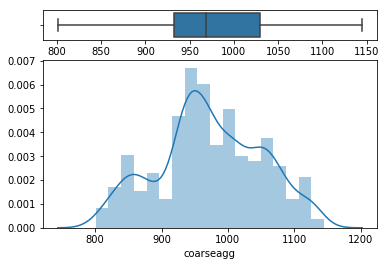

In [41]:
# Analysing the attribute 'courseagg'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['coarseagg'], ax=ax_box)
sns.distplot(concrete_df['coarseagg'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['coarseagg']))
print("median : ", np.median(concrete_df['coarseagg']))
print("var    : ", np.var(concrete_df['coarseagg']))
print("std    : ", np.std(concrete_df['coarseagg']))
print("skew   : ", skew(concrete_df['coarseagg']))
print("kurt   : ", kurtosis(concrete_df['coarseagg'], fisher = False))

In [42]:
# Inference about the attribute 'coarseagg'
# -----------------------------------------
# Mean and median is almost similar
# Outliers were not available.
# Skewness is between (-0.5 and 0.5) ==> So it is approximately symmetric
# Kurtosis < 3 ==> So it has thin tail (sharper than normal distribution)

In [43]:
# Analysing the data spread for the attribute 'coarseagg'
print("Minimum        : ", concrete_df['coarseagg'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['coarseagg'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['coarseagg'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['coarseagg'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['coarseagg'].max()) # Maximum Value
print("Range          : ", concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['coarseagg'].quantile(0.25)-concrete_df['coarseagg'].min())
print("Q2-Q1          : ", concrete_df['coarseagg'].quantile(0.50)-concrete_df['coarseagg'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['coarseagg'].quantile(0.75)-concrete_df['coarseagg'].quantile(0.50))
print("Max-Q3         : ", concrete_df['coarseagg'].max()-concrete_df['coarseagg'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['coarseagg'].quantile(0.75)-concrete_df['coarseagg'].quantile(0.25))

Minimum        :  801.0
1st Quantile   :  932.0
2nd Quantile   :  968.0
3rd Quantile   :  1029.4
Maximum        :  1145.0
Range          :  344.0


Q1-Min         :  131.0
Q2-Q1          :  36.0
Q3-Q2          :  61.40000000000009
Max-Q3         :  115.59999999999991


IQR          :  97.40000000000009


In [44]:
# Inference about the attribute 'coarseagg'
# -----------------------------------------
# Q1-Min & Max-Q3 are nearly equal and no ouliers were observed.
# Q2-Q1 < Q3-Q2. So the body of the distribution is right skewed. 

mean   :  773.5804854368932
median :  779.5
var    :  6421.946832774069
std    :  80.1370503124121
skew   :  -0.2526409879628909
kurt   :  2.892498749138446


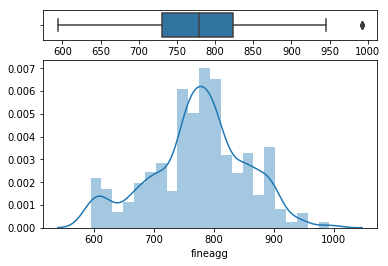

In [45]:
# Analysing the attribute 'fineagg'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['fineagg'], ax=ax_box)
sns.distplot(concrete_df['fineagg'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['fineagg']))
print("median : ", np.median(concrete_df['fineagg']))
print("var    : ", np.var(concrete_df['fineagg']))
print("std    : ", np.std(concrete_df['fineagg']))
print("skew   : ", skew(concrete_df['fineagg']))
print("kurt   : ", kurtosis(concrete_df['fineagg'], fisher = False))

In [46]:
# Inference about the attribute 'fineagg'
# -----------------------------------------
# Mean and median is almost similar
# Outliers were observed at the right hand side of the whiskers plot.
# Skewness is between (-0.5 and 0.5) ==> So it is approximately symmetric
# Kurtosis < 3 ==> So it has thin tail (sharper than normal distribution)

In [47]:
# Analysing the data spread for the attribute 'fineagg'
print("Minimum        : ", concrete_df['fineagg'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['fineagg'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['fineagg'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['fineagg'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['fineagg'].max()) # Maximum Value
print("Range          : ", concrete_df['fineagg'].max()-concrete_df['fineagg'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['fineagg'].quantile(0.25)-concrete_df['fineagg'].min())
print("Q2-Q1          : ", concrete_df['fineagg'].quantile(0.50)-concrete_df['fineagg'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['fineagg'].quantile(0.75)-concrete_df['fineagg'].quantile(0.50))
print("Max-Q3         : ", concrete_df['fineagg'].max()-concrete_df['fineagg'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['fineagg'].quantile(0.75)-concrete_df['fineagg'].quantile(0.25))

Minimum        :  594.0
1st Quantile   :  730.9499999999999
2nd Quantile   :  779.5
3rd Quantile   :  824.0
Maximum        :  992.6
Range          :  398.6


Q1-Min         :  136.94999999999993
Q2-Q1          :  48.55000000000007
Q3-Q2          :  44.5
Max-Q3         :  168.60000000000002


IQR          :  93.05000000000007


In [48]:
# Inference about the attribute 'fineagg'
# -----------------------------------------
# Q1-Min < Max-Q3  and ouliers were observed in the right hand side.
# Q2-Q1 & Q3-Q2 is almost similar. So the body of the distribution is almost symmetric. 

mean   :  45.662135922330094
median :  28.0
var    :  3986.563517767971
std    :  63.13923912883312
skew   :  3.264414535416805
kurt   :  15.104176861479678


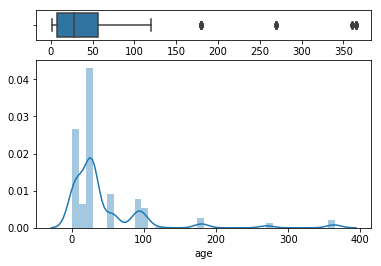

In [49]:
# Analysing the attribute 'age'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['age'], ax=ax_box)
sns.distplot(concrete_df['age'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['age']))
print("median : ", np.median(concrete_df['age']))
print("var    : ", np.var(concrete_df['age']))
print("std    : ", np.std(concrete_df['age']))
print("skew   : ", skew(concrete_df['age']))
print("kurt   : ", kurtosis(concrete_df['age'], fisher = False))

In [50]:
# Inference about the attribute 'age'
# -----------------------------------------
# Huge difference is observed between the mean and median
# Outliers were observed at the right hand side of the whiskers plot.
# Gaussians were observed
# From the Distance plot it is observed that the there are certain amount of unique values in age

In [51]:
# Observing the unique values.
concrete_df['age'].unique()

array([ 28,  14,  90,   7,  56,   3, 100,  91, 180, 365, 270, 360, 120,
         1], dtype=int64)

In [52]:
# In the given pdf document the age is given from 1~365. 
# The maximum value observed is 365. So the Outliers shown in the given value is not the extreme values.
# So outliers are not necessary to be treated for 'age' attributes

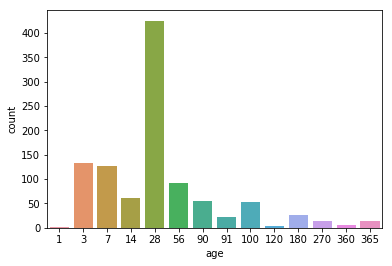

In [53]:
# Counting the no. of datapoints for each unique values under 'age' attribute
concrete_df['age'].value_counts()
sns.countplot(concrete_df['age'])

In [54]:
# Inference from the unique values:
# -----------------------------------------------------------------------------------------------------
# Strength of the concrete were observed in 1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365
# Strength of concrete were observed for 14 different ages.
# More no.of observations for concrete strengths is made on 28th day

In [55]:
# Analysing the data spread for the attribute 'age'
print("Minimum        : ", concrete_df['age'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['age'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['age'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['age'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['age'].max()) # Maximum Value
print("Range          : ", concrete_df['age'].max()-concrete_df['age'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['age'].quantile(0.25)-concrete_df['age'].min())
print("Q2-Q1          : ", concrete_df['age'].quantile(0.50)-concrete_df['age'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['age'].quantile(0.75)-concrete_df['age'].quantile(0.50))
print("Max-Q3         : ", concrete_df['age'].max()-concrete_df['age'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['age'].quantile(0.75)-concrete_df['age'].quantile(0.25))

Minimum        :  1
1st Quantile   :  7.0
2nd Quantile   :  28.0
3rd Quantile   :  56.0
Maximum        :  365
Range          :  364


Q1-Min         :  6.0
Q2-Q1          :  21.0
Q3-Q2          :  28.0
Max-Q3         :  309.0


IQR          :  49.0


In [56]:
# Inference about the attribute 'age'
# -----------------------------------------
# Q1-Min << Max-Q3  and so more no.of ouliers were observed in the right hand side.
# Q2-Q1 & Q3-Q2 is almost similar. So the body of the distribution is almost symmetric. 

mean   :  35.81796116504854
median :  34.445
var    :  278.8108612800451
skew   :  0.4163697941146936
kurt   :  2.681976414563422


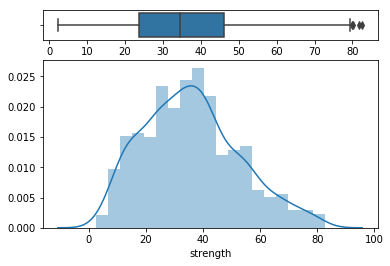

In [57]:
# Analysing the attribute 'strength'
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(concrete_df['strength'], ax=ax_box)
sns.distplot(concrete_df['strength'], ax=ax_hist, kde=True)

print("mean   : ", np.mean(concrete_df['strength']))
print("median : ", np.median(concrete_df['strength']))
print("var    : ", np.var(concrete_df['strength']))
print("skew   : ", skew(concrete_df['strength']))
print("kurt   : ", kurtosis(concrete_df['strength'], fisher = False))

In [58]:
# Inference about the attribute 'strength'
# -----------------------------------------
# Mean and median is almost similar
# Outliers were observed in the right hand side of the whiskers plot.
# Skewness is between (-0.5 and 0.5) ==> So it is approximately symmetric
# Kurtosis < 3 ==> So it has thin tail (sharper than normal distribution)

In [59]:
# Analysing the data spread for the attribute 'strength'
print("Minimum        : ", concrete_df['strength'].min()) # Minimum Value
print("1st Quantile   : ", concrete_df['strength'].quantile(0.25)) # 1st Quantile
print("2nd Quantile   : ", concrete_df['strength'].quantile(0.50)) # 2nd Quantile/Median
print("3rd Quantile   : ", concrete_df['strength'].quantile(0.75)) # 3rd Quantile
print("Maximum        : ", concrete_df['strength'].max()) # Maximum Value
print("Range          : ", concrete_df['strength'].max()-concrete_df['strength'].min()) #Range of the attribute
print("\n")
print("Q1-Min         : ", concrete_df['strength'].quantile(0.25)-concrete_df['strength'].min())
print("Q2-Q1          : ", concrete_df['strength'].quantile(0.50)-concrete_df['strength'].quantile(0.25))
print("Q3-Q2          : ", concrete_df['strength'].quantile(0.75)-concrete_df['strength'].quantile(0.50))
print("Max-Q3         : ", concrete_df['strength'].max()-concrete_df['strength'].quantile(0.75))
print("\n")
print("IQR          : ", concrete_df['strength'].quantile(0.75)-concrete_df['strength'].quantile(0.25))

Minimum        :  2.33
1st Quantile   :  23.709999999999997
2nd Quantile   :  34.445
3rd Quantile   :  46.135000000000005
Maximum        :  82.6
Range          :  80.27


Q1-Min         :  21.379999999999995
Q2-Q1          :  10.735000000000003
Q3-Q2          :  11.690000000000005
Max-Q3         :  36.46499999999999


IQR          :  22.425000000000008


In [60]:
# Inference about the attribute 'strength'
# -----------------------------------------
# Q1-Min < Max-Q3  and so ouliers were observed in the right hand side.
# Q2-Q1 & Q3-Q2 is almost similar. So the body of the distribution is almost symmetric. 

### Challenges

1. Dropping out the duplicate records
2. As per the domain experts suggestion the strength of concrete depends on the ratios of 'cement:coarseagg:fineagg ratios'
3. In the given problem statement the age is given as 1 to 365 days. But it is observed as outliers in EDA

## Bivariate Analysis

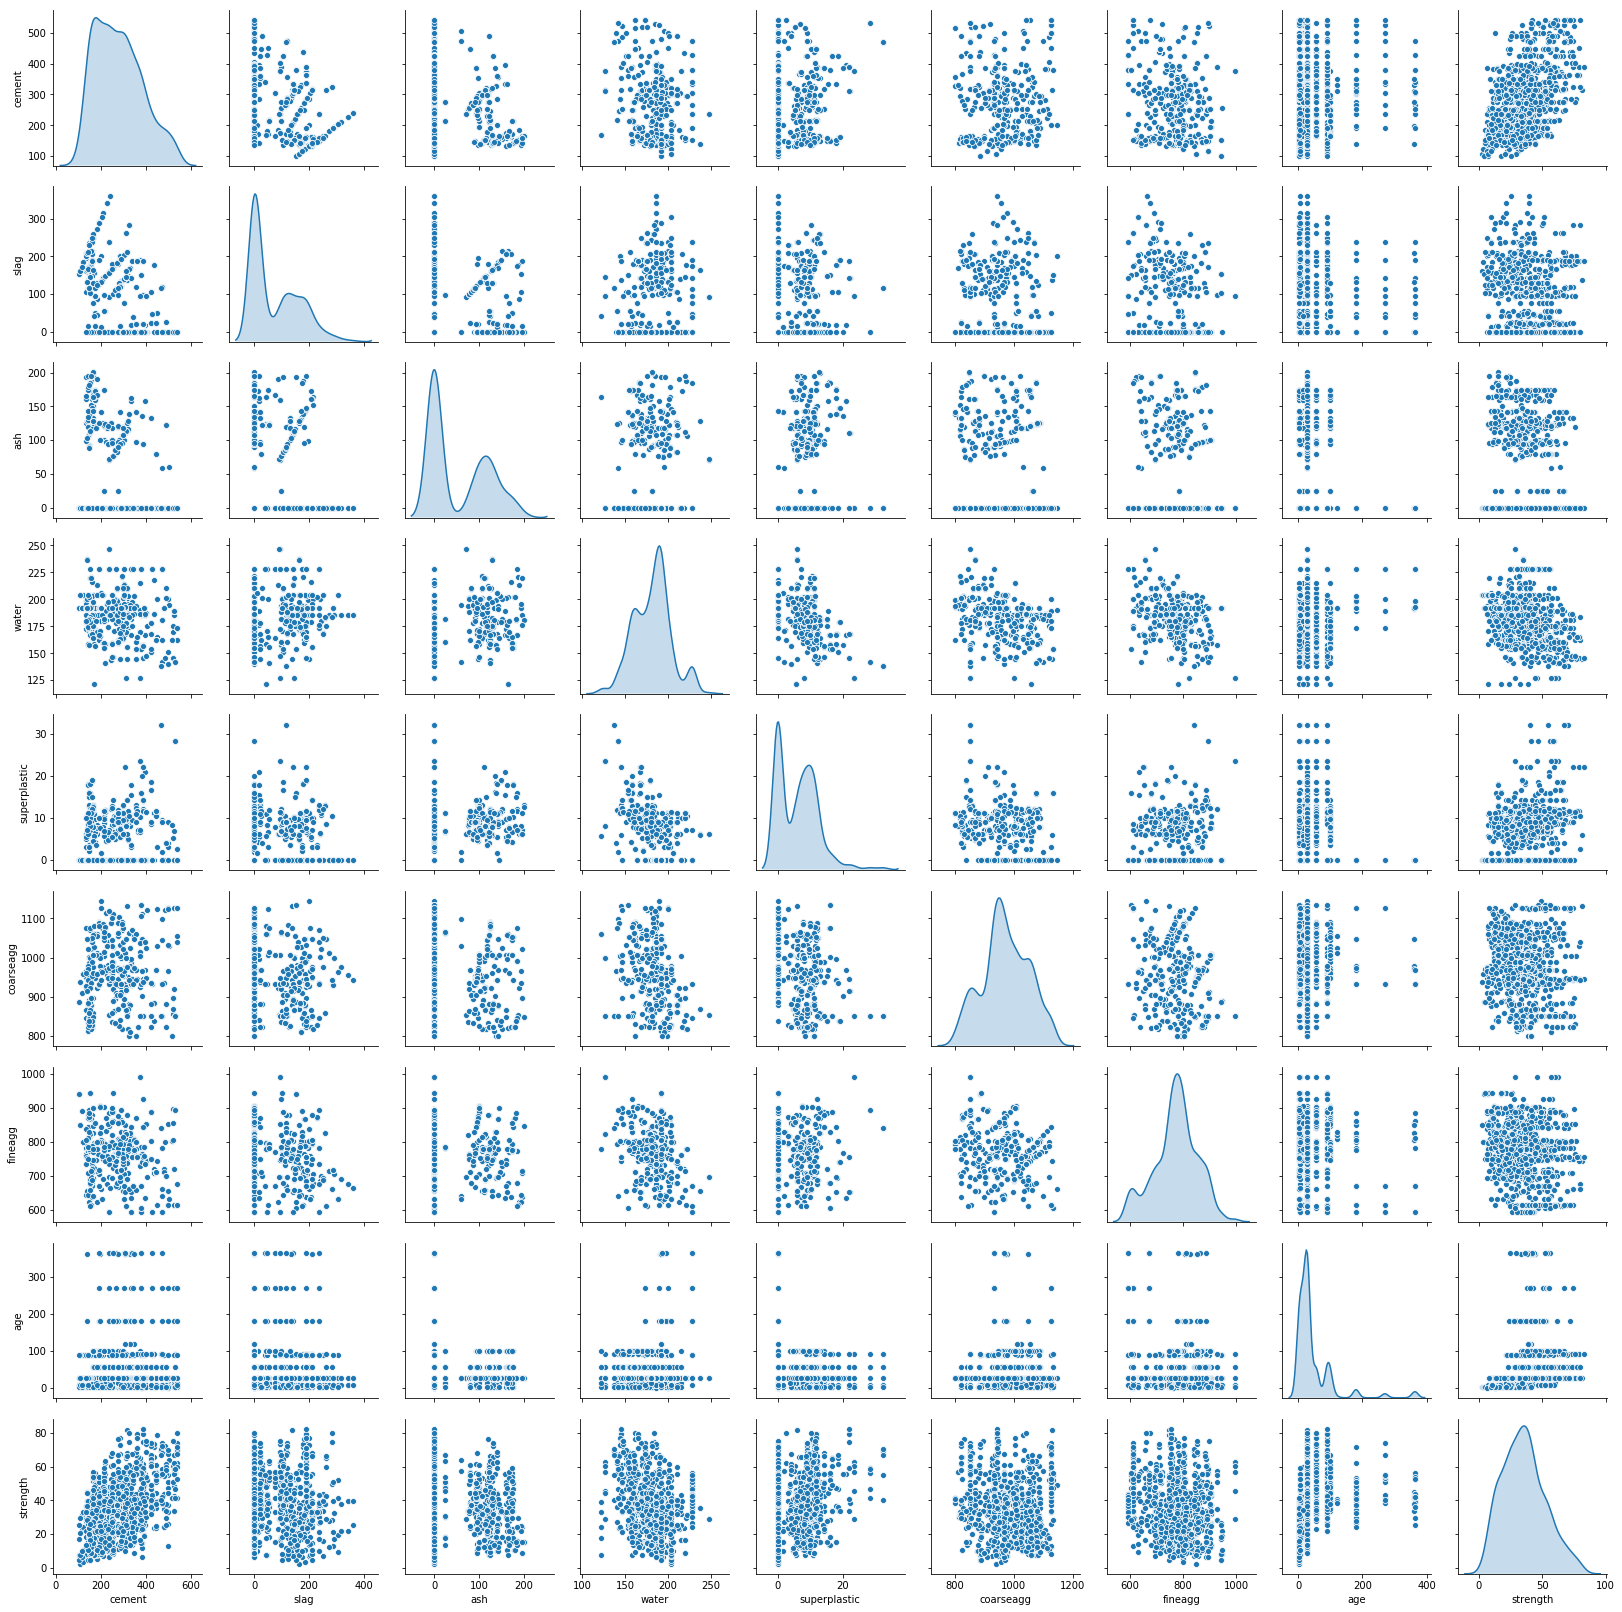

In [61]:
# Pair plot between all the independent attributes and dependent attributes
sns.pairplot(concrete_df, diag_kind='kde')

In [62]:
# Inference from the pair plot:
# ----------------------------
# Strong relationship is observed between the cement and strength
# No much relationship is found out between other attributes
# 2 Gaussions observed in the attribute 'slag'
# 2 Gaussions observed in the attribute 'ash'
# 3 Gaussions observed in the attribute 'water'
# 2 Gaussians observed in the attribute 'superplastic'
# 3 Gaussians observed in the attribute 'coarseagg'
# 2 Gaussians observed in the attribute 'Fineagg'
# 5 Gaussians observed in the attribute 'age'

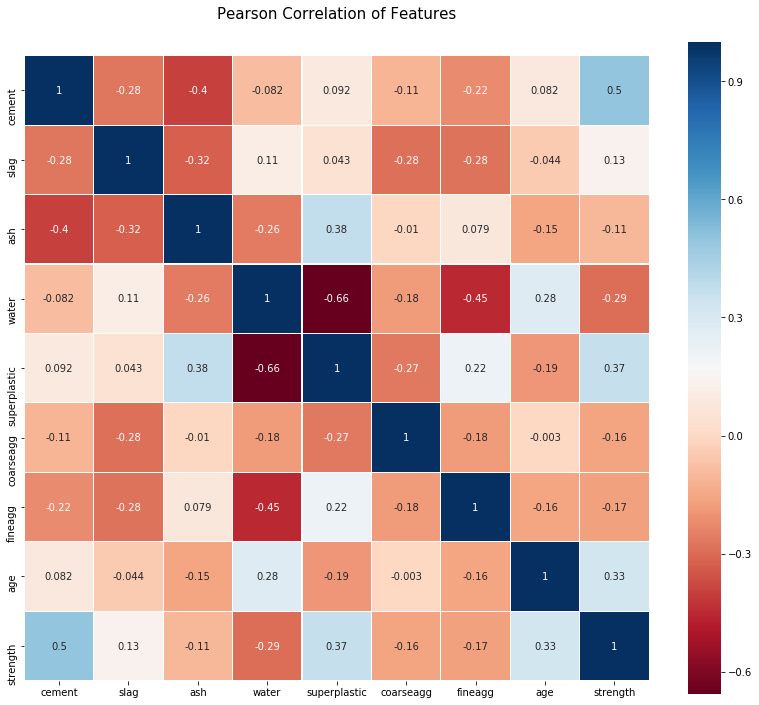

In [63]:
# Observing the relationship between different attributes with the target class
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(concrete_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [64]:
# Writing down the relationship between independent attribute and dependent attribute in order of importance (descending order)
# -----------------------------------------------------------------------------------------------------------------------------
# Cement          0.5
# Superplastic    0.37
# Age             0.33
# Water         - 0.29
# Fineagg       - 0.17
# Coarseagg     - 0.16
# Slag            0.13
# Ash           - 0.11

### Strategies to address different data challenges
1. Data Pollution - Not Available
2. Outliers       - Available (Outliers need to be handled but Valid age is also observed as outliers in box plot)
3. Missing Values - Not Available
4. Converting the given data into ratios (As per Domain Experts Suggession)
5. For the given data superplastic has higher relationship with the target attribute 'strength' next to cement. But as per domain expert suggesion it should have less relationship with strength. The most important independent attributes are cement, fineagg, coarseagg, water and age

### Before Handling the outliers data preprocessing should be done to convert the data into ratios (As per domain experts Suggesstion)

# Iteration 1
1. Outliers are not treated (since valid ages are also observed as outliers in box plot)
2. The Given dataset is used as it is after removing duplicate data

In [65]:
# Removing Duplicate Data
concrete_Iter1=concrete_df.copy(deep=True)
concrete_Iter1.drop_duplicates(keep='first', inplace=True) # To remove 25 duplicate datapoints in the dataset
concrete_Iter1.shape

(1005, 9)

In [66]:
concrete_Iter1.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [67]:
X=concrete_Iter1.drop('strength',axis=1) # Independent Attribute
y=concrete_Iter1.pop('strength') # Dependent Attribute

In [68]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1) # Splitting 70:30 training and test set ratios
num_folds=10
seed=7

## Using Linear Regression

In [69]:
kfold=KFold(n_splits=num_folds,random_state=seed)
LR_model=LinearRegression()
results=cross_val_score(LR_model,X_train, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.60221945 0.6195546  0.54672164 0.58477621 0.67211622 0.7184639
 0.58887881 0.56665793 0.4575404  0.65573822]


In [70]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 60.127%
 Standard Deviation : 6.878%


In [71]:
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

In [72]:
# Let us explore the coefficients for each of the independent attributes and the intercept
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[idx]))
intercept=LR_model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for cement is 0.13001790864764937
The coefficient for slag is 0.10892210093466248
The coefficient for ash is 0.09396745486494847
The coefficient for water is -0.12028826446915697
The coefficient for superplastic is 0.3183496395241164
The coefficient for coarseagg is 0.0230879909332276
The coefficient for fineagg is 0.03229064317676662
The coefficient for age is 0.10906711141772381
The intercept for our model is -46.49337273612008


In [73]:
# comparing the tested and predicted values
values_of_tested_and_predicted=pd.DataFrame(np.vstack([y_test,y_pred]).T)
values_of_tested_and_predicted.columns=['y_test', 'y_pred']
values_of_tested_and_predicted.head()

y_test     y_pred
0   68.30  57.216480
1   18.91  20.379196
2   55.20  55.138920
3   25.20  52.354961
4   32.63  36.779367

In [74]:
print("The accuracy score for training set is %12.16f" %LR_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %LR_model.score(X_test,y_test))

The accuracy score for training set is 0.6217217238825692
The accuracy score for testing set is 0.5419610271323057


In [75]:
# r square value for testing
r_square_for_testing=LR_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.5419610271323057
The adjusted R Square value for testing set is 0.5382819992377861
The RMSE value for testing set is 10.3168494129413233


Text(0, 0.5, 'y_predict')

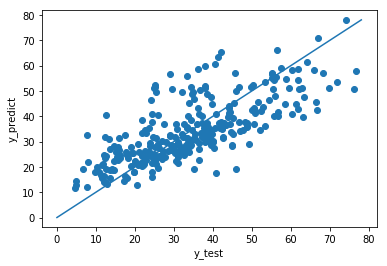

In [76]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')


count    302.000000
mean      -0.055456
std       10.333824
min      -27.753294
25%       -6.359497
50%        0.941600
75%        6.664426
max       26.560596
Name: strength, dtype: float64

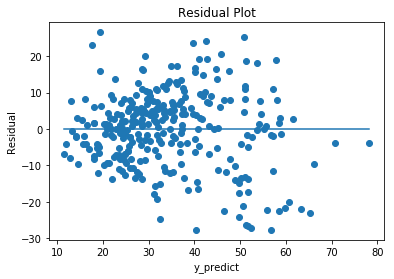

In [77]:
#Residual Plot Analysis
residuals=y_test-y_pred #Difference between predicted and actual value
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
ax.plot([min(y_pred), max(y_pred)], [0, 0])
plt.xlabel('y_predict')
plt.ylabel('Residual')
plt.title('Residual Plot')
residuals.describe()

In [78]:
# Inference from the residual plot
# --------------------------------
# Mean of residual is -0.055456
# But still residuals are more at many data points

In [79]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Linear_Regression_Metrics1 = pd.DataFrame({'Model':['Linear Regression'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Linear_Regression_Metrics1=Linear_Regression_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Linear_Regression_Metrics1

Model performance range with 95 percentage confidence level is : 60.127%  (13.482%)


Model       RMSE  R Square Value  Adjusted R Square Value
0  Linear Regression  10.316849        0.541961                 0.538282

In [80]:
# Inference from the Performance Metrics for Linear Regression Iteration 1
# -----------------------------------------------------------------------------------------------
# Accuracy performance with 95% confidence level at validation data set is : 60.127 %  (13.482%)
# Accuracy performance observed at test data set is                        : 54.196 %

## Using Polynomial Regression (degree=2)

In [81]:
poly=PolynomialFeatures(degree=2, interaction_only=True) #Considering Polynomial degree as 2
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

In [82]:
print(X_train.shape)
print(X_train_2.shape)

(703, 8)
(703, 37)


In [83]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 37

In [84]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR2_model=linear_model.LinearRegression()
results=cross_val_score(PR2_model,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.73542942 0.71810489 0.61495933 0.70520623 0.77770635 0.74391565
 0.70404192 0.80080025 0.57824105 0.73734722]


In [85]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 71.158%
 Standard Deviation : 6.470%


In [86]:
PR2_model.fit(X_train_2,y_train)
y_pred = PR2_model.predict(X_test_2)

In [87]:
# comparing the tested and predicted values
values_of_tested_and_predicted=pd.DataFrame(np.vstack([y_test,y_pred]).T)
values_of_tested_and_predicted.columns=['y_test', 'y_pred']
values_of_tested_and_predicted.head()

y_test     y_pred
0   68.30  58.592933
1   18.91  20.443366
2   55.20  57.651671
3   25.20  47.092396
4   32.63  27.594836

In [88]:
print("The accuracy score for training set is %12.16f" %PR2_model.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %PR2_model.score(X_test_2,y_test))

The accuracy score for training set is 0.7594975479928061
The accuracy score for testing set is 0.6896719798013224


In [89]:
# r square value for testing
r_square_for_testing=PR2_model.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6896719798013224
The adjusted R Square value for testing set is 0.6871793852615740
The RMSE value for testing set is 8.4919293211788958


Text(0, 0.5, 'y_predict')

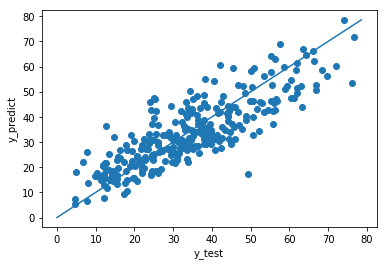

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

count    302.000000
mean       0.541652
std        8.488703
min      -23.850716
25%       -5.320374
50%        0.381292
75%        6.807607
max       31.961221
Name: strength, dtype: float64

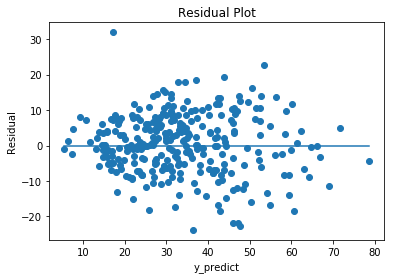

In [91]:
#Residual Plot Analysis
residuals=y_test-y_pred #Difference between predicted and actual value
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
ax.plot([min(y_pred), max(y_pred)], [0, 0])
plt.xlabel('y_predict')
plt.ylabel('Residual')
plt.title('Residual Plot')
residuals.describe()

In [92]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2 = pd.DataFrame({'Model':['Polynomial Regression - degree 2'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2=Polynomial_Regression_Metrics1_degree2[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2

Model performance range with 95 percentage confidence level is : 71.158%  (12.682%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2  8.491929        0.689672   

   Adjusted R Square Value  
0                 0.687179

In [93]:
Comparison_Table1=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2])
Comparison_Table1

Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 2   8.491929        0.689672   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179

In [94]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=2 performs better than linear regression
# Trying to improve the performance with Ridge and Lasso Regression for Polynomial degree =2

## Using Polynomial Regression (degree=2)  & Ridge Regression

In [95]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.73504033 0.71991491 0.61462535 0.70498647 0.77804852 0.74330267
 0.70391234 0.80075231 0.57800323 0.7389245 ]


In [96]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 71.175%  (12.716%)


In [97]:
ridge.fit(X_train_2,y_train)
print('Ridge model:', (ridge.coef_))

Ridge model: [ 0.00000000e+00  3.35038712e-01 -1.63822748e-02  2.79452136e-02
  1.45525905e+00 -7.38158817e+00 -1.68065302e-02 -2.18862799e-01
 -6.68101480e-01  1.30882665e-04  2.22450246e-04 -1.77129739e-03
 -2.79963550e-03  3.08217067e-05  8.47075690e-05  5.33326590e-04
  3.99600186e-04 -1.11863040e-03  7.69175287e-04  9.23680945e-06
  3.06776332e-04  7.63726339e-04 -2.33940264e-03 -5.34925971e-03
  9.26976845e-05  3.57479662e-04  1.66548701e-03  1.56789885e-02
 -7.87787032e-04 -1.58875527e-04 -4.39433339e-05  3.85890886e-03
  2.86453339e-03  6.20204813e-03  1.74952066e-04  1.07494745e-04
  5.94228590e-04]


In [98]:
y_pred = ridge.predict(X_test_2)

In [99]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_2,y_test))

The accuracy score for training set is 0.7594849428312305
The accuracy score for testing set is 0.6904769942187022


In [100]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6904769942187022
The adjusted R Square value for testing set is 0.6879908656582099
The RMSE value for testing set is 8.4809078145693384


Text(0, 0.5, 'y_predict')

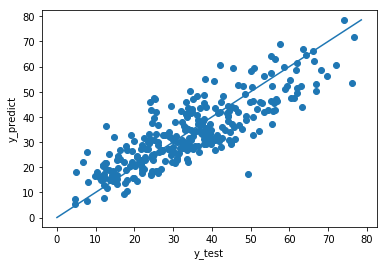

In [101]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [102]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_ridge=Polynomial_Regression_Metrics1_degree2_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_ridge

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & ridge  8.480908        0.690477   

   Adjusted R Square Value  
0                 0.687991

In [103]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree2_ridge])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 71.175%  (12.716%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991

## Using Polynomial Regression (degree=2)  & Lasso Regression

In [104]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3, max_iter=100000)
results=cross_val_score(lasso,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.73574021 0.72781103 0.61007901 0.71115846 0.78209217 0.74578117
 0.69852552 0.80182552 0.60415278 0.74765342]


In [105]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 71.648%  (12.115%)


In [106]:
lasso.fit(X_train_2,y_train)
print('Lasso model:', (lasso.coef_))

Lasso model: [ 0.00000000e+00  2.95768675e-01 -0.00000000e+00 -0.00000000e+00
  1.27155872e+00 -0.00000000e+00 -2.20836962e-02 -1.96925064e-01
 -0.00000000e+00  1.47003141e-04  2.41763127e-04 -1.60816825e-03
 -5.26785032e-03  4.12938834e-05  1.06956290e-04  3.36330501e-04
  4.18937389e-04 -1.03250751e-03 -2.32818054e-03 -1.14025744e-05
  3.13290819e-04  5.66722404e-04 -2.19920355e-03 -9.22415067e-03
  9.55020864e-05  3.86213847e-04  1.41355809e-03  6.62846406e-03
 -6.20945152e-04 -1.08132965e-04 -1.07926237e-03  1.63391693e-03
 -3.17441685e-04  5.38605926e-03  1.60673002e-04 -8.03730905e-05
  3.27110708e-04]


In [107]:
y_pred = lasso.predict(X_test_2)

In [108]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_2,y_test))

The accuracy score for training set is 0.7579002194958236
The accuracy score for testing set is 0.6935181926068400


In [109]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6935181926068400
The adjusted R Square value for testing set is 0.6910564913426379
The RMSE value for testing set is 8.4391406590219997


Text(0, 0.5, 'y_predict')

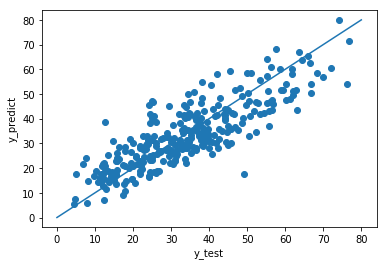

In [110]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [111]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 71.648%  (12.115%)


In [112]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_Lasso=Polynomial_Regression_Metrics1_degree2_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_Lasso

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & lasso  8.439141        0.693518   

   Adjusted R Square Value  
0                 0.691056

In [113]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree2_Lasso])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 71.648%  (12.115%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   
0  Polynomial Regression - degree 2 & lasso   8.439141        0.693518   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991  
0                 0.691056

In [114]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# There is no much difference in performance metrics between polynomial Regression with degree - 2, ridge and lasso
#---------------------------------------------------------------------------
# The accuracy metrics for 95% confidence level 
#----------------------------------------------------------------------------
# Before using Ridge        : 71.158%  (12.682%) 
# With Ridge Regression     : 71.175%  (12.716%)
# With Lasso Regression     : 71.648%  (12.115%)
# --------------------------------------------------------------------------

## Using Polynomial Regression (degree=3)

In [115]:
poly=PolynomialFeatures(degree=3, interaction_only=True) #Considering Polynomial degree as 3
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)

In [116]:
print(X_train.shape)
print(X_train_3.shape)

(703, 8)
(703, 93)


In [117]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 93

In [118]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR3_model=linear_model.LinearRegression()
results=cross_val_score(PR3_model,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-0.80078127  0.65261264  0.55665929  0.65381779  0.79951797  0.79560784
  0.7360225   0.84087188  0.35575409  0.71183347]


In [119]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 53.019%
 Standard Deviation : 46.344%


In [120]:
PR3_model.fit(X_train_3,y_train)
y_pred = PR3_model.predict(X_test_3)

In [121]:
print("The accuracy score for training set is %12.16f" %PR3_model.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %PR3_model.score(X_test_3,y_test))

The accuracy score for training set is 0.8157271302057831
The accuracy score for testing set is 0.7019444600841008


In [122]:
# r square value for testing
r_square_for_testing=PR3_model.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7019444600841008
The adjusted R Square value for testing set is 0.6995504396831699
The RMSE value for testing set is 8.3223212249228595


Text(0, 0.5, 'y_predict')

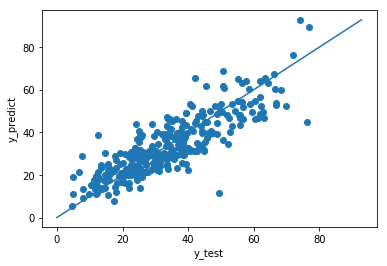

In [123]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [124]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3 = pd.DataFrame({'Model':['Polynomial Regression - degree 3'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3=Polynomial_Regression_Metrics1_degree3[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3

Model performance range with 95 percentage confidence level is : 53.019%  (90.834%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3  8.322321        0.701944   

   Adjusted R Square Value  
0                  0.69955

In [125]:
Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree3])
Comparison_Table1

Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   
0  Polynomial Regression - degree 2 & lasso   8.439141        0.693518   
0          Polynomial Regression - degree 3   8.322321        0.701944   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991  
0                 0.691056  
0                 0.699550

In [126]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=3 performs better than linear regression and polynomial regression with degree =2 in test dataset
# But the 95% confidence accuracy score is 53.019%  (90.834%) 
# i.e it's performance may be too high and too low at production
# So this model is a poorr model
# So trying out the ridge and Lasso

## Using Polynomial Regression (degree=3)  & Ridge Regression

In [127]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.71694722 0.65342709 0.55551621 0.65654487 0.80213181 0.79877728
 0.73711696 0.84143666 0.36693929 0.71554587]


In [128]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 68.444%  (25.968%)


In [129]:
ridge.fit(X_train_3,y_train)
y_pred = ridge.predict(X_test_3)

In [130]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_3,y_test))

The accuracy score for training set is 0.8156881352275145
The accuracy score for testing set is 0.7012997450223443


In [131]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7012997450223443
The adjusted R Square value for testing set is 0.6989005461871823
The RMSE value for testing set is 8.3313172453886253


Text(0, 0.5, 'y_predict')

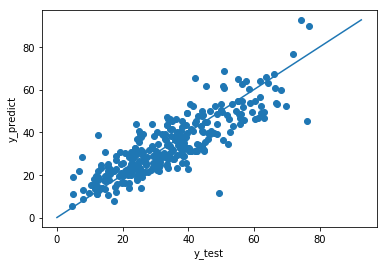

In [132]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [133]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_ridge=Polynomial_Regression_Metrics1_degree3_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_ridge

Model performance range with 95 percentage confidence level is : 68.444%  (25.968%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & ridge  8.331317          0.7013   

   Adjusted R Square Value  
0                 0.698901

In [134]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree3_ridge])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 68.444%  (25.968%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   
0  Polynomial Regression - degree 2 & lasso   8.439141        0.693518   
0          Polynomial Regression - degree 3   8.322321        0.701944   
0  Polynomial Regression - degree 3 & ridge   8.331317        0.701300   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991  
0                 0.691056  
0                 0.699550  
0                 0.698901

In [135]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Eventhough there is no much difference in performance metrics between polynomial Regression with degree - 3 and ridge
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        : 53.019%  (90.834%) 
# With Ridge Regression     : 68.444%  (25.968%)
# --------------------------------------------------------------------------

## Using Polynomial Regression (degree=3)  & Lasso Regression

In [136]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3, max_iter=10000)
results=cross_val_score(lasso,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16701.34283274191, tolerance: 17.080863663037977
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17199.395961345486, tolerance: 17.33537144651899
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16775.540258146713, tolerance: 17.723638325000003
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the num

The score value for all the crossfolds 
[0.73797114 0.72959177 0.61189513 0.68932247 0.79673278 0.771709
 0.76102209 0.83801939 0.36679709 0.72142327]


C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17430.763649324123, tolerance: 17.69028471592417
  positive)


In [137]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 70.245%  (24.706%)


In [138]:
lasso.fit(X_train_3,y_train)
y_pred = lasso.predict(X_test_3)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19516.978140191688, tolerance: 19.541592919374114
  positive)


In [139]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_3,y_test))

The accuracy score for training set is 0.8021066707065150
The accuracy score for testing set is 0.7307526396766342


In [140]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7307526396766342
The adjusted R Square value for testing set is 0.7285900102764464
The RMSE value for testing set is 7.9099111020809190


Text(0, 0.5, 'y_predict')

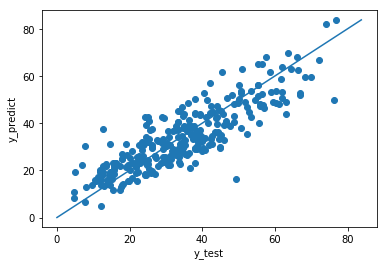

In [141]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [142]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_Lasso=Polynomial_Regression_Metrics1_degree3_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_Lasso

Model performance range with 95 percentage confidence level is : 70.245%  (24.706%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & lasso  7.909911        0.730753   

   Adjusted R Square Value  
0                  0.72859

In [143]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree3_Lasso])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 70.245%  (24.706%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   
0  Polynomial Regression - degree 2 & lasso   8.439141        0.693518   
0          Polynomial Regression - degree 3   8.322321        0.701944   
0  Polynomial Regression - degree 3 & ridge   8.331317        0.701300   
0  Polynomial Regression - degree 3 & lasso   7.909911        0.730753   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991  
0                 0.691056  
0                 0.699550  
0                 0.698901  
0                 0.728590

In [144]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Eventhough there is no much difference in performance metrics between polynomial Regression with degree - 3, ridge and lasso
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        : 53.019%  (90.834%) 
# With Ridge Regression     : 68.444%  (25.968%)
# With Lasso Regression     : 70.245%  (24.706%)
# --------------------------------------------------------------------------
# Lasso Regression didn't converge

In [145]:
# Observation by comparing Model of Linear regression, Polynomial Regression - Degree 2 & Polynomial Regression - Degree 3
# ------------------------------------------------------------------------------------------------------------------------
# Polynomial regression -degree 2 model is has better performance than Linear Regression and Polynomial Regression - degree 3
# That means the performance decreases as the degree increases further...

## Using Polynomial Regression (degree=4)

In [146]:
poly=PolynomialFeatures(degree=4, interaction_only=True) #Considering Polynomial degree as 4
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)

In [147]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR4_model=linear_model.LinearRegression()
results=cross_val_score(PR4_model,X_train_4, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.15056716 0.24700907 0.10964336 0.69970363 0.78528672 0.77212046
 0.735282   0.72610086 0.23932992 0.6660069 ]


In [148]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 51.311%
 Standard Deviation : 27.094%


In [149]:
PR4_model.fit(X_train_4,y_train)
y_pred = PR4_model.predict(X_test_4)

In [150]:
print("The accuracy score for training set is %12.16f" %PR4_model.score(X_train_4,y_train))
print("The accuracy score for testing set is %12.16f" %PR4_model.score(X_test_4,y_test))

The accuracy score for training set is 0.8698700472086611
The accuracy score for testing set is 0.6051556232949021


In [151]:
# r square value for testing
r_square_for_testing=PR4_model.score(X_test_4,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)

#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6051556232949021
The adjusted R Square value for testing set is 0.6019841825181543
The RMSE value for testing set is 9.5787503426642466


In [152]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 51.311%  (53.104%)


In [153]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree4 = pd.DataFrame({'Model':['Polynomial Regression - degree 4'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree4=Polynomial_Regression_Metrics1_degree4[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree4

Model     RMSE  R Square Value  \
0  Polynomial Regression - degree 4  9.57875        0.605156   

   Adjusted R Square Value  
0                 0.601984

In [154]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Polynomial_Regression_Metrics1_degree4])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 51.311%  (53.104%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.316849        0.541961   
0          Polynomial Regression - degree 2   8.491929        0.689672   
0  Polynomial Regression - degree 2 & ridge   8.480908        0.690477   
0  Polynomial Regression - degree 2 & lasso   8.439141        0.693518   
0          Polynomial Regression - degree 3   8.322321        0.701944   
0  Polynomial Regression - degree 3 & ridge   8.331317        0.701300   
0  Polynomial Regression - degree 3 & lasso   7.909911        0.730753   
0          Polynomial Regression - degree 4   9.578750        0.605156   

   Adjusted R Square Value  
0                 0.538282  
0                 0.687179  
0                 0.687991  
0                 0.691056  
0                 0.699550  
0                 0.698901  
0                 0.728590  
0                 0.601984

In [155]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# As expected the performance started to drop as the polynomial degree increases
# So if the degree is further more increased the model will become over fit.
#---------------------------------------------------------------------------

In [156]:
# Keeping the performance metrics of best model in the comparison table
Comparison_Table1=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree3])
Comparison_Table1

Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550

## Support Vector Regressor

In [157]:
# Removing Duplicate Data
concrete_Iter1=concrete_df.copy(deep=True)
concrete_Iter1.drop_duplicates(keep='first', inplace=True) # To remove 25 duplicate datapoints in the dataset
concrete_Iter1.shape
#Spliting into training and test test first to avoid data leak
train,test=train_test_split(concrete_Iter1,test_size=0.30, random_state=1)
print(train.shape)
print(test.shape)

(703, 9)
(302, 9)


In [158]:
X_train=train.drop('strength',axis=1) # Independent Attribute for training data
X_test=test.drop('strength',axis=1) # Independent Attribute for testing data
y_train=train.pop('strength') # Dependent Attribute for training data
y_test=test.pop('strength') # Dependent Attribute for testin data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(703, 8)
(302, 8)
(703,)
(302,)


In [159]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)
y_train_scale = preprocessing.scale(y_train)
y_test_scale = preprocessing.scale(y_test)

In [160]:
param_grid={'C':(1,2,3,4), 
            'kernel':('linear', 'rbf', 'poly','sigmoid'),
            'degree':(1,2,3,4)}
SVR_model=svm.SVR()
SVR_model.fit(X_train_scale,y_train_scale)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [161]:
gs=GridSearchCV(SVR_model,param_grid,cv=10)

In [162]:
gs.fit(X_train_scale,y_train_scale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 2, 3, 4), 'degree': (1, 2, 3, 4),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [163]:
gs.cv_results_['params'] # All the possible parameters

[{'C': 1, 'degree': 1, 'kernel': 'linear'},
 {'C': 1, 'degree': 1, 'kernel': 'rbf'},
 {'C': 1, 'degree': 1, 'kernel': 'poly'},
 {'C': 1, 'degree': 1, 'kernel': 'sigmoid'},
 {'C': 1, 'degree': 2, 'kernel': 'linear'},
 {'C': 1, 'degree': 2, 'kernel': 'rbf'},
 {'C': 1, 'degree': 2, 'kernel': 'poly'},
 {'C': 1, 'degree': 2, 'kernel': 'sigmoid'},
 {'C': 1, 'degree': 3, 'kernel': 'linear'},
 {'C': 1, 'degree': 3, 'kernel': 'rbf'},
 {'C': 1, 'degree': 3, 'kernel': 'poly'},
 {'C': 1, 'degree': 3, 'kernel': 'sigmoid'},
 {'C': 1, 'degree': 4, 'kernel': 'linear'},
 {'C': 1, 'degree': 4, 'kernel': 'rbf'},
 {'C': 1, 'degree': 4, 'kernel': 'poly'},
 {'C': 1, 'degree': 4, 'kernel': 'sigmoid'},
 {'C': 2, 'degree': 1, 'kernel': 'linear'},
 {'C': 2, 'degree': 1, 'kernel': 'rbf'},
 {'C': 2, 'degree': 1, 'kernel': 'poly'},
 {'C': 2, 'degree': 1, 'kernel': 'sigmoid'},
 {'C': 2, 'degree': 2, 'kernel': 'linear'},
 {'C': 2, 'degree': 2, 'kernel': 'rbf'},
 {'C': 2, 'degree': 2, 'kernel': 'poly'},
 {'C': 2, 'de

In [164]:
gs.cv_results_['mean_test_score']

array([ 5.71176647e-01,  8.29675346e-01,  5.74811987e-01, -6.03219657e+01,
        5.71176647e-01,  8.29675346e-01,  1.94495743e-01, -6.03219657e+01,
        5.71176647e-01,  8.29675346e-01,  6.54951167e-01, -6.03219657e+01,
        5.71176647e-01,  8.29675346e-01,  4.55861764e-01, -6.03219657e+01,
        5.70881344e-01,  8.48771586e-01,  5.74906040e-01, -2.35619184e+02,
        5.70881344e-01,  8.48771586e-01,  1.71449958e-01, -2.35619184e+02,
        5.70881344e-01,  8.48771586e-01,  6.58028060e-01, -2.35619184e+02,
        5.70881344e-01,  8.48771586e-01,  4.96701990e-01, -2.35619184e+02,
        5.70617098e-01,  8.56204282e-01,  5.73810166e-01, -5.07049126e+02,
        5.70617098e-01,  8.56204282e-01,  1.66227241e-01, -5.07049126e+02,
        5.70617098e-01,  8.56204282e-01,  6.59190769e-01, -5.07049126e+02,
        5.70617098e-01,  8.56204282e-01,  5.09991973e-01, -5.07049126e+02,
        5.70695282e-01,  8.59825449e-01,  5.72224540e-01, -9.12840128e+02,
        5.70695282e-01,  

In [165]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model',gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'C': 4, 'degree': 1, 'kernel': 'rbf'}
The model which produce best score is 0.8598254492759377
Standard deviation for the best model 0.04798848901987294


In [166]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 85.983%
 Standard Deviation : 4.79885%


In [167]:
SVR_optimised_model = gs.best_estimator_
SVR_optimised_model.fit(X_train_scale,y_train_scale)
y_pred = SVR_optimised_model.predict(X_test_scale)

In [168]:
print("The accuracy score for training set is %12.16f" %SVR_optimised_model.score(X_train_scale,y_train_scale))
print("The accuracy score for testing set is %12.16f" %SVR_optimised_model.score(X_test_scale,y_test_scale))

The accuracy score for training set is 0.9255346835404765
The accuracy score for testing set is 0.8124734186220306


In [169]:
# r square value for testing
r_square_for_testing=SVR_optimised_model.score(X_test_scale,y_test_scale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_scale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8124734186220306
The adjusted R Square value for testing set is 0.8109671810206012
The RMSE value for testing set is 0.4330433943359133


Text(0, 0.5, 'y_predict')

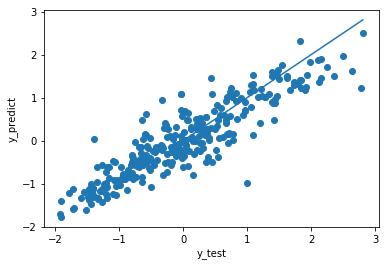

In [170]:
fig, ax = plt.subplots()
ax.scatter(y_test_scale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [171]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
SVR_Metrics1 = pd.DataFrame({'Model':['SVR'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
SVR_Metrics1=SVR_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
SVR_Metrics1

Model performance range with 95 percentage confidence level is : 85.983%  (9.406%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   SVR  0.433043        0.812473                 0.810967

In [172]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,SVR_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 85.983%  (9.406%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967

In [173]:
# Inference from the accuracy metrics:
# ------------------------------------
# SVR Performance is better
# The optimised model of SVR is
#SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
#    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

## KNN Regressor

In [174]:
X_train_stdscale = preprocessing.scale(X_train)
X_test_stdscale = preprocessing.scale(X_test)
y_train_stdscale = preprocessing.scale(y_train)
y_test_stdscale = preprocessing.scale(y_test)

In [175]:
param_grid={'n_neighbors':(1,2,3,4,5,6,7,8,9,10), 
            'metric':('euclidean', 'manhattan', 'chebyshev','minkowski')}
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train_stdscale,y_train_stdscale)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [176]:
gs=GridSearchCV(KNN_model,param_grid,cv=10)

In [177]:
gs.fit(X_train_stdscale,y_train_stdscale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'),
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [178]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'metric': 'euclidean', 'n_neighbors': 6}
The model which produce best score is 0.6814891745212365
Standard deviation for the best model 0.07288507689559537


In [179]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 68.149%
 Standard Deviation : 7.28851%


In [180]:
KNN_optimised_model = gs.best_estimator_
KNN_optimised_model.fit(X_train_stdscale,y_train_stdscale)
y_pred = KNN_optimised_model.predict(X_test_stdscale)

In [181]:
print("The accuracy score for training set is %12.16f" %KNN_optimised_model.score(X_train_stdscale,y_train_stdscale))
print("The accuracy score for testing set is %12.16f" %KNN_optimised_model.score(X_test_stdscale,y_test_stdscale))

The accuracy score for training set is 0.7841385458690532
The accuracy score for testing set is 0.6016795001377384


In [182]:
# r square value for testing
r_square_for_testing=KNN_optimised_model.score(X_test_stdscale,y_test_stdscale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_stdscale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6016795001377384
The adjusted R Square value for testing set is 0.5984801386930616
The RMSE value for testing set is 0.6311263739238454


Text(0, 0.5, 'y_predict')

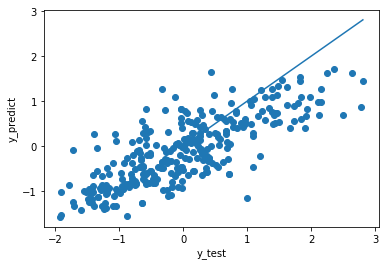

In [183]:
fig, ax = plt.subplots()
ax.scatter(y_test_stdscale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [184]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
KNN_Metrics1 = pd.DataFrame({'Model':['KNN'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
KNN_Metrics1=KNN_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
KNN_Metrics1

Model performance range with 95 percentage confidence level is : 68.149%  (14.285%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   KNN  0.631126         0.60168                  0.59848

In [185]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,KNN_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 68.149%  (14.285%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480

In [186]:
# Inference from the accuracy metrics:
# ------------------------------------
# KNN Performance is poor than SVR.
# It is observered that KNN Performs well for lower strength and poor at higher strength
# The optimised model of KNN is
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
#                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
#                    weights='uniform'))

## Decision Tree Regressor

In [187]:
param_grid={'criterion':('mse','friedman_mse','mae'), 
             'max_depth':(3,6,9,12),
             'min_samples_split':(2,50,100,150,200)}
DT_model=DecisionTreeRegressor(random_state=1)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [188]:
gs=GridSearchCV(DT_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': (3, 6, 9, 12),
                         'min_samples_split': (2, 50, 100, 150, 200)},
             pre_dis

In [189]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 2}
The model which produce best score is 0.8034341793636717
Standard deviation for the best model 0.0483889870059156


In [190]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 80.343%
 Standard Deviation : 4.83890%


In [191]:
DT_optimised_model = gs.best_estimator_
DT_optimised_model.fit(X_train,y_train)
y_pred = DT_optimised_model.predict(X_test)

In [192]:
print("The accuracy score for training set is %12.16f" %DT_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %DT_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9928792722652316
The accuracy score for testing set is 0.7815967289274265


In [193]:
# r square value for testing
r_square_for_testing=DT_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7815967289274265
The adjusted R Square value for testing set is 0.7798424857862813
The RMSE value for testing set is 7.1240251629016615


Text(0, 0.5, 'y_predict')

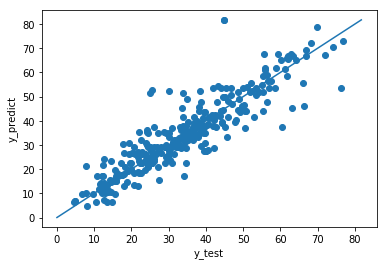

In [194]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [195]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
DecisionTree_Metrics1 = pd.DataFrame({'Model':['Decision Tree'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
DecisionTree_Metrics1=DecisionTree_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
DecisionTree_Metrics1

Model performance range with 95 percentage confidence level is : 80.343%  (9.484%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Decision Tree  7.124025        0.781597                 0.779842

In [196]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,DecisionTree_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 80.343%  (9.484%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842

In [197]:
# Inference from the accuracy metrics:
# ------------------------------------
# Decision Tree Regressor Performance is better than KNN but poorer than SVR.
# The optimised model of Decision Tree is
# DecisionTreeRegressor(criterion='friedman_mse', max_depth=12, max_features=None,
#                      max_leaf_nodes=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      presort=False, random_state=1, splitter='best')

## Bagging Regressor

In [198]:
param_grid={'n_estimators':(25,50,100,150,200)}
Bagging_model=BaggingRegressor(max_samples=0.7,oob_score=True, random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=0.7, n_estimators=10,
                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
                 warm_start=False)

In [199]:
gs=GridSearchCV(Bagging_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=0.7,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=True, random_state=1,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [200]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'n_estimators': 150}
The model which produce best score is 0.8939118507765192
Standard deviation for the best model 0.021264225872410173


In [201]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.391%
 Standard Deviation : 2.12642%


In [202]:
Bagging_optimised_model = gs.best_estimator_
Bagging_optimised_model.fit(X_train,y_train)
y_pred = Bagging_optimised_model.predict(X_test)

In [203]:
print("The accuracy score for training set is %12.16f" %Bagging_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Bagging_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9718918471258844
The accuracy score for testing set is 0.8854927419568124


In [204]:
# r square value for testing
r_square_for_testing=Bagging_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8854927419568124
The adjusted R Square value for testing set is 0.8845730049444173
The RMSE value for testing set is 5.1583687302244696


Text(0, 0.5, 'y_predict')

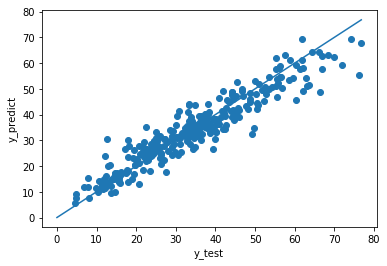

In [205]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [206]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Bagging_Metrics1 = pd.DataFrame({'Model':['Bagging'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Bagging_Metrics1=Bagging_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Bagging_Metrics1

Model performance range with 95 percentage confidence level is : 89.391%  (4.168%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Bagging  5.158369        0.885493                 0.884573

In [207]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Bagging_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 89.391%  (4.168%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   
0                           Bagging   5.158369        0.885493   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842  
0                 0.884573

In [208]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance
# The optimised model of Bagging Regressor is
# BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
#                 max_features=1.0, max_samples=0.7, n_estimators=150,
#                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
#                 warm_start=False)

## Adaboost Regressor

In [209]:
param_grid={'n_estimators':(25,50,100,150,200),
           'learning_rate':(1.0,0.8,0.6,0.4)}
Adaboost_model=AdaBoostRegressor(random_state=1)
Adaboost_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [210]:
gs=GridSearchCV(Adaboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': (1.0, 0.8, 0.6, 0.4),
                         'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [211]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'learning_rate': 0.4, 'n_estimators': 200}
The model which produce best score is 0.7703765812915475
Standard deviation for the best model 0.03141732841321163


In [212]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 77.038%
 Standard Deviation : 3.14173%


In [213]:
Adaboost_optimised_model = gs.best_estimator_
Adaboost_optimised_model.fit(X_train,y_train)
y_pred = Adaboost_optimised_model.predict(X_test)

In [214]:
print("The accuracy score for training set is %12.16f" %Adaboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Adaboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.8201404574097790
The accuracy score for testing set is 0.7669097452778039


In [215]:
# r square value for testing
r_square_for_testing=Adaboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7669097452778039
The adjusted R Square value for testing set is 0.7650375343965011
The RMSE value for testing set is 7.3596630901320692


Text(0, 0.5, 'y_predict')

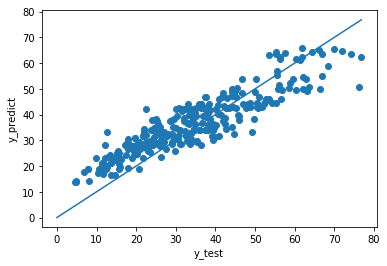

In [216]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [217]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Adaboost_Metrics1 = pd.DataFrame({'Model':['Adaboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Adaboost_Metrics1=Adaboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Adaboost_Metrics1

Model performance range with 95 percentage confidence level is : 77.038%  (6.158%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Adaboost  7.359663         0.76691                 0.765038

In [218]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Adaboost_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 77.038%  (6.158%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   
0                           Bagging   5.158369        0.885493   
0                          Adaboost   7.359663        0.766910   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842  
0                 0.884573  
0                 0.765038

In [219]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance than Ada Boosting
# The optimised model of AdaBoost Regressor is
# AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='linear',
#                  n_estimators=200, random_state=1)

## Gradient Boosting Regressor

In [220]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('friedman_mse', 'mse'),
            'max_depth' : (3,5,7,9)}
Gradientboost_model=GradientBoostingRegressor(random_state=1)
Gradientboost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [221]:
gs=GridSearchCV(Gradientboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [222]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 200}
The model which produce best score is 0.9215400086241545
Standard deviation for the best model 0.019112648093424518


In [223]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 92.154%
 Standard Deviation : 1.91126%


In [224]:
Gradientboost_optimised_model = gs.best_estimator_
Gradientboost_optimised_model.fit(X_train,y_train)
y_pred = Gradientboost_optimised_model.predict(X_test)

In [225]:
print("The accuracy score for training set is %12.16f" %Gradientboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Gradientboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9928981700646321
The accuracy score for testing set is 0.9137967982809253


In [226]:
# r square value for testing
r_square_for_testing=Gradientboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.9137967982809253
The adjusted R Square value for testing set is 0.9131044030863946
The RMSE value for testing set is 4.4756650128074416


Text(0, 0.5, 'y_predict')

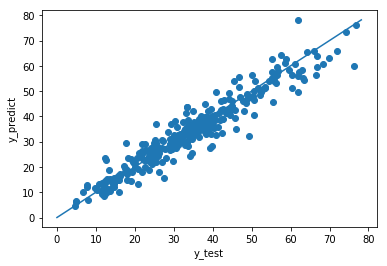

In [227]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [228]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Gradientboost_Metrics1 = pd.DataFrame({'Model':['Gradientboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Gradientboost_Metrics1=Gradientboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Gradientboost_Metrics1

Model performance range with 95 percentage confidence level is : 92.154%  (3.746%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Gradientboost  4.475665        0.913797                 0.913104

In [229]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,Gradientboost_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 92.154%  (3.746%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   
0                           Bagging   5.158369        0.885493   
0                          Adaboost   7.359663        0.766910   
0                     Gradientboost   4.475665        0.913797   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842  
0                 0.884573  
0                 0.765038  
0                 0.913104

In [230]:
# Inference from the accuracy metrics:
# ------------------------------------
# Gradient Boosting Performance is better
# The optimised model of Gradient Boosting Regressor is
# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                          learning_rate=0.1, loss='ls', max_depth=5,
#                          max_features=None, max_leaf_nodes=None,
#                          min_impurity_decrease=0.0, min_impurity_split=None,
#                          min_samples_leaf=1, min_samples_split=2,
#                          min_weight_fraction_leaf=0.0, n_estimators=200,
#                          n_iter_no_change=None, presort='auto', random_state=1,
#                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                          verbose=0, warm_start=False)

## Random Forest Regressor

In [231]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('mae', 'mse'),
            'max_depth' : (3,5,7,9)}
RandomForest_model=RandomForestRegressor(random_state=1)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [232]:
gs=GridSearchCV(RandomForest_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mae', 'mse'), 'max_dep

In [233]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 9, 'n_estimators': 150}
The model which produce best score is 0.8923247739725486
Standard deviation for the best model 0.022079802166222774


In [234]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.232%
 Standard Deviation : 2.20798%


In [235]:
RandomForest_optimised_model = gs.best_estimator_
RandomForest_optimised_model.fit(X_train,y_train)
y_pred = RandomForest_optimised_model.predict(X_test)

In [236]:
print("The accuracy score for training set is %12.16f" %RandomForest_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %RandomForest_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9740159610916939
The accuracy score for testing set is 0.8870344366036182


In [237]:
# r square value for testing
r_square_for_testing=RandomForest_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8870344366036182
The adjusted R Square value for testing set is 0.8861270826807557
The RMSE value for testing set is 5.1235256148857715


Text(0, 0.5, 'y_predict')

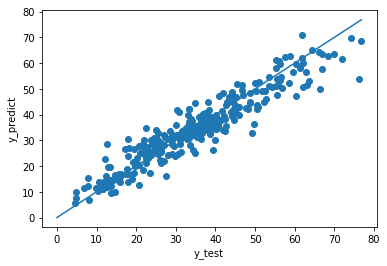

In [238]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [239]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
RandomForest_Metrics1 = pd.DataFrame({'Model':['Random Forest'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
RandomForest_Metrics1=RandomForest_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
RandomForest_Metrics1

Model performance range with 95 percentage confidence level is : 89.232%  (4.328%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Random Forest  5.123526        0.887034                 0.886127

In [240]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table1=pd.concat([Comparison_Table1,RandomForest_Metrics1])
Comparison_Table1

Model performance range with 95 percentage confidence level is : 89.232%  (4.328%)


Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   
0                           Bagging   5.158369        0.885493   
0                          Adaboost   7.359663        0.766910   
0                     Gradientboost   4.475665        0.913797   
0                     Random Forest   5.123526        0.887034   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842  
0                 0.884573  
0                 0.765038  
0                 0.913104  
0                 0.886127

In [241]:
# Inference from the accuracy metrics:
# ------------------------------------
# Random Forest Regressor has poorer Performance than Gradient Boosting Regressor
# The optimised model of Random Forest RegressorGradient Boosting Regressor is
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
#                      max_features='auto', max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=150,
#                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                      warm_start=False)

In [242]:
# Summary of Iteration 1:
# -------------------------
# Duplicate Data were removed 
# Outliers were not treated
# Gradient Boost regressor has the best performance with 91.37 Score in training dataset
# The model has the performance range 92.154%  (3.746%) with 95% confidence level

# Iteration 2

The Given dataset is used as it is (without feature engineering) after removing duplicate data & treating the outliers

In [243]:
# Removing Duplicate Data
concrete_Iter2=concrete_df.copy(deep=True)
concrete_Iter2.drop_duplicates(keep='first', inplace=True) # To remove 25 duplicate datapoints in the dataset
concrete_Iter2.shape

(1005, 9)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

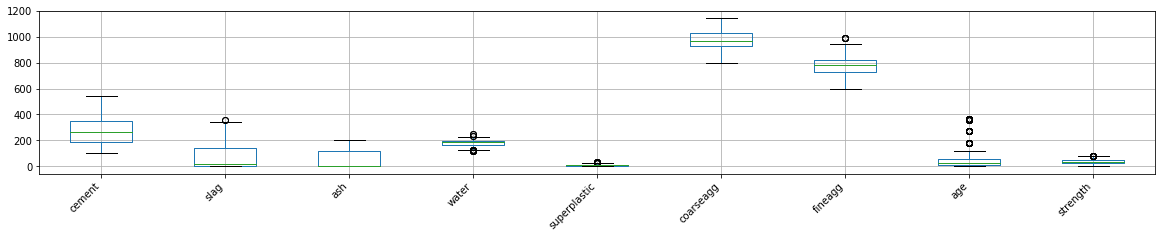

In [244]:
# Observing the outliers using box plot
concrete_Iter2.boxplot(figsize=(20,3))
plt.xticks(rotation=45,ha="right")

In [245]:
# Inference from the box plot:
# --------------------------------------------------------------------------------------------------------
# Outliers were observed in the attributes 'slag', 'water', 'superplastic', 'fineagg', 'age' and 'strength'
# --------------------------------------------------------------------------------------------------------
# Oultliers will be observed and removed from the above attributes (as per domain expert suggestion)
# Replacing the extreme values with mean or mean+2*std may lead to poor performance
# Since the concrete strength depends on the ratios of cement:fineagg:courseagg:water

In [246]:
# Observing the Outliers of 'slag' and replacing with nan
median_slag=concrete_Iter2['slag'].median() # Median of 'slag' attribute
std_slag=3.5*(concrete_Iter2['slag'].std()) # Calculating 2*std deviation of 'slag' attribute
concrete_Iter2.loc[(concrete_Iter2['slag']-median_slag).abs()>std_slag, 'slag'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

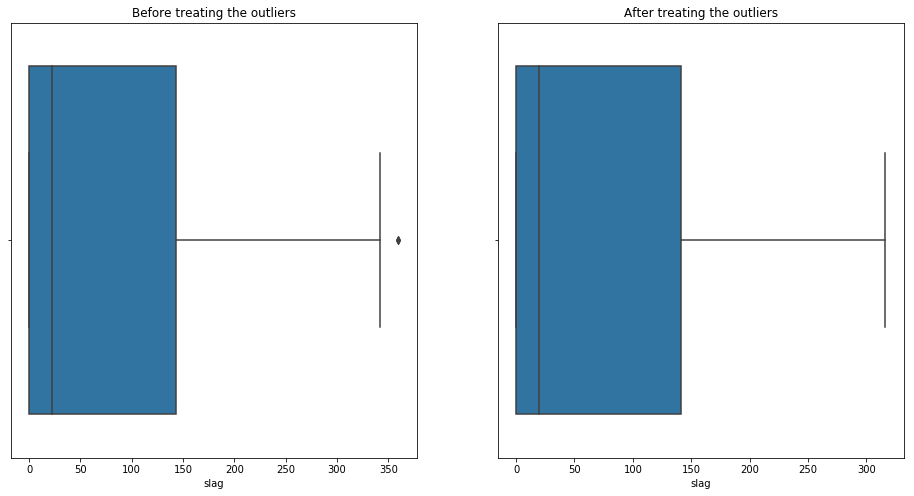

In [247]:
# Boxplot for 'slag' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_df['slag'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter2['slag'])
plt.title('After treating the outliers')

In [248]:
# Observing the Outliers of 'water' and replacing with nan
median_water=concrete_Iter2['water'].median() # Median of 'water' attribute
std_water=2.2*(concrete_Iter2['water'].std()) # Calculating 2*std deviation of 'water' attribute
concrete_Iter2.loc[(concrete_Iter2['water']-median_water).abs()>std_water, 'water'] = np.nan# Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

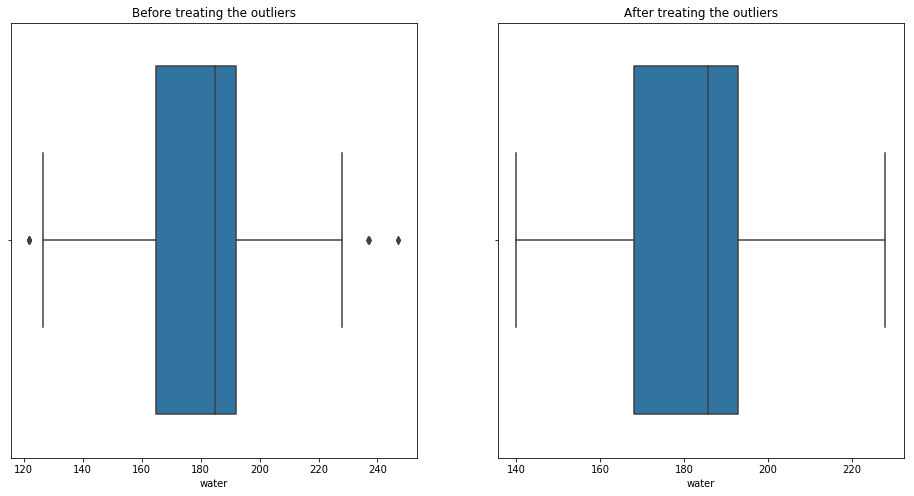

In [249]:
# Boxplot for 'water' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_df['water'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter2['water'])
plt.title('After treating the outliers')

In [250]:
# Observing the Outliers of 'superplastic' and replacing with nan
median_sp=concrete_Iter2['superplastic'].median() # Median of 'superplastic' attribute
std_sp=3*(concrete_Iter2['superplastic'].std()) # Calculating 2*std deviation of 'superplastic' attribute
concrete_Iter2.loc[(concrete_Iter2['superplastic']-median_sp).abs()>std_sp, 'superplastic'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

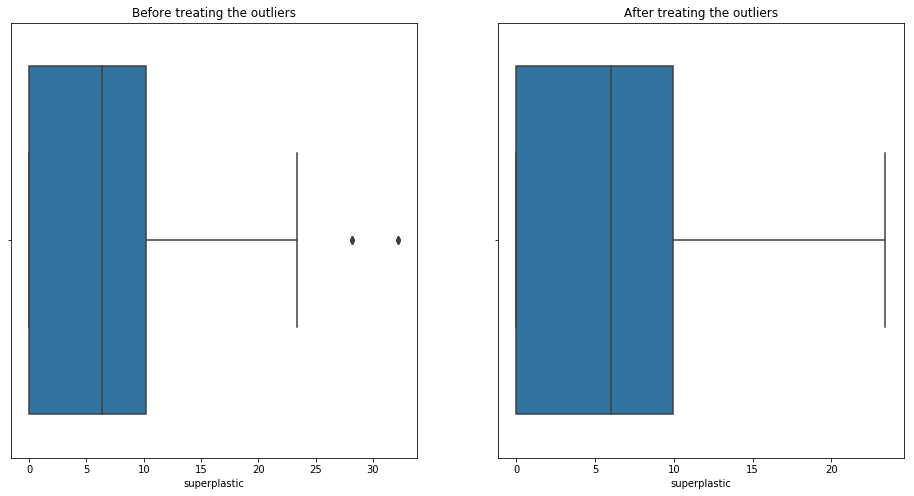

In [251]:
# Boxplot for 'superplastic' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_df['superplastic'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter2['superplastic'])
plt.title('After treating the outliers')

In [252]:
# Observing the Outliers of 'fineagg' and replacing with nan
median_fg=concrete_Iter2['fineagg'].median() # Median of 'superplastic' attribute
std_fg=2.5*(concrete_Iter2['fineagg'].std()) # Calculating 2*std deviation of 'superplastic' attribute
concrete_Iter2.loc[(concrete_Iter2['fineagg']-median_fg).abs()>std_fg, 'fineagg'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

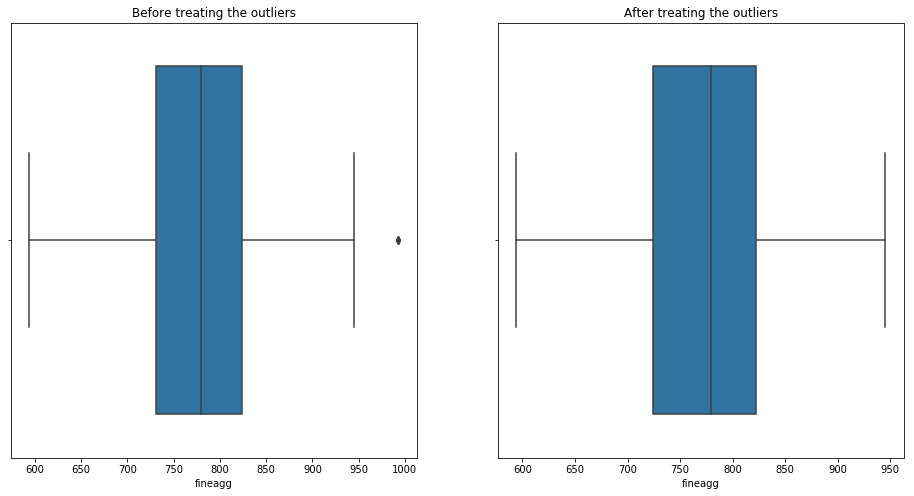

In [253]:
# Boxplot for 'fineagg' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_df['fineagg'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter2['fineagg'])
plt.title('After treating the outliers')

In [254]:
# Observing the Outliers of 'age' and replacing with nan
median_age=concrete_Iter2['age'].median() # Median of 'superplastic' attribute
std_age=2*(concrete_Iter2['age'].std()) # Calculating 2*std deviation of 'superplastic' attribute
concrete_Iter2.loc[(concrete_Iter2['age']-median_age).abs()>std_age, 'age'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

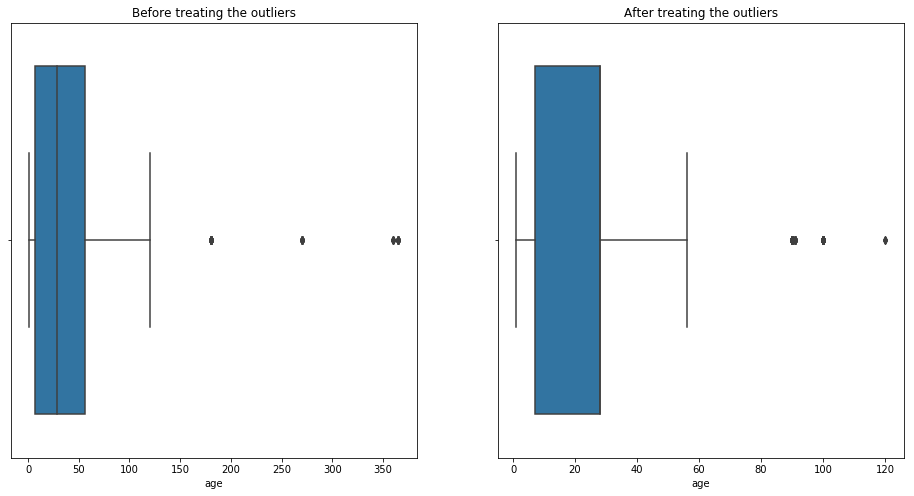

In [255]:
# Boxplot for 'fineagg' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_df['age'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter2['age'])
plt.title('After treating the outliers')

In [256]:
# Outliers of  the attribute 'strength' is kept as it is, since it is a target variable.

In [257]:
concrete_Iter2.isnull().sum()

cement           0
slag             4
ash              0
water           21
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         0
dtype: int64

In [258]:
concrete_Iter2=concrete_Iter2.dropna(axis=0) # Removing the row containing Nan
concrete_Iter2.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [259]:
concrete_Iter2_backup1=concrete_Iter2.copy(deep=True)
concrete_Iter2_backup2=concrete_Iter2.copy(deep=True)

In [260]:
concrete_Iter2_backup1.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

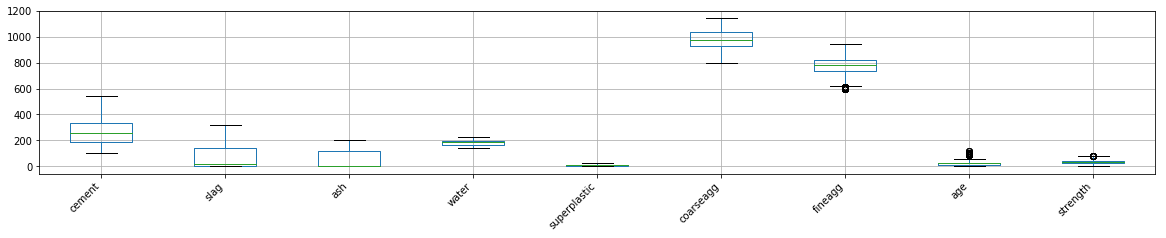

In [261]:
# Observing using box plot after treating the outliers
concrete_Iter2.boxplot(figsize=(20,3))
plt.xticks(rotation=45,ha="right")

In [262]:
# Inference from the box plot:
# ---------------------------
# Outliers were removed and new outliers were observed

In [263]:
concrete_Iter2.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [264]:
concrete_Iter2.shape

(916, 9)

In [265]:
X=concrete_Iter2.drop('strength',axis=1) # Independent Attribute
y=concrete_Iter2.pop('strength') # Dependent Attribute

In [266]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1) # Splitting 70:30 training and test set ratios
num_folds=10
seed=7

## Using Linear Regression

In [267]:
kfold=KFold(n_splits=num_folds,random_state=seed)
LR_model=LinearRegression()
results=cross_val_score(LR_model,X_train, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.69828281 0.84389603 0.78068754 0.74541819 0.78267279 0.75286247
 0.69929394 0.85290384 0.77487124 0.76347664]


In [268]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 76.944%
 Standard Deviation : 4.870%


In [269]:
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

In [270]:
# Let us explore the coefficients for each of the independent attributes and the intercept
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[idx]))
intercept=LR_model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for cement is 0.11164985028345235
The coefficient for slag is 0.07739602783782643
The coefficient for ash is 0.059002128670115485
The coefficient for water is -0.26055336841243315
The coefficient for superplastic is 0.09462439499556431
The coefficient for coarseagg is -0.012623616942554318
The coefficient for fineagg is -0.004197756980912938
The coefficient for age is 0.30635615196555605
The intercept for our model is 47.24360703400621


In [271]:
# comparing the tested and predicted values
values_of_tested_and_predicted=pd.DataFrame(np.vstack([y_test,y_pred]).T)
values_of_tested_and_predicted.columns=['y_test', 'y_pred']
values_of_tested_and_predicted.head()

y_test     y_pred
0   26.86  24.302053
1   50.60  36.843541
2   22.35  16.907282
3   42.70  36.148800
4   40.29  49.762891

In [272]:
print("The accuracy score for training set is %12.16f" %LR_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %LR_model.score(X_test,y_test))

The accuracy score for training set is 0.7855426667031186
The accuracy score for testing set is 0.6904096017743553


In [273]:
# r square value for testing
r_square_for_testing=LR_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6904096017743553
The adjusted R Square value for testing set is 0.6876789257150331
The RMSE value for testing set is 8.5896034272306085


Text(0, 0.5, 'y_predict')

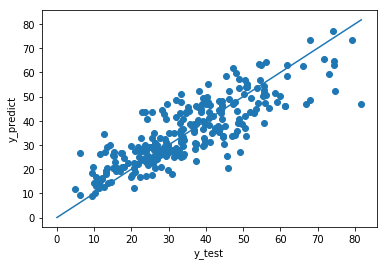

In [274]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')


In [275]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Linear_Regression_Metrics1 = pd.DataFrame({'Model':['Linear Regression'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Linear_Regression_Metrics1=Linear_Regression_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Linear_Regression_Metrics1

Model performance range with 95 percentage confidence level is : 76.944%  (9.544%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Linear Regression  8.589603         0.69041                 0.687679

## Using Polynomial Regression (degree=2)

In [276]:
poly=PolynomialFeatures(degree=2, interaction_only=True) #Considering Polynomial degree as 2
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

In [277]:
print(X_train.shape)
print(X_train_2.shape)

(641, 8)
(641, 37)


In [278]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 37

In [279]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR2_model=linear_model.LinearRegression()
results=cross_val_score(PR2_model,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.58936468 0.85516632 0.82923255 0.69618839 0.78971413 0.77128346
 0.73687396 0.89208434 0.830364   0.76987577]


In [280]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 77.601%
 Standard Deviation : 8.277%


In [281]:
PR2_model.fit(X_train_2,y_train)
y_pred = PR2_model.predict(X_test_2)

In [282]:
print("The accuracy score for training set is %12.16f" %PR2_model.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %PR2_model.score(X_test_2,y_test))

The accuracy score for training set is 0.8330809849721026
The accuracy score for testing set is 0.7190027899350493


In [283]:
# r square value for testing
r_square_for_testing=PR2_model.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7190027899350493
The adjusted R Square value for testing set is 0.7165243139918083
The RMSE value for testing set is 8.1833358622470698


Text(0, 0.5, 'y_predict')

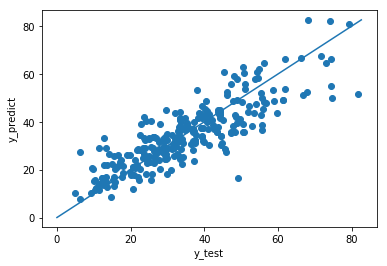

In [284]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [285]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2 = pd.DataFrame({'Model':['Polynomial Regression - degree 2'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2=Polynomial_Regression_Metrics1_degree2[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2

Model performance range with 95 percentage confidence level is : 77.601%  (16.223%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2  8.183336        0.719003   

   Adjusted R Square Value  
0                 0.716524

In [286]:
Comparison_Table2=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2])
Comparison_Table2

Model      RMSE  R Square Value  \
0                 Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2  8.183336        0.719003   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524

In [287]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=2 performs better than linear regression
# Trying to improve the performance with Ridge and Lasso Regression for Polynomial degree =2

## Using Polynomial Regression (degree=2)  & Ridge Regression

In [288]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.76633456 0.85510484 0.82908946 0.69631141 0.78986663 0.77129434
 0.7376796  0.89217458 0.83020787 0.76981553]


In [289]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 79.379%  (10.827%)


In [290]:
ridge.fit(X_train_2,y_train)
print('Ridge model:', (ridge.coef_))

Ridge model: [ 0.00000000e+00  7.29608430e-02  6.27280421e-02  1.92474754e-01
  1.74758580e+00  3.45763716e+00  9.51539018e-02 -4.58066532e-02
  2.12558499e-01  1.37528403e-04  2.89580634e-04 -9.52498850e-04
 -5.47965030e-03  9.26901486e-05  1.47424725e-04  5.96806625e-04
  2.82496880e-04 -6.87609480e-04 -4.09202167e-03 -1.19774194e-04
  2.58008183e-04  1.14065376e-03 -2.23070556e-03 -1.15742455e-02
 -2.72593774e-05  2.93051490e-04  1.08990305e-03  1.07202568e-02
 -1.09098485e-03 -6.33651070e-04 -2.17525388e-03 -4.21610917e-04
 -2.76501517e-03 -6.68314700e-03  9.59025448e-05  1.46168296e-05
  2.66132344e-04]


In [291]:
y_pred = ridge.predict(X_test_2)

In [292]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_2,y_test))

The accuracy score for training set is 0.8330768398782487
The accuracy score for testing set is 0.7190291546397550


In [293]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7190291546397550
The adjusted R Square value for testing set is 0.7165509112407672
The RMSE value for testing set is 8.1829519504380421


Text(0, 0.5, 'y_predict')

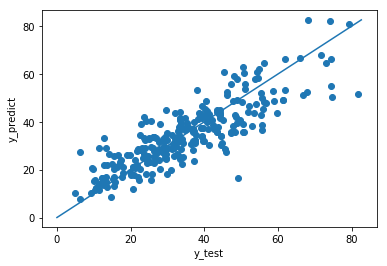

In [294]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [295]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_ridge=Polynomial_Regression_Metrics1_degree2_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_ridge

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   

   Adjusted R Square Value  
0                 0.716551

In [296]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree2_ridge])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 79.379%  (10.827%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0          Polynomial Regression - degree 2  8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551

## Using Polynomial Regression (degree=2)  & Lasso Regression

In [297]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3,max_iter=100000)
results=cross_val_score(lasso,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.77707775 0.85433615 0.83327243 0.71287384 0.79431715 0.77258938
 0.738796   0.8930992  0.82835913 0.77384523]


In [298]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 79.786%  (10.150%)


In [299]:
lasso.fit(X_train_2,y_train)
print('Lasso model:', (lasso.coef_))

Lasso model: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  9.25873321e-01  0.00000000e+00 -0.00000000e+00 -1.02748563e-01
  0.00000000e+00  1.25375477e-04  2.89576737e-04 -6.07093739e-04
 -4.20769464e-03  9.56076230e-05  1.44068742e-04  6.46924910e-04
  2.71333252e-04 -3.04781447e-04 -2.54499517e-03 -1.36351162e-04
  2.57841646e-04  1.19571609e-03 -1.53792873e-03 -9.19534376e-03
 -1.16664940e-05  3.39671334e-04  1.15618911e-03  1.22828259e-02
 -6.40593371e-04 -3.88349386e-04 -1.75116552e-03  1.18792007e-03
 -1.49115281e-03 -6.07591816e-03  9.42061285e-05  8.03036538e-05
  3.27318899e-04]


In [300]:
y_pred = lasso.predict(X_test_2)

In [301]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_2,y_test))

The accuracy score for training set is 0.8322199494291184
The accuracy score for testing set is 0.7134270764382642


In [302]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7134270764382642
The adjusted R Square value for testing set is 0.7108994211036513
The RMSE value for testing set is 8.2641263622908454


Text(0, 0.5, 'y_predict')

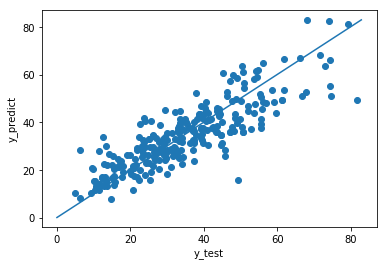

In [303]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [304]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 79.786%  (10.150%)


In [305]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_Lasso=Polynomial_Regression_Metrics1_degree2_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_Lasso

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & lasso  8.264126        0.713427   

   Adjusted R Square Value  
0                 0.710899

In [306]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree2_Lasso])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 79.786%  (10.150%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0          Polynomial Regression - degree 2  8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0  Polynomial Regression - degree 2 & lasso  8.264126        0.713427   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551  
0                 0.710899

## Using Polynomial Regression (degree=3)

In [307]:
poly=PolynomialFeatures(degree=3, interaction_only=True) #Considering Polynomial degree as 3
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)

In [308]:
print(X_train.shape)
print(X_train_3.shape)

(641, 8)
(641, 93)


In [309]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 93

In [310]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR3_model=linear_model.LinearRegression()
results=cross_val_score(PR3_model,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-1.07216773  0.82190508  0.84466298  0.62683042  0.79518002  0.7868915
  0.74817177  0.87454403  0.79744914  0.75313922]


In [311]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 59.766%
 Standard Deviation : 56.024%


In [312]:
PR3_model.fit(X_train_3,y_train)
y_pred = PR3_model.predict(X_test_3)

In [313]:
print("The accuracy score for training set is %12.16f" %PR3_model.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %PR3_model.score(X_test_3,y_test))

The accuracy score for training set is 0.8715051716197648
The accuracy score for testing set is 0.6861822132930362


In [314]:
# r square value for testing
r_square_for_testing=PR3_model.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6861822132930362
The adjusted R Square value for testing set is 0.6834142504554885
The RMSE value for testing set is 8.6480491562561799


Text(0, 0.5, 'y_predict')

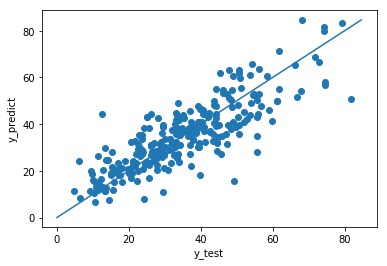

In [315]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [316]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3 = pd.DataFrame({'Model':['Polynomial Regression - degree 3'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3=Polynomial_Regression_Metrics1_degree3[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3

Model performance range with 95 percentage confidence level is : 59.766%  (109.807%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3  8.648049        0.686182   

   Adjusted R Square Value  
0                 0.683414

In [317]:
Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree3])
Comparison_Table2

Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0          Polynomial Regression - degree 2  8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0  Polynomial Regression - degree 2 & lasso  8.264126        0.713427   
0          Polynomial Regression - degree 3  8.648049        0.686182   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551  
0                 0.710899  
0                 0.683414

In [318]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=3 performs better than linear regression and polynomial regression with degree =2 in test dataset
# But the 95% confidence accuracy score is 59.766%  (109.807%) 
# i.e it's performance may be too high and too low at production
# So this model is a poor model
# So trying out the ridge and Lasso

## Using Polynomial Regression (degree=3)  & Ridge Regression

In [319]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.68340058 0.82337306 0.84328066 0.62094467 0.79475944 0.79847695
 0.74783272 0.87831125 0.8020597  0.75633149]


In [320]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 77.488%  (14.210%)


In [321]:
ridge.fit(X_train_3,y_train)
y_pred = ridge.predict(X_test_3)

In [322]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_3,y_test))

The accuracy score for training set is 0.8714146772944473
The accuracy score for testing set is 0.6827772048085695


In [323]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6827772048085695
The adjusted R Square value for testing set is 0.6799792088201115
The RMSE value for testing set is 8.6948394216430724


Text(0, 0.5, 'y_predict')

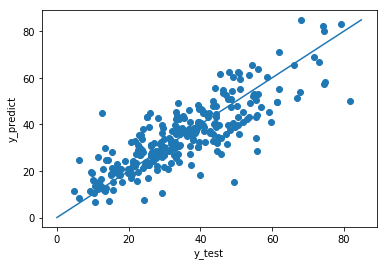

In [324]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [325]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_ridge=Polynomial_Regression_Metrics1_degree3_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_ridge

Model performance range with 95 percentage confidence level is : 77.488%  (14.210%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & ridge  8.694839        0.682777   

   Adjusted R Square Value  
0                 0.679979

In [326]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree3_ridge])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 77.488%  (14.210%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0          Polynomial Regression - degree 2  8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0  Polynomial Regression - degree 2 & lasso  8.264126        0.713427   
0          Polynomial Regression - degree 3  8.648049        0.686182   
0  Polynomial Regression - degree 3 & ridge  8.694839        0.682777   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551  
0                 0.710899  
0                 0.683414  
0                 0.679979

In [327]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Eventhough there is no much difference in performance metrics between polynomial Regression with degree - 3 and ridge
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        :  59.766%  (109.807%) 
# With Ridge Regression     :  77.488%  (14.210%)
# --------------------------------------------------------------------------

## Using Polynomial Regression (degree=3)  & Lasso Regression

In [328]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3, max_iter=100000)
results=cross_val_score(lasso,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10169.234409108083, tolerance: 16.486046889843752
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10697.030806373534, tolerance: 16.00478095500867
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10800.672516046368, tolerance: 16.097231736325824
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the nu

The score value for all the crossfolds 
[0.68351247 0.83444075 0.84604709 0.71888095 0.79564498 0.82112879
 0.75001114 0.89188665 0.80059003 0.76540265]


C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9911.512109640049, tolerance: 15.664682062426344
  positive)


In [329]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 79.075%  (11.630%)


In [330]:
lasso.fit(X_train_3,y_train)
y_pred = lasso.predict(X_test_3)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11985.408379779803, tolerance: 17.95135650402496
  positive)


In [331]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_3,y_test))

The accuracy score for training set is 0.8680662749246069
The accuracy score for testing set is 0.6910015009791884


In [332]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6910015009791884
The adjusted R Square value for testing set is 0.6882760456405264
The RMSE value for testing set is 8.5813883600376233


Text(0, 0.5, 'y_predict')

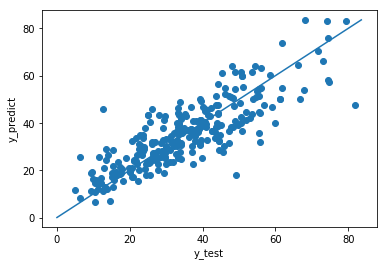

In [333]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [334]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_Lasso=Polynomial_Regression_Metrics1_degree3_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_Lasso

Model performance range with 95 percentage confidence level is : 79.075%  (11.630%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & lasso  8.581388        0.691002   

   Adjusted R Square Value  
0                 0.688276

In [335]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree3_Lasso])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 79.075%  (11.630%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0          Polynomial Regression - degree 2  8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0  Polynomial Regression - degree 2 & lasso  8.264126        0.713427   
0          Polynomial Regression - degree 3  8.648049        0.686182   
0  Polynomial Regression - degree 3 & ridge  8.694839        0.682777   
0  Polynomial Regression - degree 3 & lasso  8.581388        0.691002   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551  
0                 0.710899  
0                 0.683414  
0                 0.679979  
0                 0.688276

In [336]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Eventhough there is no much difference in performance metrics between polynomial Regression with degree - 3, ridge and lasso
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        :  59.766%  (109.807%) 
# With Ridge Regression     :  77.488%  (14.210%)
# With Lasso Regression     :  79.075%  (11.630%)
# --------------------------------------------------------------------------
# Lassor Regression Didn't converge

In [337]:
# Observation by comparing Model of Linear regression, Polynomial Regression - Degree 2 & Polynomial Regression - Degree 3
# ------------------------------------------------------------------------------------------------------------------------
# Polynomial regression -degree 2 model is has better performance than Linear Regression and Polynomial Regression - degree 3
# That means the performance decreases as the degree increases further...

## Using Polynomial Regression (degree=4)

In [338]:
poly=PolynomialFeatures(degree=4, interaction_only=True) #Considering Polynomial degree as 4
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)

In [339]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR4_model=linear_model.LinearRegression()
results=cross_val_score(PR4_model,X_train_4, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-6.89894922  0.49936714  0.7850526  -0.02619412  0.72966053  0.72409107
  0.17351329  0.83720253  0.68823344  0.66956435]


In [340]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : -18.185%
 Standard Deviation : 225.479%


In [341]:
PR4_model.fit(X_train_4,y_train)
y_pred = PR4_model.predict(X_test_4)

In [342]:
print("The accuracy score for training set is %12.16f" %PR4_model.score(X_train_4,y_train))
print("The accuracy score for testing set is %12.16f" %PR4_model.score(X_test_4,y_test))

The accuracy score for training set is 0.8938739240766591
The accuracy score for testing set is 0.5372172914819492


In [343]:
# r square value for testing
r_square_for_testing=PR4_model.score(X_test_4,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)

#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.5372172914819492
The adjusted R Square value for testing set is 0.5331354153318451
The RMSE value for testing set is 10.5019013339461580


In [344]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : -18.185%  (441.939%)


In [345]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree4 = pd.DataFrame({'Model':['Polynomial Regression - degree 4'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree4=Polynomial_Regression_Metrics1_degree4[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree4

Model       RMSE  R Square Value  \
0  Polynomial Regression - degree 4  10.501901        0.537217   

   Adjusted R Square Value  
0                 0.533135

In [346]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Polynomial_Regression_Metrics1_degree4])
Comparison_Table2

Model performance range with 95 percentage confidence level is : -18.185%  (441.939%)


Model       RMSE  R Square Value  \
0                         Linear Regression   8.589603        0.690410   
0          Polynomial Regression - degree 2   8.183336        0.719003   
0  Polynomial Regression - degree 2 & ridge   8.182952        0.719029   
0  Polynomial Regression - degree 2 & lasso   8.264126        0.713427   
0          Polynomial Regression - degree 3   8.648049        0.686182   
0  Polynomial Regression - degree 3 & ridge   8.694839        0.682777   
0  Polynomial Regression - degree 3 & lasso   8.581388        0.691002   
0          Polynomial Regression - degree 4  10.501901        0.537217   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716524  
0                 0.716551  
0                 0.710899  
0                 0.683414  
0                 0.679979  
0                 0.688276  
0                 0.533135

In [347]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# As expected the performance started to drop as the polynomial degree increases
# So if the degree is further more increased the model will become over fit.
#---------------------------------------------------------------------------

In [348]:
# Keeping the performance metrics of best model in the comparison table
Comparison_Table2=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2_ridge])
Comparison_Table2

Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551

## Support Vector Regressor

In [349]:
#Spliting into training and test test first to avoid data leak
train,test=train_test_split(concrete_Iter2_backup1,test_size=0.30, random_state=1)
print(train.shape)
print(test.shape)

(641, 9)
(275, 9)


In [350]:
X_train=train.drop('strength',axis=1) # Independent Attribute for training data
X_test=test.drop('strength',axis=1) # Independent Attribute for testing data
y_train=train.pop('strength') # Dependent Attribute for training data
y_test=test.pop('strength') # Dependent Attribute for testin data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(641, 8)
(275, 8)
(641,)
(275,)


In [351]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)
y_train_scale = preprocessing.scale(y_train)
y_test_scale = preprocessing.scale(y_test)

In [352]:
param_grid={'C':(1,2,3,4), 
            'kernel':('linear', 'rbf', 'poly','sigmoid'),
            'degree':(1,2,3,4)}
SVR_model=svm.SVR()
SVR_model.fit(X_train_scale,y_train_scale)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [353]:
gs=GridSearchCV(SVR_model,param_grid,cv=10)
gs.fit(X_train_scale,y_train_scale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 2, 3, 4), 'degree': (1, 2, 3, 4),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [354]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model',gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'C': 4, 'degree': 1, 'kernel': 'rbf'}
The model which produce best score is 0.8986260198343836
Standard deviation for the best model 0.023295662091248177


In [355]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.863%
 Standard Deviation : 2.32957%


In [356]:
SVR_optimised_model = gs.best_estimator_
SVR_optimised_model.fit(X_train_scale,y_train_scale)
y_pred = SVR_optimised_model.predict(X_test_scale)

In [357]:
print("The accuracy score for training set is %12.16f" %SVR_optimised_model.score(X_train_scale,y_train_scale))
print("The accuracy score for testing set is %12.16f" %SVR_optimised_model.score(X_test_scale,y_test_scale))

The accuracy score for training set is 0.9565203998646997
The accuracy score for testing set is 0.8274389945454171


In [358]:
# r square value for testing
r_square_for_testing=SVR_optimised_model.score(X_test_scale,y_test_scale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_scale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8274389945454171
The adjusted R Square value for testing set is 0.8259169570110878
The RMSE value for testing set is 0.4154046285907066


Text(0, 0.5, 'y_predict')

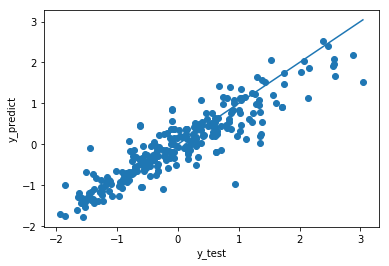

In [359]:
fig, ax = plt.subplots()
ax.scatter(y_test_scale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [360]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
SVR_Metrics1 = pd.DataFrame({'Model':['SVR'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
SVR_Metrics1=SVR_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
SVR_Metrics1

Model performance range with 95 percentage confidence level is : 89.863%  (4.566%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   SVR  0.415405        0.827439                 0.825917

In [361]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,SVR_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 89.863%  (4.566%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917

In [362]:
# Inference from the accuracy metrics:
# ------------------------------------
# SVR Performance is better
# The optimised model of SVR is
# SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
#    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

## KNN Regressor

In [363]:
X_train_stdscale = preprocessing.scale(X_train)
X_test_stdscale = preprocessing.scale(X_test)
y_train_stdscale = preprocessing.scale(y_train)
y_test_stdscale = preprocessing.scale(y_test)

In [364]:
param_grid={'n_neighbors':(1,2,3,4,5,6,7,8,9,10), 
            'metric':('euclidean', 'manhattan', 'chebyshev','minkowski')}
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train_stdscale,y_train_stdscale)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [365]:
gs=GridSearchCV(KNN_model,param_grid,cv=10)
gs.fit(X_train_stdscale,y_train_stdscale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'),
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [366]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'metric': 'euclidean', 'n_neighbors': 4}
The model which produce best score is 0.7756549728643638
Standard deviation for the best model 0.04955574599215488


In [367]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 77.565%
 Standard Deviation : 4.95557%


In [368]:
KNN_optimised_model = gs.best_estimator_
KNN_optimised_model.fit(X_train_stdscale,y_train_stdscale)
y_pred = KNN_optimised_model.predict(X_test_stdscale)

In [369]:
print("The accuracy score for training set is %12.16f" %KNN_optimised_model.score(X_train_stdscale,y_train_stdscale))
print("The accuracy score for testing set is %12.16f" %KNN_optimised_model.score(X_test_stdscale,y_test_stdscale))

The accuracy score for training set is 0.8842160063483796
The accuracy score for testing set is 0.6644867234534153


In [370]:
# r square value for testing
r_square_for_testing=KNN_optimised_model.score(X_test_stdscale,y_test_stdscale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_stdscale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6644867234534153
The adjusted R Square value for testing set is 0.6615274001762679
The RMSE value for testing set is 0.5792350788294721


Text(0, 0.5, 'y_predict')

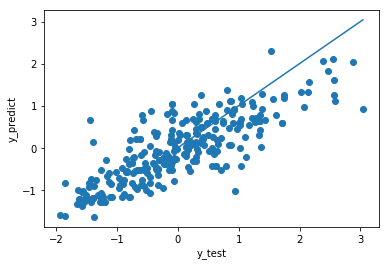

In [371]:
fig, ax = plt.subplots()
ax.scatter(y_test_stdscale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [372]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
KNN_Metrics1 = pd.DataFrame({'Model':['KNN'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
KNN_Metrics1=KNN_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
KNN_Metrics1

Model performance range with 95 percentage confidence level is : 77.565%  (9.713%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   KNN  0.579235        0.664487                 0.661527

In [373]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,KNN_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 77.565%  (9.713%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527

In [374]:
# Inference from the accuracy metrics:
# ------------------------------------
# KNN Performance is very poor.
# It is observered that KNN Performs well for lower strength and poor at higher strength
# The optimised model of KNN is
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
#                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
#                    weights='uniform')

## Decision Tree Regressor

In [375]:
param_grid={'criterion':('mse','friedman_mse','mae'), 
             'max_depth':(3,6,9,12),
             'min_samples_split':(2,50,100,150,200)}
DT_model=DecisionTreeRegressor(random_state=1)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [376]:
gs=GridSearchCV(DT_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': (3, 6, 9, 12),
                         'min_samples_split': (2, 50, 100, 150, 200)},
             pre_dis

In [377]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 12, 'min_samples_split': 2}
The model which produce best score is 0.8076255730951611
Standard deviation for the best model 0.05379595126767984


In [378]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 80.763%
 Standard Deviation : 5.37960%


In [379]:
DT_optimised_model = gs.best_estimator_
DT_optimised_model.fit(X_train,y_train)
y_pred = DT_optimised_model.predict(X_test)

In [380]:
print("The accuracy score for training set is %12.16f" %DT_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %DT_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9974470343452673
The accuracy score for testing set is 0.7582299713488746


In [381]:
# r square value for testing
r_square_for_testing=DT_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7582299713488746
The adjusted R Square value for testing set is 0.7560974903905405
The RMSE value for testing set is 7.5906785961222534


Text(0, 0.5, 'y_predict')

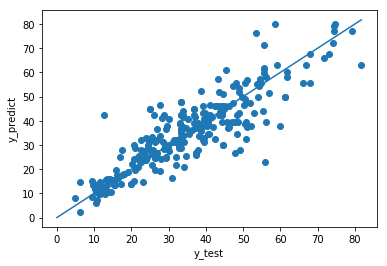

In [382]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [383]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
DecisionTree_Metrics1 = pd.DataFrame({'Model':['Decision Tree'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
DecisionTree_Metrics1=DecisionTree_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
DecisionTree_Metrics1

Model performance range with 95 percentage confidence level is : 80.763%  (10.544%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Decision Tree  7.590679         0.75823                 0.756097

In [384]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,DecisionTree_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 80.763%  (10.544%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097

In [385]:
# Inference from the accuracy metrics:
# ------------------------------------
# Decision Tree Regressor Performance is better than KNN but poorer than SVR.
# The optimised model of Decision Tree is
# DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
#                      max_leaf_nodes=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      presort=False, random_state=1, splitter='best')

## Bagging Regressor

In [386]:
param_grid={'n_estimators':(25,50,100,150,200)}
Bagging_model=BaggingRegressor(max_samples=0.7,oob_score=True, random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=0.7, n_estimators=10,
                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
                 warm_start=False)

In [387]:
gs=GridSearchCV(Bagging_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=0.7,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=True, random_state=1,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [388]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'n_estimators': 50}
The model which produce best score is 0.8906111295854617
Standard deviation for the best model 0.037863246833193136


In [389]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.061%
 Standard Deviation : 3.78632%


In [390]:
Bagging_optimised_model = gs.best_estimator_
Bagging_optimised_model.fit(X_train,y_train)
y_pred = Bagging_optimised_model.predict(X_test)

In [391]:
print("The accuracy score for training set is %12.16f" %Bagging_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Bagging_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9717118194029422
The accuracy score for testing set is 0.8453170345258473


In [392]:
# r square value for testing
r_square_for_testing=Bagging_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8453170345258473
The adjusted R Square value for testing set is 0.8439526864290521
The RMSE value for testing set is 6.0715645516890584


Text(0, 0.5, 'y_predict')

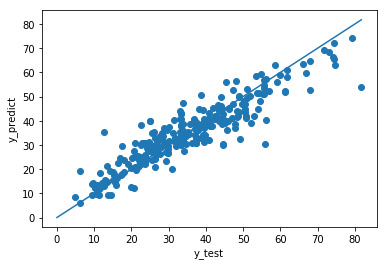

In [393]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [394]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Bagging_Metrics1 = pd.DataFrame({'Model':['Bagging'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Bagging_Metrics1=Bagging_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Bagging_Metrics1

Model performance range with 95 percentage confidence level is : 89.061%  (7.421%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Bagging  6.071565        0.845317                 0.843953

In [395]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Bagging_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 89.061%  (7.421%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   
0                                   Bagging  6.071565        0.845317   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097  
0                 0.843953

In [396]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance
# The optimised model of Bagging Regressor is
# BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
#                 max_features=1.0, max_samples=0.7, n_estimators=50,
#                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
#                 warm_start=False)

## Adaboost Regressor

In [397]:
param_grid={'n_estimators':(25,50,100,150,200),
           'learning_rate':(1.0,0.8,0.6,0.4)}
Adaboost_model=AdaBoostRegressor(random_state=1)
Adaboost_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [398]:
gs=GridSearchCV(Adaboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': (1.0, 0.8, 0.6, 0.4),
                         'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [399]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'learning_rate': 1.0, 'n_estimators': 150}
The model which produce best score is 0.7962232377478757
Standard deviation for the best model 0.04097652121114378


In [400]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 79.622%
 Standard Deviation : 4.09765%


In [401]:
Adaboost_optimised_model = gs.best_estimator_
Adaboost_optimised_model.fit(X_train,y_train)
y_pred = Adaboost_optimised_model.predict(X_test)

In [402]:
print("The accuracy score for training set is %12.16f" %Adaboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Adaboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.8421930160002133
The accuracy score for testing set is 0.7444389066495328


In [403]:
# r square value for testing
r_square_for_testing=Adaboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7444389066495328
The adjusted R Square value for testing set is 0.7421847845472134
The RMSE value for testing set is 7.8041703513795921


Text(0, 0.5, 'y_predict')

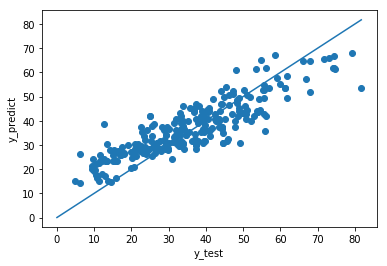

In [404]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [405]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Adaboost_Metrics1 = pd.DataFrame({'Model':['Adaboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Adaboost_Metrics1=Adaboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Adaboost_Metrics1

Model performance range with 95 percentage confidence level is : 79.622%  (8.031%)


Model     RMSE  R Square Value  Adjusted R Square Value
0  Adaboost  7.80417        0.744439                 0.742185

In [406]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Adaboost_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 79.622%  (8.031%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   
0                                   Bagging  6.071565        0.845317   
0                                  Adaboost  7.804170        0.744439   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097  
0                 0.843953  
0                 0.742185

In [407]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance than Ada Boosting
# The optimised model of AdaBoost Regressor is
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                  n_estimators=150, random_state=1)

## Gradient Boosting Regressor

In [408]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('friedman_mse', 'mse'),
            'max_depth' : (3,5,7,9)}
Gradientboost_model=GradientBoostingRegressor(random_state=1)
Gradientboost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [409]:
gs=GridSearchCV(Gradientboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [410]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'friedman_mse', 'max_depth': 3, 'n_estimators': 200}
The model which produce best score is 0.9101192781999748
Standard deviation for the best model 0.03141902685099813


In [411]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 91.012%
 Standard Deviation : 3.14190%


In [412]:
Gradientboost_optimised_model = gs.best_estimator_
Gradientboost_optimised_model.fit(X_train,y_train)
y_pred = Gradientboost_optimised_model.predict(X_test)

In [413]:
print("The accuracy score for training set is %12.16f" %Gradientboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Gradientboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9767963737834877
The accuracy score for testing set is 0.8822469237586450


In [414]:
# r square value for testing
r_square_for_testing=Gradientboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8822469237586450
The adjusted R Square value for testing set is 0.8812083078711799
The RMSE value for testing set is 5.2974333683205819


Text(0, 0.5, 'y_predict')

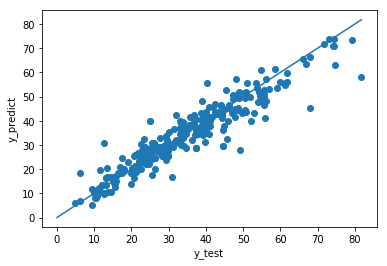

In [415]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [416]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Gradientboost_Metrics1 = pd.DataFrame({'Model':['Gradientboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Gradientboost_Metrics1=Gradientboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Gradientboost_Metrics1

Model performance range with 95 percentage confidence level is : 91.012%  (6.158%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Gradientboost  5.297433        0.882247                 0.881208

In [417]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,Gradientboost_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 91.012%  (6.158%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   
0                                   Bagging  6.071565        0.845317   
0                                  Adaboost  7.804170        0.744439   
0                             Gradientboost  5.297433        0.882247   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097  
0                 0.843953  
0                 0.742185  
0                 0.881208

In [418]:
# Inference from the accuracy metrics:
# ------------------------------------
# Gradient Boosting Performance is better
# The optimised model of Gradient Boosting Regressor is
# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                          learning_rate=0.1, loss='ls', max_depth=3,
#                          max_features=None, max_leaf_nodes=None,
#                          min_impurity_decrease=0.0, min_impurity_split=None,
#                          min_samples_leaf=1, min_samples_split=2,
#                          min_weight_fraction_leaf=0.0, n_estimators=200,
#                          n_iter_no_change=None, presort='auto', random_state=1,
#                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                          verbose=0, warm_start=False)

## Random Forest Regressor

In [419]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('mae', 'mse'),
            'max_depth' : (3,5,7,9)}
RandomForest_model=RandomForestRegressor(random_state=1)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [420]:
gs=GridSearchCV(RandomForest_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mae', 'mse'), 'max_dep

In [421]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 9, 'n_estimators': 200}
The model which produce best score is 0.8901852497785943
Standard deviation for the best model 0.040779427833423726


In [422]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.019%
 Standard Deviation : 4.07794%


In [423]:
RandomForest_optimised_model = gs.best_estimator_
RandomForest_optimised_model.fit(X_train,y_train)
y_pred = RandomForest_optimised_model.predict(X_test)

In [424]:
print("The accuracy score for training set is %12.16f" %RandomForest_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %RandomForest_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9767523808677457
The accuracy score for testing set is 0.8523297001280948


In [425]:
# r square value for testing
r_square_for_testing=RandomForest_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8523297001280948
The adjusted R Square value for testing set is 0.8510272057521574
The RMSE value for testing set is 5.9323388607660714


Text(0, 0.5, 'y_predict')

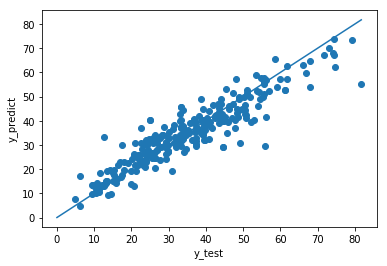

In [426]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [427]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
RandomForest_Metrics1 = pd.DataFrame({'Model':['Random Forest'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
RandomForest_Metrics1=RandomForest_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
RandomForest_Metrics1

Model performance range with 95 percentage confidence level is : 89.019%  (7.993%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Random Forest  5.932339         0.85233                 0.851027

In [428]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table2=pd.concat([Comparison_Table2,RandomForest_Metrics1])
Comparison_Table2

Model performance range with 95 percentage confidence level is : 89.019%  (7.993%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   
0                                   Bagging  6.071565        0.845317   
0                                  Adaboost  7.804170        0.744439   
0                             Gradientboost  5.297433        0.882247   
0                             Random Forest  5.932339        0.852330   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097  
0                 0.843953  
0                 0.742185  
0                 0.881208  
0                 0.851027

In [429]:
# Inference from the accuracy metrics:
# ------------------------------------
# Random Forest Regressor has poorer Performance than Gradient Boosting Regressor
# The optimised model of Random Forest RegressorGradient Boosting Regressor is
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
#                      max_features='auto', max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=200,
#                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                      warm_start=False)

In [430]:
# Summary of Iteration 2:
# -------------------------
# Duplicate Data were removed 
# Outliers were observed and removed
# Gradient Boost regressor has the best performance with 88.22 Score in training dataset
# The model has the performance range  91.012%  (6.158%) with 95% confidence level

In [431]:
# Comparing Iteration 1 and 2:
# ---------------------------
# Gradientboost performance is better in both training and test dataset at iteration 1 & 2.
# Removing the outliers is not good, since valid datapoints are there in the dataset as extreme values

## Iteration 3

1. Removing duplicate data
2. Outliers are not treated
3. Data preprocessing should be done to convert the data into ratios (As per domain experts Suggesion)

In [432]:
# Removing Duplicate Data
concrete_Iter3=concrete_df.copy(deep=True)
concrete_Iter3.drop_duplicates(keep='first', inplace=True) # To remove 25 duplicate datapoints in the dataset
concrete_Iter3.shape

(1005, 9)

In [433]:
# Feature Engineering
# -------------------
# Since the concrete strength depends on the mixture of water,cement,fineagg and courseagg
# The ratio of all plays a major role in predicting the strength
# So, at each datapoints all the independent attributes (except age) is divided by the value of cement(kg)

In [434]:
# Converting all the attributes 'cement', 'slage', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg' into ratios
concrete_Iter3['cement/cement']=concrete_Iter3['cement']/concrete_Iter3['cement']
concrete_Iter3['slag/cement']=concrete_Iter3['slag']/concrete_Iter3['cement']
concrete_Iter3['ash/cement']=concrete_Iter3['ash']/concrete_Iter3['cement']
concrete_Iter3['water/cement']=concrete_Iter3['water']/concrete_Iter3['cement']
concrete_Iter3['superplastic/cement']=concrete_Iter3['superplastic']/concrete_Iter3['cement']
concrete_Iter3['coarseagg/cement']=concrete_Iter3['coarseagg']/concrete_Iter3['cement']
concrete_Iter3['fineagg/cement']=concrete_Iter3['fineagg']/concrete_Iter3['cement']
concrete_Iter3.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  cement/cement  slag/cement  ash/cement  water/cement  \
0     29.89            1.0     1.500354    0.000000      1.440198   
1     23.51            1.0     0.249852    0.735938      0.937241   
2     29.22            1.0     0.000000    0.382800      0.749600   
3     45.85            1.0     0.428571    0.000000      0.857143   
4     18.29            1.0     1.184755    0.000000      1.248708   

   superplastic/cement  coarseagg/cement  fineagg/cement  
0             0.000000          6.877565        5.297240  
1             0.063943          6.399053        4.714032  
2             0.022000          3.827600        3.444800  
3             0.000000          3.503759        2.518797  
4             0.058786          6.766150        4.500646

In [435]:
# Dropping down the columns 'cement', 'slag', 'ash', 'water', 'superplatic', 'coarseagg', 'fineagg'
concrete_Iter3.drop(['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'], axis=1, inplace=True)

In [436]:
concrete_Iter3.head()

age  strength  cement/cement  slag/cement  ash/cement  water/cement  \
0   28     29.89            1.0     1.500354    0.000000      1.440198   
1   14     23.51            1.0     0.249852    0.735938      0.937241   
2   28     29.22            1.0     0.000000    0.382800      0.749600   
3   28     45.85            1.0     0.428571    0.000000      0.857143   
4   28     18.29            1.0     1.184755    0.000000      1.248708   

   superplastic/cement  coarseagg/cement  fineagg/cement  
0             0.000000          6.877565        5.297240  
1             0.063943          6.399053        4.714032  
2             0.022000          3.827600        3.444800  
3             0.000000          3.503759        2.518797  
4             0.058786          6.766150        4.500646

In [437]:
# Rearranging the columns
concrete_Iter3 = concrete_Iter3[['cement/cement', 'slag/cement', 'ash/cement', 'water/cement', 'superplastic/cement', 'coarseagg/cement', 'fineagg/cement', 'age', 'strength']]
concrete_Iter3.head()

cement/cement  slag/cement  ash/cement  water/cement  superplastic/cement  \
0            1.0     1.500354    0.000000      1.440198             0.000000   
1            1.0     0.249852    0.735938      0.937241             0.063943   
2            1.0     0.000000    0.382800      0.749600             0.022000   
3            1.0     0.428571    0.000000      0.857143             0.000000   
4            1.0     1.184755    0.000000      1.248708             0.058786   

   coarseagg/cement  fineagg/cement  age  strength  
0          6.877565        5.297240   28     29.89  
1          6.399053        4.714032   14     23.51  
2          3.827600        3.444800   28     29.22  
3          3.503759        2.518797   28     45.85  
4          6.766150        4.500646   28     18.29

In [438]:
concrete_Iter3.shape # 25 duplicate rows is removed and 1 column is removed after feature engineering

(1005, 9)

In [439]:
# Observing the distribution of Independent attributes before and after featuer engineering

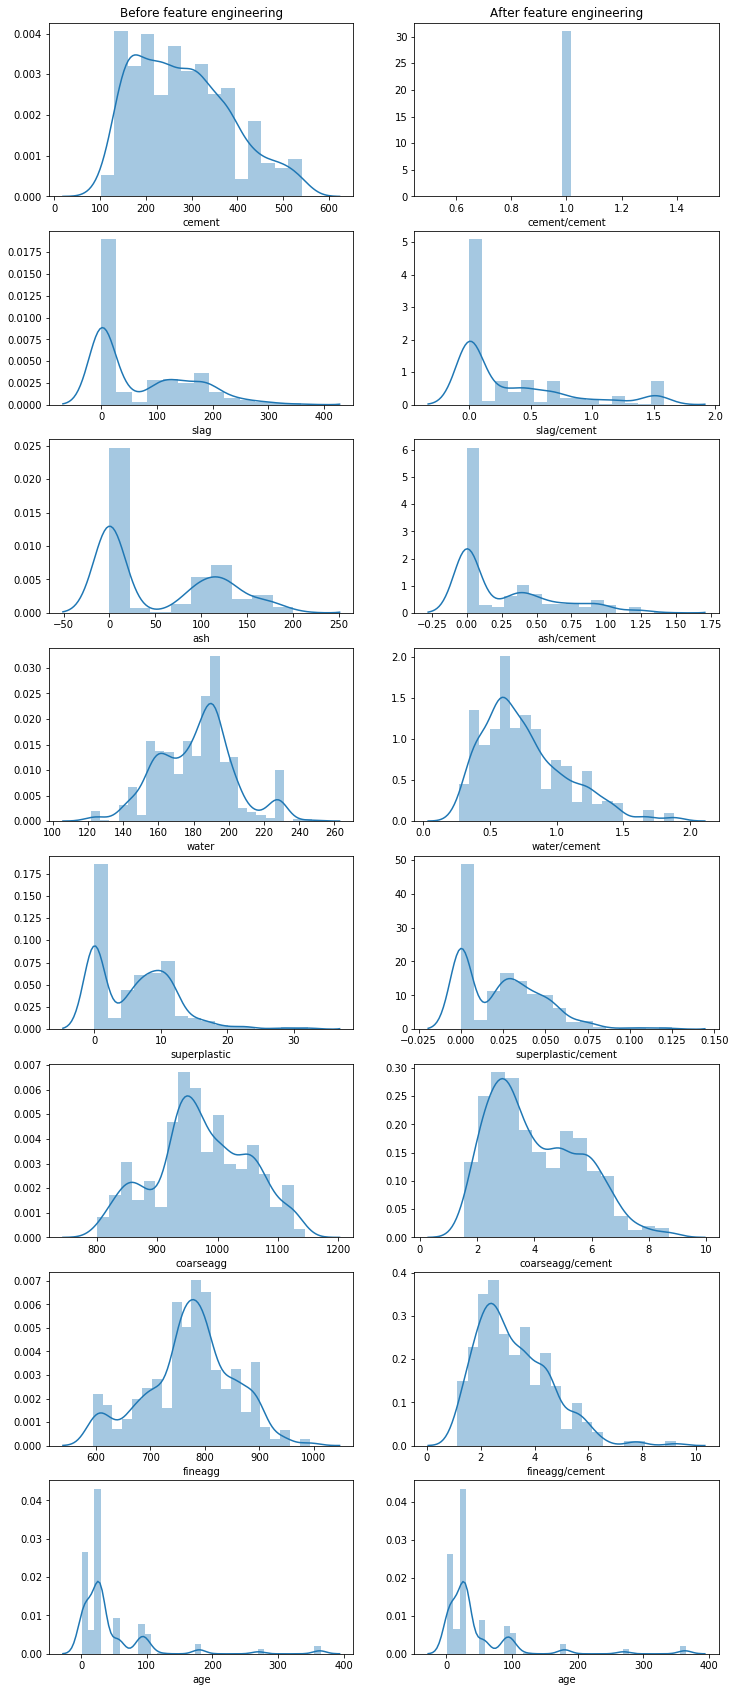

In [440]:
# Analysing the dataset using histogram.
f, axes = plt.subplots(8, 2, figsize=(12, 30), sharex=True)
subplot(8,2,1)
sns.distplot(concrete_df['cement'])
plt.title('Before feature engineering')
subplot(8,2,2)
sns.distplot(concrete_Iter3['cement/cement'])
plt.title('After feature engineering')
subplot(8,2,3)
sns.distplot(concrete_df['slag'])
subplot(8,2,4)
sns.distplot(concrete_Iter3['slag/cement'])
subplot(8,2,5)
sns.distplot(concrete_df['ash'])
subplot(8,2,6)
sns.distplot(concrete_Iter3['ash/cement'])
subplot(8,2,7)
sns.distplot(concrete_df['water'])
subplot(8,2,8)
sns.distplot(concrete_Iter3['water/cement'])
subplot(8,2,9)
sns.distplot(concrete_df['superplastic'])
subplot(8,2,10)
sns.distplot(concrete_Iter3['superplastic/cement'])
subplot(8,2,11)
sns.distplot(concrete_df['coarseagg'])
subplot(8,2,12)
sns.distplot(concrete_Iter3['coarseagg/cement'])
subplot(8,2,13)
sns.distplot(concrete_df['fineagg'])
subplot(8,2,14)
sns.distplot(concrete_Iter3['fineagg/cement'])
subplot(8,2,15)
sns.distplot(concrete_df['age'])
subplot(8,2,16)
sns.distplot(concrete_Iter3['age'])
plt.show()

In [441]:
#Dropping down the column 'cement/cement' since all the row values have the ratio 1
concrete_Iter3.drop(['cement/cement'], axis=1, inplace=True)
concrete_Iter3.head()

slag/cement  ash/cement  water/cement  superplastic/cement  \
0     1.500354    0.000000      1.440198             0.000000   
1     0.249852    0.735938      0.937241             0.063943   
2     0.000000    0.382800      0.749600             0.022000   
3     0.428571    0.000000      0.857143             0.000000   
4     1.184755    0.000000      1.248708             0.058786   

   coarseagg/cement  fineagg/cement  age  strength  
0          6.877565        5.297240   28     29.89  
1          6.399053        4.714032   14     23.51  
2          3.827600        3.444800   28     29.22  
3          3.503759        2.518797   28     45.85  
4          6.766150        4.500646   28     18.29

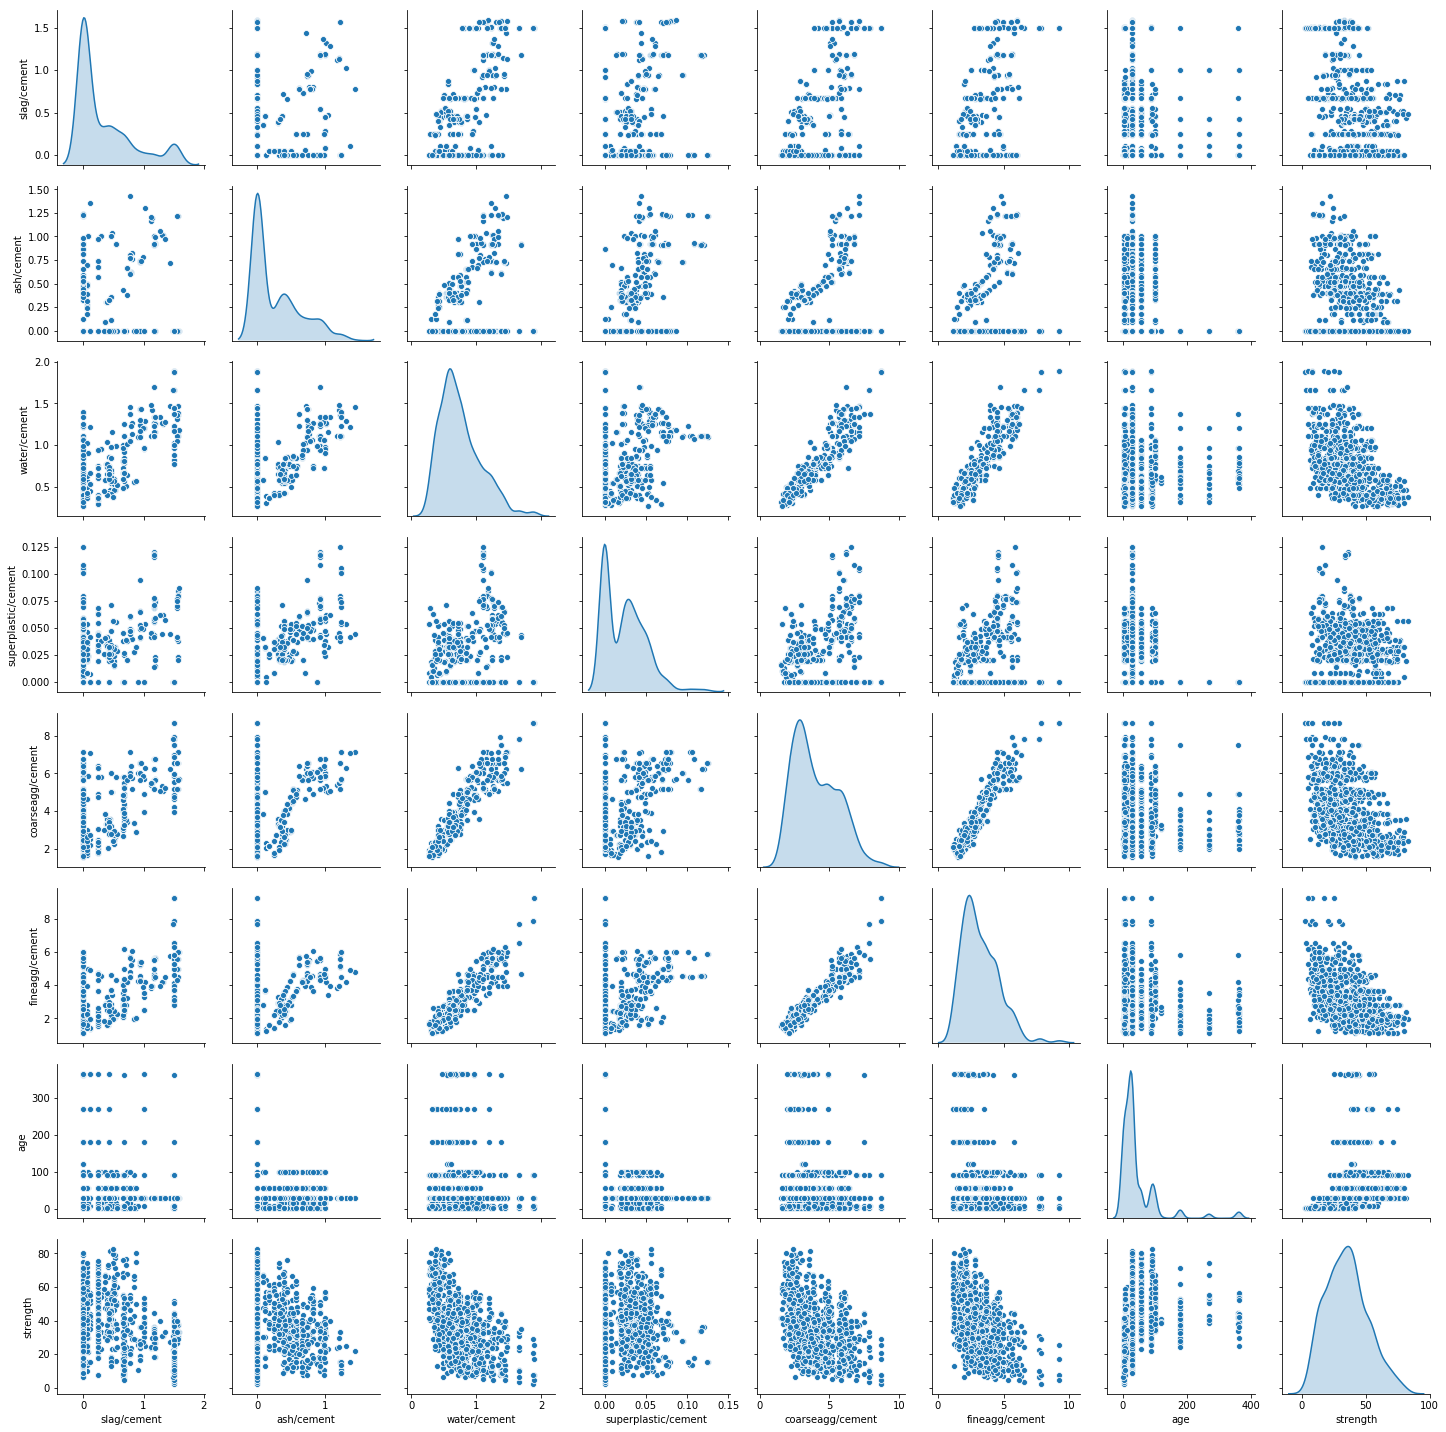

In [442]:
# Pair plot between all the independent attributes
sns.pairplot(concrete_Iter3, diag_kind='kde')

In [443]:
# Inference from the pairplot:
# ------------------------------
# 3 to 5 Gaussians wer available
# Linear relationship between the independent attributes were also obaserved

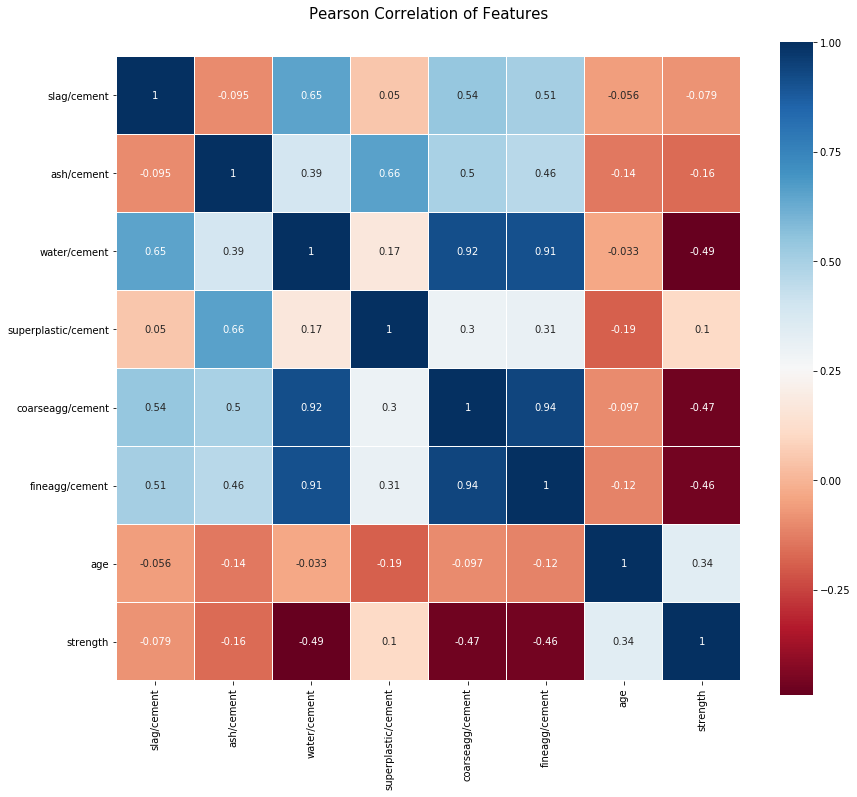

In [444]:
# Observing the relationship between different attributes with the target class
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(concrete_Iter3.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [445]:
# Writing down the relationship between independent attribute and dependent attribute in order of importance (descending order)
# -----------------------------------------------------------------------------------------------------------------------------
# Water/cement         - 0.49
# Coarseagg/cement     - 0.47
# Fineagg/cement       - 0.46
# Age                    0.37
# Ash/cement           - 0.16
# Superplastic/cement    0.1
# Slag/cement          -0.079


In [446]:
concrete_Iter3_backup1=concrete_Iter3.copy(deep=True)
concrete_Iter3_backup2=concrete_Iter3.copy(deep=True)
concrete_Iter3.head()

slag/cement  ash/cement  water/cement  superplastic/cement  \
0     1.500354    0.000000      1.440198             0.000000   
1     0.249852    0.735938      0.937241             0.063943   
2     0.000000    0.382800      0.749600             0.022000   
3     0.428571    0.000000      0.857143             0.000000   
4     1.184755    0.000000      1.248708             0.058786   

   coarseagg/cement  fineagg/cement  age  strength  
0          6.877565        5.297240   28     29.89  
1          6.399053        4.714032   14     23.51  
2          3.827600        3.444800   28     29.22  
3          3.503759        2.518797   28     45.85  
4          6.766150        4.500646   28     18.29

In [447]:
X=concrete_Iter3.drop('strength',axis=1) # Independent Attribute
y=concrete_Iter3.pop('strength') # Dependent Attribute

In [448]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1) # Splitting 70:30 training and test set ratios
num_folds=10
seed=7

## Using Linear Regression

In [449]:
kfold=KFold(n_splits=num_folds,random_state=seed)
LR_model=LinearRegression()
results=cross_val_score(LR_model,X_train, y_train, cv=kfold)
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

 Mean Accuracy      : 55.896%
 Standard Deviation : 7.045%


In [450]:
print("The accuracy score for training set is %12.16f" %LR_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %LR_model.score(X_test,y_test))

The accuracy score for training set is 0.5748458704208065
The accuracy score for testing set is 0.4974635459550108


In [451]:
# r square value for testing
r_square_for_testing=LR_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.4974635459550108
The adjusted R Square value for testing set is 0.4939352057560991
The RMSE value for testing set is 10.8063657121805949


Text(0, 0.5, 'y_predict')

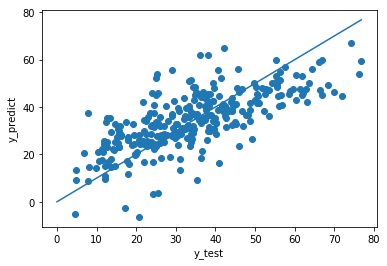

In [452]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [453]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Linear_Regression_Metrics1 = pd.DataFrame({'Model':['Linear Regression'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Linear_Regression_Metrics1=Linear_Regression_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Linear_Regression_Metrics1

Model performance range with 95 percentage confidence level is : 55.896%  (13.808%)


Model       RMSE  R Square Value  Adjusted R Square Value
0  Linear Regression  10.806366        0.497464                 0.493935

## Using Polynomial Regression (degree=2)

In [454]:
poly=PolynomialFeatures(degree=2, interaction_only=True) #Considering Polynomial degree as 2
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

In [455]:
print(X_train.shape)
print(X_train_2.shape)

(703, 7)
(703, 29)


In [456]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 37

In [457]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR2_model=linear_model.LinearRegression()
results=cross_val_score(PR2_model,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-1.17711954  0.71683781  0.58214237  0.68592514  0.77909621  0.72632097
  0.66693717  0.70369419  0.51860265  0.57499221]


In [458]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 47.774%
 Standard Deviation : 55.683%


In [459]:
PR2_model.fit(X_train_2,y_train)
y_pred = PR2_model.predict(X_test_2)

In [460]:
print("The accuracy score for training set is %12.16f" %PR2_model.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %PR2_model.score(X_test_2,y_test))

The accuracy score for training set is 0.7181220760269240
The accuracy score for testing set is 0.6763140320942933


In [461]:
print("The accuracy score for training set is %12.16f" %PR2_model.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %PR2_model.score(X_test_2,y_test))

The accuracy score for training set is 0.7181220760269240
The accuracy score for testing set is 0.6763140320942933


In [462]:
# r square value for testing
r_square_for_testing=PR2_model.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6763140320942933
The adjusted R Square value for testing set is 0.6740414124600507
The RMSE value for testing set is 8.6727696543553527


Text(0, 0.5, 'y_predict')

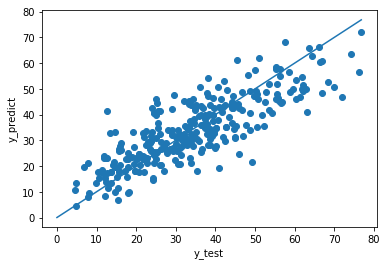

In [463]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [464]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2 = pd.DataFrame({'Model':['Polynomial Regression - degree 2'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2=Polynomial_Regression_Metrics1_degree2[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2

Model performance range with 95 percentage confidence level is : 47.774%  (109.138%)


Model     RMSE  R Square Value  \
0  Polynomial Regression - degree 2  8.67277        0.676314   

   Adjusted R Square Value  
0                 0.674041

In [465]:
Comparison_Table3=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2])
Comparison_Table3

Model       RMSE  R Square Value  \
0                 Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 2   8.672770        0.676314   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041

In [466]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=2 performs better than linear regression
# Trying to improve the performance with Ridge and Lasso Regression for Polynomial degree =2

## Using Polynomial Regression (degree=2)  & Ridge Regression

In [467]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.65905826 0.697744   0.56915708 0.67179393 0.7660412  0.73373209
 0.66092473 0.70371456 0.45053584 0.69551867]


In [468]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 66.082%  (16.808%)


In [469]:
ridge.fit(X_train_2,y_train)
print('Ridge model:', (ridge.coef_))

Ridge model: [  0.          25.39390705  21.45344456 -47.98684702   4.6240993
  -5.01757947  -7.74590647   0.15110242   1.24256702  -5.29268307
   8.92806269  -4.59074047   3.84957121   0.1430558   -4.80129739
 -22.42990312  -3.80533514   2.43333935   0.15911205  -1.57132998
   6.03419827  -1.94939597  -0.18285175   5.37187735 -13.01428557
   4.16601487   0.74158503  -0.063797     0.08914688]


In [470]:
y_pred = ridge.predict(X_test_2)

In [471]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_2,y_test))

The accuracy score for training set is 0.7042919997073757
The accuracy score for testing set is 0.6568897815549817


In [472]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6568897815549817
The adjusted R Square value for testing set is 0.6544807830302926
The RMSE value for testing set is 8.9292031056298722


Text(0, 0.5, 'y_predict')

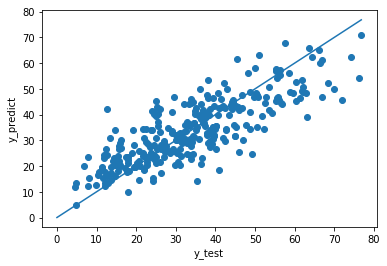

In [473]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [474]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_ridge=Polynomial_Regression_Metrics1_degree2_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_ridge

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & ridge  8.929203         0.65689   

   Adjusted R Square Value  
0                 0.654481

In [475]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree2_ridge])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 66.082%  (16.808%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481

## Using Polynomial Regression (degree=2)  & Lasso Regression

In [476]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3, max_iter=100000)
results=cross_val_score(lasso,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.64858487 0.65542432 0.57975139 0.60371897 0.71820995 0.69604255
 0.59324214 0.68316433 0.41773472 0.63212706]


In [477]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 62.280%  (15.811%)


In [478]:
lasso.fit(X_train_2,y_train)
print('Lasso model:', (lasso.coef_))

Lasso model: [ 0.          0.          0.         -0.          0.         -2.11166529
 -8.13834583  0.24276062 -0.          0.          0.          0.
  1.96799001  0.25345785 -0.         -0.          0.20151715  0.
  0.23704902  0.         -2.44958549 -0.         -0.4259615   0.
  0.          3.86153813  0.65068582 -0.0705198   0.11317466]


In [479]:
y_pred = lasso.predict(X_test_2)

In [480]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_2,y_test))

The accuracy score for training set is 0.6598822731843348
The accuracy score for testing set is 0.6156748655380195


In [481]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6156748655380195
The adjusted R Square value for testing set is 0.6129764944836225
The RMSE value for testing set is 9.4502929052100342


Text(0, 0.5, 'y_predict')

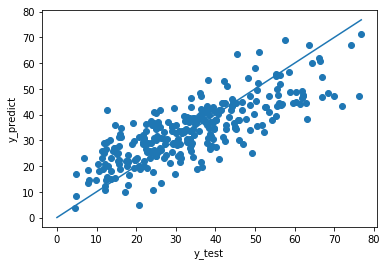

In [482]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [483]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 62.280%  (15.811%)


In [484]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_Lasso=Polynomial_Regression_Metrics1_degree2_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_Lasso

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & lasso  9.450293        0.615675   

   Adjusted R Square Value  
0                 0.612976

In [485]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree2_Lasso])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 62.280%  (15.811%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   
0  Polynomial Regression - degree 2 & lasso   9.450293        0.615675   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481  
0                 0.612976

## Using Polynomial Regression (degree=3)

In [486]:
poly=PolynomialFeatures(degree=3, interaction_only=True) #Considering Polynomial degree as 3
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)

In [487]:
print(X_train.shape)
print(X_train_3.shape)

(703, 7)
(703, 64)


In [488]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 93

In [489]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR3_model=linear_model.LinearRegression()
results=cross_val_score(PR3_model,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-1.90190018  0.71441337  0.59447243  0.65216375  0.76243213  0.72613127
  0.73185926  0.78812836  0.11378463  0.6527836 ]


In [490]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 38.343%
 Standard Deviation : 78.362%


In [491]:
PR3_model.fit(X_train_3,y_train)
y_pred = PR3_model.predict(X_test_3)

In [492]:
print("The accuracy score for training set is %12.16f" %PR3_model.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %PR3_model.score(X_test_3,y_test))

The accuracy score for training set is 0.7777983095131666
The accuracy score for testing set is 0.6602152765097273


In [493]:
# r square value for testing
r_square_for_testing=PR3_model.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6602152765097273
The adjusted R Square value for testing set is 0.6578296264952519
The RMSE value for testing set is 8.8858259060857048


Text(0, 0.5, 'y_predict')

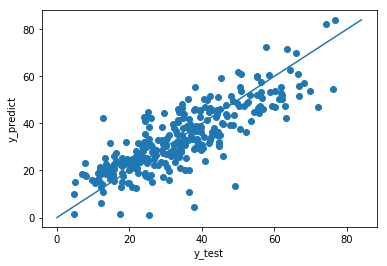

In [494]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [495]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3 = pd.DataFrame({'Model':['Polynomial Regression - degree 3'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3=Polynomial_Regression_Metrics1_degree3[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3

Model performance range with 95 percentage confidence level is : 38.343%  (153.589%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3  8.885826        0.660215   

   Adjusted R Square Value  
0                  0.65783

In [496]:
Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree3])
Comparison_Table3

Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   
0  Polynomial Regression - degree 2 & lasso   9.450293        0.615675   
0          Polynomial Regression - degree 3   8.885826        0.660215   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481  
0                 0.612976  
0                 0.657830

In [497]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=3 performs better than linear regression and polynomial regression with degree =2 in test dataset
# But the 95% confidence accuracy score is 59.766%  (109.807%) 
# i.e it's performance may be too high and too low at production
# So this model is a poor model
# So trying out the ridge and Lasso

## Using Polynomial Regression (degree=3)  & Ridge Regression

In [498]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.74366203 0.73828677 0.58050251 0.66251531 0.77801874 0.75816862
 0.74986469 0.7770456  0.29315099 0.70237873]


In [499]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 67.836%  (27.566%)


In [500]:
ridge.fit(X_train_3,y_train)
y_pred = ridge.predict(X_test_3)

In [501]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_3,y_test))

The accuracy score for training set is 0.7652232544840573
The accuracy score for testing set is 0.6775322894978320


In [502]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6775322894978320
The adjusted R Square value for testing set is 0.6752682233258007
The RMSE value for testing set is 8.6564334100550440


Text(0, 0.5, 'y_predict')

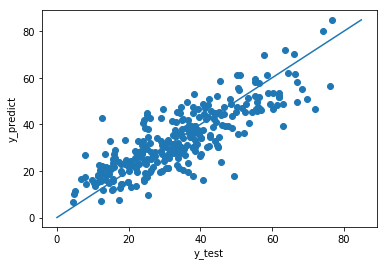

In [503]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [504]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_ridge=Polynomial_Regression_Metrics1_degree3_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_ridge

Model performance range with 95 percentage confidence level is : 67.836%  (27.566%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & ridge  8.656433        0.677532   

   Adjusted R Square Value  
0                 0.675268

In [505]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree3_ridge])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 67.836%  (27.566%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   
0  Polynomial Regression - degree 2 & lasso   9.450293        0.615675   
0          Polynomial Regression - degree 3   8.885826        0.660215   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481  
0                 0.612976  
0                 0.657830  
0                 0.675268

In [506]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Improvement in performance metrics between polynomial Regression with degree - 3 and ridge
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        :  38.343%  (153.589%)
# With Ridge Regression     :  67.836%  (27.566%)
# --------------------------------------------------------------------------

## Using Polynomial Regression (degree=3)  & Lasso Regression

In [507]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3, max_iter=10000)
results=cross_val_score(lasso,X_train_3, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1005.9621684373051, tolerance: 17.080863663037977
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3237.645167673363, tolerance: 17.33537144651899
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3244.616849613034, tolerance: 17.723638325000003
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the numb

The score value for all the crossfolds 
[0.64210818 0.71289067 0.52609267 0.66509041 0.76901423 0.70056828
 0.60547235 0.70897912 0.26884749 0.63036984]


C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.5497930141355, tolerance: 17.716950550268564
  positive)
C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3666.4310152657636, tolerance: 17.69028471592417
  positive)


In [508]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 62.294%  (26.305%)


In [509]:
lasso.fit(X_train_3,y_train)
y_pred = lasso.predict(X_test_3)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2072.365617453448, tolerance: 19.541592919374114
  positive)


In [510]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_3,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_3,y_test))

The accuracy score for training set is 0.6956054955476353
The accuracy score for testing set is 0.6407533034213000


In [511]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_3,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6407533034213000
The adjusted R Square value for testing set is 0.6382310096639772
The RMSE value for testing set is 9.1367610498520229


Text(0, 0.5, 'y_predict')

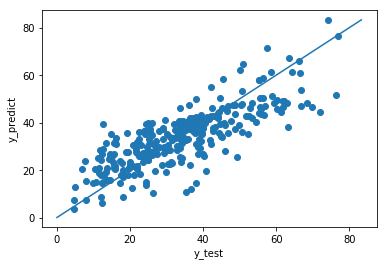

In [512]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [513]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree3_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 3 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree3_Lasso=Polynomial_Regression_Metrics1_degree3_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree3_Lasso

Model performance range with 95 percentage confidence level is : 62.294%  (26.305%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 3 & lasso  9.136761        0.640753   

   Adjusted R Square Value  
0                 0.638231

In [514]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree3_Lasso])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 62.294%  (26.305%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   
0  Polynomial Regression - degree 2 & lasso   9.450293        0.615675   
0          Polynomial Regression - degree 3   8.885826        0.660215   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0  Polynomial Regression - degree 3 & lasso   9.136761        0.640753   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481  
0                 0.612976  
0                 0.657830  
0                 0.675268  
0                 0.638231

In [515]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# Eventhough there is no much difference in performance metrics between polynomial Regression with degree - 3, ridge and lasso
# The accuracy metrics for 95% confidence level improved in Lasso Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        :  38.343%  (153.589%)
# With Ridge Regression     :  67.836%  (27.566%)
# With Lasso Regression     :  62.294%  (26.305%)
# --------------------------------------------------------------------------
# Lasso didn't converge at degree=3

In [516]:
# Observation by comparing Model of Linear regression, Polynomial Regression - Degree 2 & Polynomial Regression - Degree 3
# ------------------------------------------------------------------------------------------------------------------------
# Polynomial regression -degree 3 ridge model is has better performance than Linear Regression and Polynomial Regression - degree 2
# The model performance may expected decreases as the degree increases further...

## Using Polynomial Regression (degree=4)

In [517]:
poly=PolynomialFeatures(degree=4, interaction_only=True) #Considering Polynomial degree as 4
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)

In [518]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR4_model=linear_model.LinearRegression()
results=cross_val_score(PR4_model,X_train_4, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-37.70942791   0.62623837   0.5288558    0.53912673   0.76906853
   0.71935767   0.74024447   0.79028303   0.3521362    0.7123667 ]


In [519]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : -319.318%
 Standard Deviation : 1150.614%


In [520]:
PR4_model.fit(X_train_4,y_train)
y_pred = PR4_model.predict(X_test_4)

In [521]:
print("The accuracy score for training set is %12.16f" %PR4_model.score(X_train_4,y_train))
print("The accuracy score for testing set is %12.16f" %PR4_model.score(X_test_4,y_test))

The accuracy score for training set is 0.8010278601497347
The accuracy score for testing set is 0.6739784893279752


In [522]:
# r square value for testing
r_square_for_testing=PR4_model.score(X_test_4,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)

#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6739784893279752
The adjusted R Square value for testing set is 0.6716894717003883
The RMSE value for testing set is 8.7040024220040362


In [523]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : -319.318%  (2255.204%)


In [524]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree4 = pd.DataFrame({'Model':['Polynomial Regression - degree 4'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree4=Polynomial_Regression_Metrics1_degree4[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree4

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 4  8.704002        0.673978   

   Adjusted R Square Value  
0                 0.671689

In [525]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Polynomial_Regression_Metrics1_degree4])
Comparison_Table3

Model performance range with 95 percentage confidence level is : -319.318%  (2255.204%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0          Polynomial Regression - degree 2   8.672770        0.676314   
0  Polynomial Regression - degree 2 & ridge   8.929203        0.656890   
0  Polynomial Regression - degree 2 & lasso   9.450293        0.615675   
0          Polynomial Regression - degree 3   8.885826        0.660215   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0  Polynomial Regression - degree 3 & lasso   9.136761        0.640753   
0          Polynomial Regression - degree 4   8.704002        0.673978   

   Adjusted R Square Value  
0                 0.493935  
0                 0.674041  
0                 0.654481  
0                 0.612976  
0                 0.657830  
0                 0.675268  
0                 0.638231  
0                 0.671689

In [526]:
# Inference from the accuracy metrics:
# -------------------------------------------------------------------------
# As expected the performance is very poor at degree=4
# So if the degree is further more increased the model will become over fit.
#---------------------------------------------------------------------------

In [527]:
# Keeping the performance metrics of best model in the comparison table
Comparison_Table3=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree3_ridge])
Comparison_Table3

Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268

## Support Vector Regressor

In [528]:
#Spliting into training and test test first to avoid data leak
train,test=train_test_split(concrete_Iter2_backup1,test_size=0.30, random_state=1)
print(train.shape)
print(test.shape)

(641, 9)
(275, 9)


In [529]:
X_train=train.drop('strength',axis=1) # Independent Attribute for training data
X_test=test.drop('strength',axis=1) # Independent Attribute for testing data
y_train=train.pop('strength') # Dependent Attribute for training data
y_test=test.pop('strength') # Dependent Attribute for testin data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(641, 8)
(275, 8)
(641,)
(275,)


In [530]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)
y_train_scale = preprocessing.scale(y_train)
y_test_scale = preprocessing.scale(y_test)

In [531]:
param_grid={'C':(1,2,3,4), 
            'kernel':('linear', 'rbf', 'poly','sigmoid'),
            'degree':(1,2,3,4)}
SVR_model=svm.SVR()
SVR_model.fit(X_train_scale,y_train_scale)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [532]:
gs=GridSearchCV(SVR_model,param_grid,cv=10)
gs.fit(X_train_scale,y_train_scale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 2, 3, 4), 'degree': (1, 2, 3, 4),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [533]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model',gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'C': 4, 'degree': 1, 'kernel': 'rbf'}
The model which produce best score is 0.8986260198343836
Standard deviation for the best model 0.023295662091248177


In [534]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.863%
 Standard Deviation : 2.32957%


In [535]:
SVR_optimised_model = gs.best_estimator_
SVR_optimised_model.fit(X_train_scale,y_train_scale)
y_pred = SVR_optimised_model.predict(X_test_scale)

In [536]:
print("The accuracy score for training set is %12.16f" %SVR_optimised_model.score(X_train_scale,y_train_scale))
print("The accuracy score for testing set is %12.16f" %SVR_optimised_model.score(X_test_scale,y_test_scale))

The accuracy score for training set is 0.9565203998646997
The accuracy score for testing set is 0.8274389945454171


In [537]:
# r square value for testing
r_square_for_testing=SVR_optimised_model.score(X_test_scale,y_test_scale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_scale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8274389945454171
The adjusted R Square value for testing set is 0.8262274328220650
The RMSE value for testing set is 0.4154046285907066


Text(0, 0.5, 'y_predict')

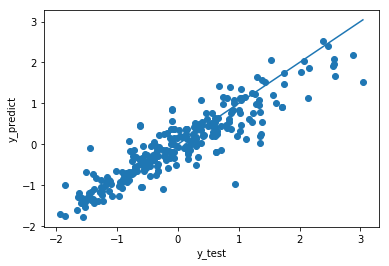

In [538]:
fig, ax = plt.subplots()
ax.scatter(y_test_scale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [539]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
SVR_Metrics1 = pd.DataFrame({'Model':['SVR'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
SVR_Metrics1=SVR_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
SVR_Metrics1

Model performance range with 95 percentage confidence level is : 89.863%  (4.566%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   SVR  0.415405        0.827439                 0.826227

In [540]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,SVR_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 89.863%  (4.566%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227

In [541]:
# Inference from the accuracy metrics:
# ------------------------------------
# SVR Performance is better
# The optimised model of SVR is
# SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
#    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

In [542]:
Comparison_Table3

Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227

## KNN Regressor

In [543]:
X_train_stdscale = preprocessing.scale(X_train)
X_test_stdscale = preprocessing.scale(X_test)
y_train_stdscale = preprocessing.scale(y_train)
y_test_stdscale = preprocessing.scale(y_test)

In [544]:
param_grid={'n_neighbors':(1,2,3,4,5,6,7,8,9,10), 
            'metric':('euclidean', 'manhattan', 'chebyshev','minkowski')}
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train_stdscale,y_train_stdscale)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [545]:
gs=GridSearchCV(KNN_model,param_grid,cv=10)
gs.fit(X_train_stdscale,y_train_stdscale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'),
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [546]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'metric': 'euclidean', 'n_neighbors': 4}
The model which produce best score is 0.7756549728643638
Standard deviation for the best model 0.04955574599215488


In [547]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 77.565%
 Standard Deviation : 4.95557%


In [548]:
KNN_optimised_model = gs.best_estimator_
KNN_optimised_model.fit(X_train_stdscale,y_train_stdscale)
y_pred = KNN_optimised_model.predict(X_test_stdscale)

In [549]:
print("The accuracy score for training set is %12.16f" %KNN_optimised_model.score(X_train_stdscale,y_train_stdscale))
print("The accuracy score for testing set is %12.16f" %KNN_optimised_model.score(X_test_stdscale,y_test_stdscale))

The accuracy score for training set is 0.8842160063483796
The accuracy score for testing set is 0.6644867234534153


In [550]:
# r square value for testing
r_square_for_testing=KNN_optimised_model.score(X_test_stdscale,y_test_stdscale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_stdscale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6644867234534153
The adjusted R Square value for testing set is 0.6621310635378425
The RMSE value for testing set is 0.5792350788294721


Text(0, 0.5, 'y_predict')

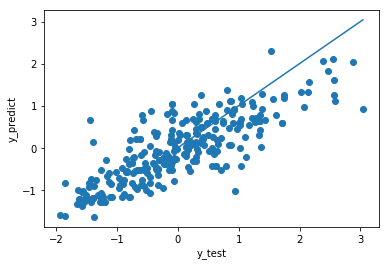

In [551]:
fig, ax = plt.subplots()
ax.scatter(y_test_stdscale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [552]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
KNN_Metrics1 = pd.DataFrame({'Model':['KNN'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
KNN_Metrics1=KNN_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
KNN_Metrics1

Model performance range with 95 percentage confidence level is : 77.565%  (9.713%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   KNN  0.579235        0.664487                 0.662131

In [553]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,KNN_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 77.565%  (9.713%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131

In [554]:
# Inference from the accuracy metrics:
# ------------------------------------
# KNN Performance is very poor.
# It is observered that KNN Performs well for lower strength and poor at higher strength
# The optimised model of KNN is
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
#                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
#                    weights='uniform'

## Decision Tree Regressor

In [555]:
param_grid={'criterion':('mse','friedman_mse','mae'), 
             'max_depth':(3,6,9,12),
             'min_samples_split':(2,50,100,150,200)}
DT_model=DecisionTreeRegressor(random_state=1)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [556]:
gs=GridSearchCV(DT_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': (3, 6, 9, 12),
                         'min_samples_split': (2, 50, 100, 150, 200)},
             pre_dis

In [557]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 12, 'min_samples_split': 2}
The model which produce best score is 0.8076255730951611
Standard deviation for the best model 0.05379595126767984


In [558]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 80.763%
 Standard Deviation : 5.37960%


In [559]:
DT_optimised_model = gs.best_estimator_
DT_optimised_model.fit(X_train,y_train)
y_pred = DT_optimised_model.predict(X_test)

In [560]:
print("The accuracy score for training set is %12.16f" %DT_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %DT_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9974470343452673
The accuracy score for testing set is 0.7582299713488746


In [561]:
# r square value for testing
r_square_for_testing=DT_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7582299713488746
The adjusted R Square value for testing set is 0.7565324887003713
The RMSE value for testing set is 7.5906785961222534


Text(0, 0.5, 'y_predict')

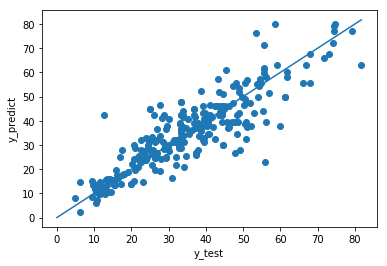

In [562]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [563]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
DecisionTree_Metrics1 = pd.DataFrame({'Model':['Decision Tree'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
DecisionTree_Metrics1=DecisionTree_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
DecisionTree_Metrics1

Model performance range with 95 percentage confidence level is : 80.763%  (10.544%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Decision Tree  7.590679         0.75823                 0.756532

In [564]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,DecisionTree_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 80.763%  (10.544%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532

In [565]:
# Inference from the accuracy metrics:
# ------------------------------------
# Decision Tree Regressor Performance is better than KNN but poorer than SVR.
# The optimised model of Decision Tree is
# DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
#                      max_leaf_nodes=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      presort=False, random_state=1, splitter='best')

## Bagging Regressor

In [566]:
param_grid={'n_estimators':(25,50,100,150,200)}
Bagging_model=BaggingRegressor(max_samples=0.7,oob_score=True, random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=0.7, n_estimators=10,
                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
                 warm_start=False)

In [567]:
gs=GridSearchCV(Bagging_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=0.7,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=True, random_state=1,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [568]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'n_estimators': 50}
The model which produce best score is 0.8906111295854617
Standard deviation for the best model 0.037863246833193136


In [569]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.061%
 Standard Deviation : 3.78632%


In [570]:
Bagging_optimised_model = gs.best_estimator_
Bagging_optimised_model.fit(X_train,y_train)
y_pred = Bagging_optimised_model.predict(X_test)

In [571]:
print("The accuracy score for training set is %12.16f" %Bagging_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Bagging_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9717118194029422
The accuracy score for testing set is 0.8453170345258473


In [572]:
# r square value for testing
r_square_for_testing=Bagging_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8453170345258473
The adjusted R Square value for testing set is 0.8442309956509033
The RMSE value for testing set is 6.0715645516890584


Text(0, 0.5, 'y_predict')

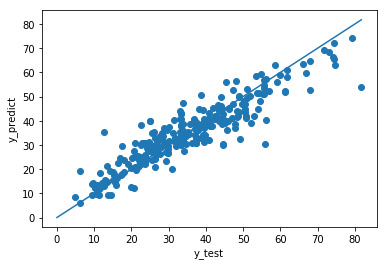

In [573]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [574]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Bagging_Metrics1 = pd.DataFrame({'Model':['Bagging'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Bagging_Metrics1=Bagging_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Bagging_Metrics1

Model performance range with 95 percentage confidence level is : 89.061%  (7.421%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Bagging  6.071565        0.845317                 0.844231

In [575]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Bagging_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 89.061%  (7.421%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   
0                                   Bagging   6.071565        0.845317   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532  
0                 0.844231

In [576]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance
# The optimised model of Bagging Regressor is
# BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
#                 max_features=1.0, max_samples=0.7, n_estimators=50,
#                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
#                 warm_start=False)

## Adaboost Regressor

In [577]:
param_grid={'n_estimators':(25,50,100,150,200),
           'learning_rate':(1.0,0.8,0.6,0.4)}
Adaboost_model=AdaBoostRegressor(random_state=1)
Adaboost_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [578]:
gs=GridSearchCV(Adaboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': (1.0, 0.8, 0.6, 0.4),
                         'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [579]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'learning_rate': 1.0, 'n_estimators': 150}
The model which produce best score is 0.7962232377478757
Standard deviation for the best model 0.04097652121114378


In [580]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 79.622%
 Standard Deviation : 4.09765%


In [581]:
Adaboost_optimised_model = gs.best_estimator_
Adaboost_optimised_model.fit(X_train,y_train)
y_pred = Adaboost_optimised_model.predict(X_test)

In [582]:
print("The accuracy score for training set is %12.16f" %Adaboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Adaboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.8421930160002133
The accuracy score for testing set is 0.7444389066495328


In [583]:
# r square value for testing
r_square_for_testing=Adaboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7444389066495328
The adjusted R Square value for testing set is 0.7426445960643240
The RMSE value for testing set is 7.8041703513795921


Text(0, 0.5, 'y_predict')

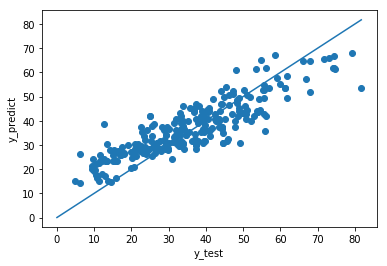

In [584]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [585]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Adaboost_Metrics1 = pd.DataFrame({'Model':['Adaboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Adaboost_Metrics1=Adaboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Adaboost_Metrics1

Model performance range with 95 percentage confidence level is : 79.622%  (8.031%)


Model     RMSE  R Square Value  Adjusted R Square Value
0  Adaboost  7.80417        0.744439                 0.742645

In [586]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Adaboost_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 79.622%  (8.031%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   
0                                   Bagging   6.071565        0.845317   
0                                  Adaboost   7.804170        0.744439   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532  
0                 0.844231  
0                 0.742645

In [587]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the better performance than Ada Boosting
# The optimised model of AdaBoost Regressor is
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                  n_estimators=150, random_state=1)

## Gradient Boosting Regressor

In [588]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('friedman_mse', 'mse'),
            'max_depth' : (3,5,7,9)}
Gradientboost_model=GradientBoostingRegressor(random_state=1)
Gradientboost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [589]:
gs=GridSearchCV(Gradientboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [590]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'friedman_mse', 'max_depth': 3, 'n_estimators': 200}
The model which produce best score is 0.9101192781999748
Standard deviation for the best model 0.03141902685099813


In [591]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 91.012%
 Standard Deviation : 3.14190%


In [592]:
Gradientboost_optimised_model = gs.best_estimator_
Gradientboost_optimised_model.fit(X_train,y_train)
y_pred = Gradientboost_optimised_model.predict(X_test)

In [593]:
print("The accuracy score for training set is %12.16f" %Gradientboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Gradientboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9767963737834877
The accuracy score for testing set is 0.8822469237586450


In [594]:
# r square value for testing
r_square_for_testing=Gradientboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8822469237586450
The adjusted R Square value for testing set is 0.8814201719695883
The RMSE value for testing set is 5.2974333683205819


Text(0, 0.5, 'y_predict')

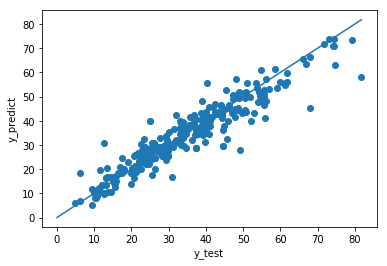

In [595]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [596]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Gradientboost_Metrics1 = pd.DataFrame({'Model':['Gradientboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Gradientboost_Metrics1=Gradientboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Gradientboost_Metrics1

Model performance range with 95 percentage confidence level is : 91.012%  (6.158%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Gradientboost  5.297433        0.882247                  0.88142

In [597]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,Gradientboost_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 91.012%  (6.158%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   
0                                   Bagging   6.071565        0.845317   
0                                  Adaboost   7.804170        0.744439   
0                             Gradientboost   5.297433        0.882247   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532  
0                 0.844231  
0                 0.742645  
0                 0.881420

In [598]:
# Inference from the accuracy metrics:
# ------------------------------------
# Gradient Boosting Performance is better
# The optimised model of Gradient Boosting Regressor is
# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                          learning_rate=0.1, loss='ls', max_depth=3,
#                          max_features=None, max_leaf_nodes=None,
#                          min_impurity_decrease=0.0, min_impurity_split=None,
#                          min_samples_leaf=1, min_samples_split=2,
#                          min_weight_fraction_leaf=0.0, n_estimators=200,
#                          n_iter_no_change=None, presort='auto', random_state=1,
#                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                          verbose=0, warm_start=False)

## Random Forest Regressor

In [599]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('mae', 'mse'),
            'max_depth' : (3,5,7,9)}
RandomForest_model=RandomForestRegressor(random_state=1)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [600]:
gs=GridSearchCV(RandomForest_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mae', 'mse'), 'max_dep

In [601]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 9, 'n_estimators': 200}
The model which produce best score is 0.8901852497785943
Standard deviation for the best model 0.040779427833423726


In [602]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 89.019%
 Standard Deviation : 4.07794%


In [603]:
RandomForest_optimised_model = gs.best_estimator_
RandomForest_optimised_model.fit(X_train,y_train)
y_pred = RandomForest_optimised_model.predict(X_test)

In [604]:
print("The accuracy score for training set is %12.16f" %RandomForest_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %RandomForest_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9767523808677457
The accuracy score for testing set is 0.8523297001280948


In [605]:
# r square value for testing
r_square_for_testing=RandomForest_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8523297001280948
The adjusted R Square value for testing set is 0.8512928976214716
The RMSE value for testing set is 5.9323388607660714


Text(0, 0.5, 'y_predict')

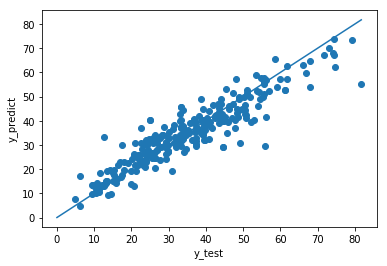

In [606]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [607]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
RandomForest_Metrics1 = pd.DataFrame({'Model':['Random Forest'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
RandomForest_Metrics1=RandomForest_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
RandomForest_Metrics1

Model performance range with 95 percentage confidence level is : 89.019%  (7.993%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Random Forest  5.932339         0.85233                 0.851293

In [608]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table3=pd.concat([Comparison_Table3,RandomForest_Metrics1])
Comparison_Table3

Model performance range with 95 percentage confidence level is : 89.019%  (7.993%)


Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   
0                                   Bagging   6.071565        0.845317   
0                                  Adaboost   7.804170        0.744439   
0                             Gradientboost   5.297433        0.882247   
0                             Random Forest   5.932339        0.852330   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532  
0                 0.844231  
0                 0.742645  
0                 0.881420  
0                 0.851293

In [609]:
# Inference from the accuracy metrics:
# ------------------------------------
# Random Forest Regressor has poorer Performance than Gradient Boosting Regressor
# The optimised model of Random Forest RegressorGradient Boosting Regressor is
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
#                      max_features='auto', max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=200,
#                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
#                      warm_start=False)

In [610]:
# Summary of Iteration 3:
# -------------------------
# Duplicate Data were removed 
# Outliers were not treated
# Gradient Boost regressor has the best performance with 88.22 Score in training dataset
# The model has the performance range  91.012%  (6.158%) with 95% confidence level

In [611]:
# Comparing Iteration 1 and 3:
# -------------------------------------------------------
# Iteration 1: Removing Duplicate data
#              Outliers not treated
#              Without feature engineering
# Iteration 3: Removing Duplicate data
#              Outliers not treated
#              With feature engineering
# ---------------------------------------------------------
# The performance at Iteration 1 is better than Iteration 3


In [612]:
Comparison_Table1

Model       RMSE  R Square Value  \
0                 Linear Regression  10.316849        0.541961   
0  Polynomial Regression - degree 3   8.322321        0.701944   
0                               SVR   0.433043        0.812473   
0                               KNN   0.631126        0.601680   
0                     Decision Tree   7.124025        0.781597   
0                           Bagging   5.158369        0.885493   
0                          Adaboost   7.359663        0.766910   
0                     Gradientboost   4.475665        0.913797   
0                     Random Forest   5.123526        0.887034   

   Adjusted R Square Value  
0                 0.538282  
0                 0.699550  
0                 0.810967  
0                 0.598480  
0                 0.779842  
0                 0.884573  
0                 0.765038  
0                 0.913104  
0                 0.886127

In [613]:
Comparison_Table2

Model      RMSE  R Square Value  \
0                         Linear Regression  8.589603        0.690410   
0  Polynomial Regression - degree 2 & ridge  8.182952        0.719029   
0                                       SVR  0.415405        0.827439   
0                                       KNN  0.579235        0.664487   
0                             Decision Tree  7.590679        0.758230   
0                                   Bagging  6.071565        0.845317   
0                                  Adaboost  7.804170        0.744439   
0                             Gradientboost  5.297433        0.882247   
0                             Random Forest  5.932339        0.852330   

   Adjusted R Square Value  
0                 0.687679  
0                 0.716551  
0                 0.825917  
0                 0.661527  
0                 0.756097  
0                 0.843953  
0                 0.742185  
0                 0.881208  
0                 0.851027

In [614]:
Comparison_Table3

Model       RMSE  R Square Value  \
0                         Linear Regression  10.806366        0.497464   
0  Polynomial Regression - degree 3 & ridge   8.656433        0.677532   
0                                       SVR   0.415405        0.827439   
0                                       KNN   0.579235        0.664487   
0                             Decision Tree   7.590679        0.758230   
0                                   Bagging   6.071565        0.845317   
0                                  Adaboost   7.804170        0.744439   
0                             Gradientboost   5.297433        0.882247   
0                             Random Forest   5.932339        0.852330   

   Adjusted R Square Value  
0                 0.493935  
0                 0.675268  
0                 0.826227  
0                 0.662131  
0                 0.756532  
0                 0.844231  
0                 0.742645  
0                 0.881420  
0                 0.851293

# Iteration 4

1. Removing duplicate data
2. Outliers were observed and removed
3. Data preprocessing should be done to convert the data into ratios (As per domain experts Suggesion)

In [615]:
# Removing Duplicate Data
concrete_Iter4=concrete_df.copy(deep=True)
concrete_Iter4.drop_duplicates(keep='first', inplace=True) # To remove 25 duplicate datapoints in the dataset
concrete_Iter4.shape

(1005, 9)

In [616]:
# Feature Engineering
# -------------------
# Since the concrete strength depends on the mixture of water,cement,fineagg and courseagg
# The ratio of all plays a major role in predicting the strength
# So, at each datapoints all the independent attributes (except age) is divided by the value of cement(kg)

In [617]:
# Converting all the attributes 'cement', 'slage', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg' into ratios
concrete_Iter4['cement/cement']=concrete_Iter4['cement']/concrete_Iter4['cement']
concrete_Iter4['slag/cement']=concrete_Iter4['slag']/concrete_Iter4['cement']
concrete_Iter4['ash/cement']=concrete_Iter4['ash']/concrete_Iter4['cement']
concrete_Iter4['water/cement']=concrete_Iter4['water']/concrete_Iter4['cement']
concrete_Iter4['superplastic/cement']=concrete_Iter4['superplastic']/concrete_Iter4['cement']
concrete_Iter4['coarseagg/cement']=concrete_Iter4['coarseagg']/concrete_Iter4['cement']
concrete_Iter4['fineagg/cement']=concrete_Iter4['fineagg']/concrete_Iter4['cement']
# Dropping down the columns 'cement', 'slag', 'ash', 'water', 'superplatic', 'coarseagg', 'fineagg'
concrete_Iter4.drop(['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'], axis=1, inplace=True)
# Rearranging the columns
concrete_Iter4 = concrete_Iter4[['cement/cement', 'slag/cement', 'ash/cement', 'water/cement', 'superplastic/cement', 'coarseagg/cement', 'fineagg/cement', 'age', 'strength']]
#Dropping down the column 'cement/cement' since all the row values have the ratio 1
concrete_Iter4.drop(['cement/cement'], axis=1, inplace=True)
concrete_Iter4.head()

slag/cement  ash/cement  water/cement  superplastic/cement  \
0     1.500354    0.000000      1.440198             0.000000   
1     0.249852    0.735938      0.937241             0.063943   
2     0.000000    0.382800      0.749600             0.022000   
3     0.428571    0.000000      0.857143             0.000000   
4     1.184755    0.000000      1.248708             0.058786   

   coarseagg/cement  fineagg/cement  age  strength  
0          6.877565        5.297240   28     29.89  
1          6.399053        4.714032   14     23.51  
2          3.827600        3.444800   28     29.22  
3          3.503759        2.518797   28     45.85  
4          6.766150        4.500646   28     18.29

In [618]:
concrete_Iter4.shape

(1005, 8)

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

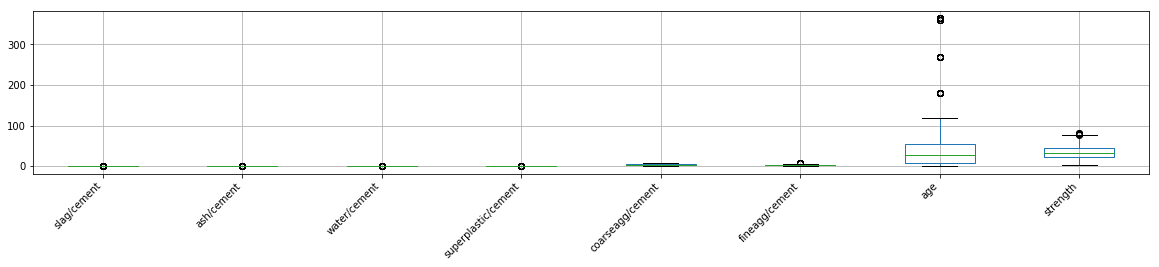

In [619]:
# Observing the outliers using box plot
concrete_Iter4.boxplot(figsize=(20,3))
plt.xticks(rotation=45,ha="right")

In [620]:
# Inference from the box plot:
# --------------------------------------------------------------------------------------------------------
# Outliers were observed in the attributes 'slag', 'ash', 'water', 'superplastic', 'fineagg', 'age' and 'strength'
# --------------------------------------------------------------------------------------------------------
# Oultliers will be observed and removed from the above attributes (as per domain expert suggestion)
# Replacing the extreme values with mean or mean+2*std may lead to poor performance
# Since the concrete strength depends on the ratios of cement:fineagg:courseagg:water

In [621]:
concrete_Iter4_copy=concrete_Iter4.copy(deep=True)

In [622]:
# Observing the Outliers of 'slag/cement' and replacing with nan
median_slag=concrete_Iter4['slag/cement'].median() # Median of 'slag/cement' attribute
std_slag=2.5*(concrete_Iter4['slag/cement'].std()) # Calculating 2.5*std deviation of 'slag/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['slag/cement']-median_slag).abs()>std_slag, 'slag/cement'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

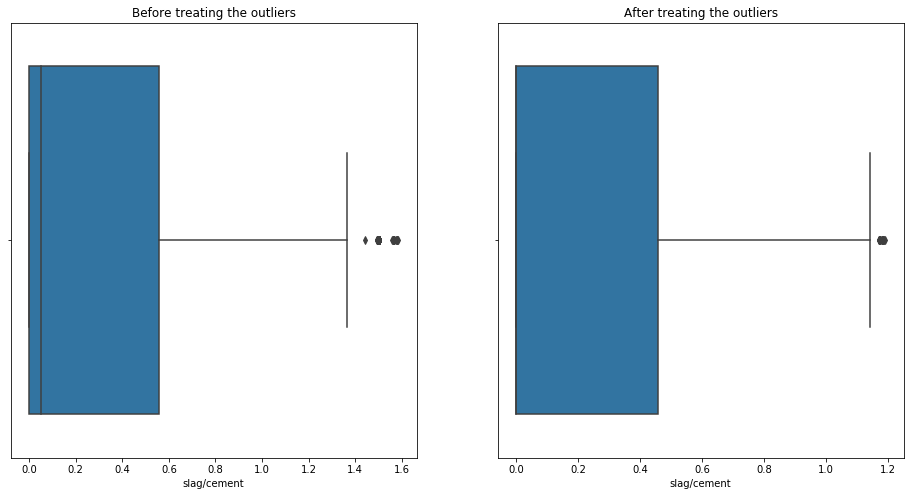

In [623]:
# Boxplot for 'slag/cement' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['slag/cement'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['slag/cement'])
plt.title('After treating the outliers')

In [624]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement              0
water/cement            0
superplastic/cement     0
coarseagg/cement        0
fineagg/cement          0
age                     0
strength                0
dtype: int64

In [625]:
# Observing the Outliers of 'ash/cement' and replacing with nan
median_ash=concrete_Iter4['ash/cement'].median() # Median of 'ash/cement' attribute
std_ash=2.5*(concrete_Iter4['ash/cement'].std()) # Calculating 2.5*std deviation of 'ash/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['ash/cement']-median_ash).abs()>std_ash, 'ash/cement'] = np.nan # Locating the row containing outliers and replacing with nan

Text(0.5, 1.0, 'After treating the outliers')

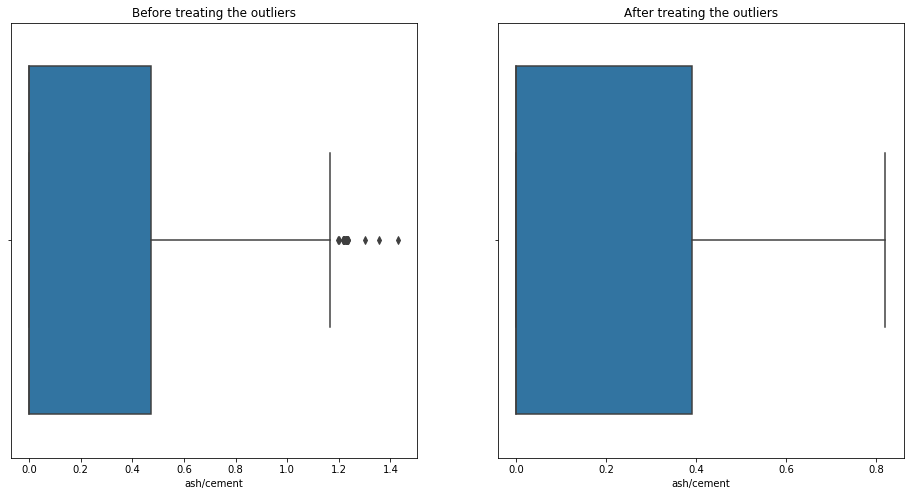

In [626]:
# Boxplot for 'ash/cement' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['ash/cement'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['ash/cement'])
plt.title('After treating the outliers')

In [627]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement             97
water/cement            0
superplastic/cement     0
coarseagg/cement        0
fineagg/cement          0
age                     0
strength                0
dtype: int64

In [628]:
# Observing the Outliers of 'water/cement' and replacing with nan
median_water=concrete_Iter4['water/cement'].median() # Median of 'water/cement' attribute
std_water=2.5*(concrete_Iter4['water/cement'].std()) # Calculating 2.5*std deviation of 'water/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['water/cement']-median_water).abs()>std_water, 'water/cement'] = np.nan # Locating the row containing outliers and replacing with

Text(0.5, 1.0, 'After treating the outliers')

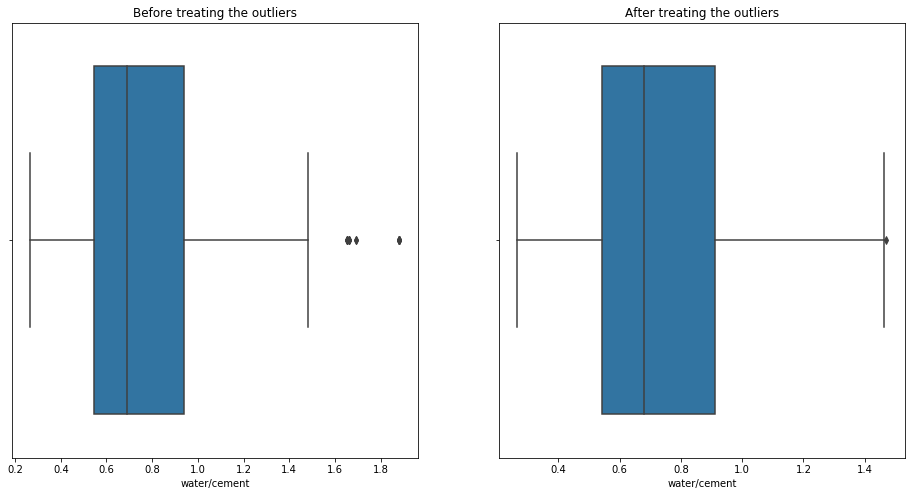

In [629]:
# Boxplot for 'fineagg' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['water/cement'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['water/cement'])
plt.title('After treating the outliers')

In [630]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement             97
water/cement           20
superplastic/cement     0
coarseagg/cement        0
fineagg/cement          0
age                     0
strength                0
dtype: int64

In [631]:
# Observing the Outliers of 'superplastic/cement' and replacing with nan
median_sp=concrete_Iter4['superplastic/cement'].median() # Median of 'superplastic/cement' attribute
std_sp=2.5*(concrete_Iter4['superplastic/cement'].std()) # Calculating 2.5*std deviation of 'superplastic/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['superplastic/cement']-median_sp).abs()>std_sp, 'superplastic/cement'] = np.nan # Locating the row containing outliers and replacing 

Text(0.5, 1.0, 'After treating the outliers')

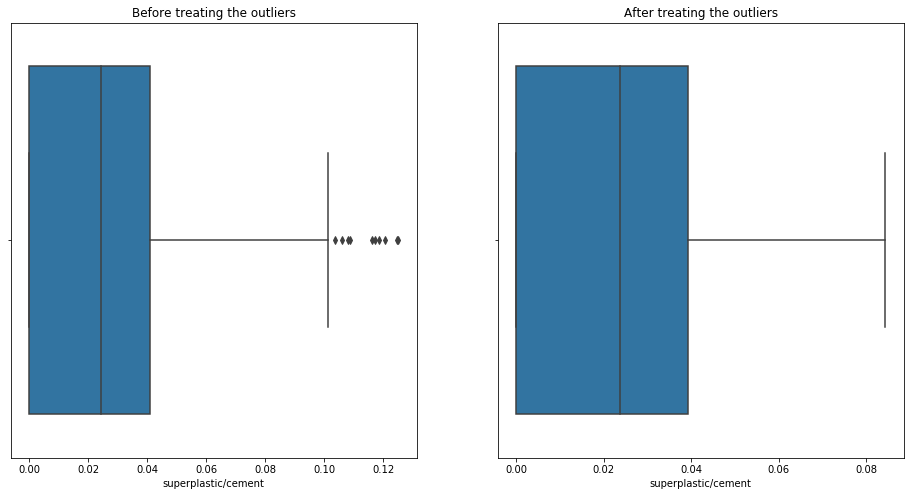

In [632]:
# Boxplot for 'fineagg' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['superplastic/cement'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['superplastic/cement'])
plt.title('After treating the outliers')

In [633]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement             97
water/cement           20
superplastic/cement    15
coarseagg/cement        0
fineagg/cement          0
age                     0
strength                0
dtype: int64

In [634]:
# Observing the Outliers of 'fineagg/cement' and replacing with nan
median_fa=concrete_Iter4['fineagg/cement'].median() # Median of 'water/cement' attribute
std_fa=2.5*(concrete_Iter4['fineagg/cement'].std()) # Calculating 2.5*std deviation of 'fineagg/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['fineagg/cement']-median_fa).abs()>std_fa, 'fineagg/cement'] = np.nan # Locating the row containing outliers and replacing 

Text(0.5, 1.0, 'After treating the outliers')

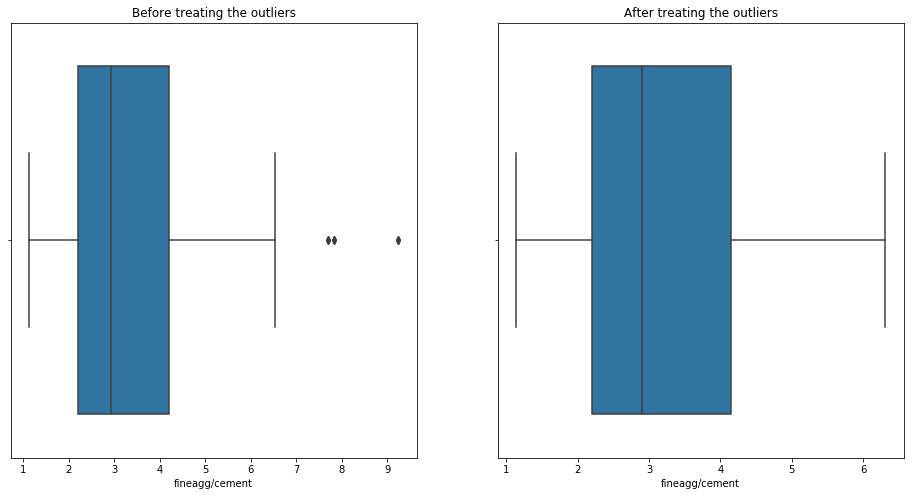

In [635]:
# Boxplot for 'fineagg' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['fineagg/cement'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['fineagg/cement'])
plt.title('After treating the outliers')

In [636]:
# Observing the Outliers of 'age' and replacing with nan
median_age=concrete_Iter4['age'].median() # Median of 'water/cement' attribute
std_age=2.5*(concrete_Iter4['age'].std()) # Calculating 2.5*std deviation of 'fineagg/cement' attribute
concrete_Iter4.loc[(concrete_Iter4['age']-median_age).abs()>std_age, 'age'] = np.nan # Locating the row containing outliers and replacing 

Text(0.5, 1.0, 'After treating the outliers')

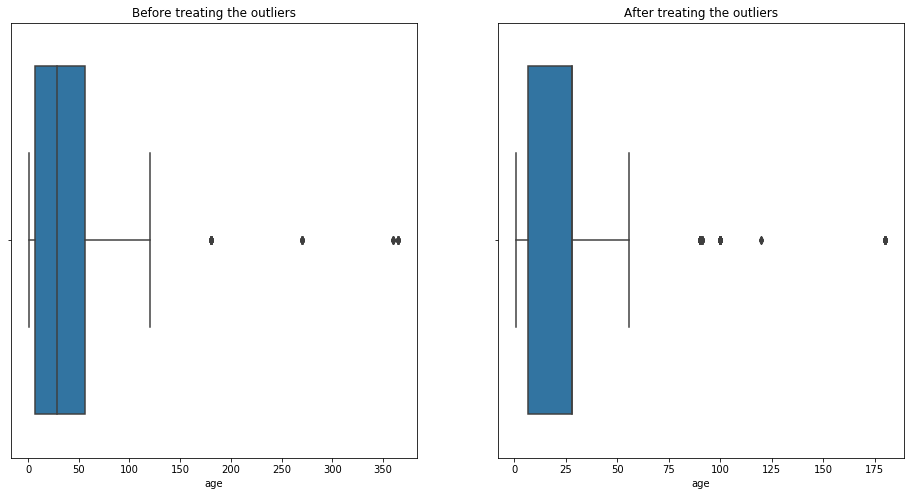

In [637]:
# Boxplot for 'age' before and after treating the outliers
f, axes = plt.subplots(1, 2,figsize=(16, 8), sharex=True)
subplot(1,2,1)
sns.boxplot(concrete_Iter4_copy['age'])
plt.title('Before treating the outliers')
subplot(1,2,2)
sns.boxplot(concrete_Iter4['age'])
plt.title('After treating the outliers')

In [638]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement             97
water/cement           20
superplastic/cement    15
coarseagg/cement        0
fineagg/cement         16
age                    33
strength                0
dtype: int64

In [639]:
# Outliers of  the attribute 'strength' is kept as it is, since it is a target variable.

In [640]:
concrete_Iter4.isnull().sum()

slag/cement            83
ash/cement             97
water/cement           20
superplastic/cement    15
coarseagg/cement        0
fineagg/cement         16
age                    33
strength                0
dtype: int64

In [641]:
concrete_Iter4=concrete_Iter4.dropna(axis=0) # Removing the row containing Nan
concrete_Iter4.isnull().sum()

slag/cement            0
ash/cement             0
water/cement           0
superplastic/cement    0
coarseagg/cement       0
fineagg/cement         0
age                    0
strength               0
dtype: int64

In [642]:
concrete_Iter4_backup1=concrete_Iter4.copy(deep=True)
concrete_Iter4_backup2=concrete_Iter4.copy(deep=True)

In [643]:
concrete_Iter4_backup1.head()

slag/cement  ash/cement  water/cement  superplastic/cement  \
1     0.249852    0.735938      0.937241             0.063943   
2     0.000000    0.382800      0.749600             0.022000   
3     0.428571    0.000000      0.857143             0.000000   
4     1.184755    0.000000      1.248708             0.058786   
5     0.000000    0.000000      0.752941             0.000000   

   coarseagg/cement  fineagg/cement   age  strength  
1          6.399053        4.714032  14.0     23.51  
2          3.827600        3.444800  28.0     29.22  
3          3.503759        2.518797  28.0     45.85  
4          6.766150        4.500646  28.0     18.29  
5          3.489412        3.705882  90.0     21.86

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

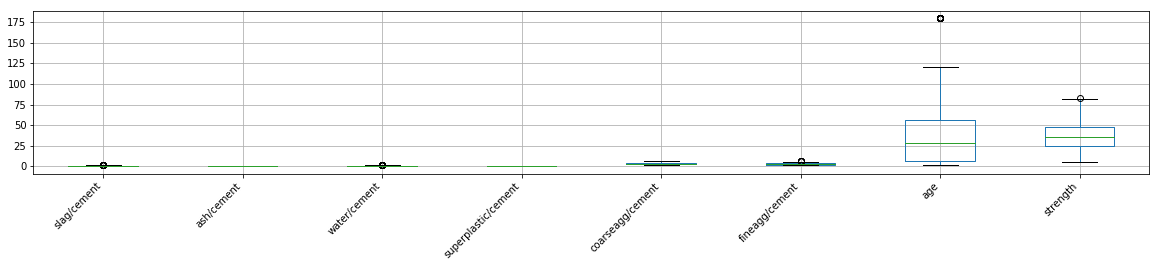

In [644]:
# Observing using box plot after treating the outliers
concrete_Iter4.boxplot(figsize=(20,3))
plt.xticks(rotation=45,ha="right")

In [645]:
# Inference from the box plot:
# ---------------------------
# Outliers were removed and new outliers were observed

In [646]:
concrete_Iter4.head()

slag/cement  ash/cement  water/cement  superplastic/cement  \
1     0.249852    0.735938      0.937241             0.063943   
2     0.000000    0.382800      0.749600             0.022000   
3     0.428571    0.000000      0.857143             0.000000   
4     1.184755    0.000000      1.248708             0.058786   
5     0.000000    0.000000      0.752941             0.000000   

   coarseagg/cement  fineagg/cement   age  strength  
1          6.399053        4.714032  14.0     23.51  
2          3.827600        3.444800  28.0     29.22  
3          3.503759        2.518797  28.0     45.85  
4          6.766150        4.500646  28.0     18.29  
5          3.489412        3.705882  90.0     21.86

In [647]:
concrete_Iter4.shape

(797, 8)

In [648]:
X=concrete_Iter4.drop('strength',axis=1) # Independent Attribute
y=concrete_Iter4.pop('strength') # Dependent Attribute

In [649]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1) # Splitting 70:30 training and test set ratios
num_folds=10
seed=7

## Using Linear Regression

In [650]:
kfold=KFold(n_splits=num_folds,random_state=seed)
LR_model=LinearRegression()
results=cross_val_score(LR_model,X_train, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.61093026 0.50478945 0.60419189 0.72489998 0.7439498  0.72343451
 0.69908691 0.66826876 0.71694299 0.56522255]


In [651]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : 65.617%
 Standard Deviation : 7.653%


In [652]:
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

In [653]:
print("The accuracy score for training set is %12.16f" %LR_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %LR_model.score(X_test,y_test))

The accuracy score for training set is 0.6739992630299807
The accuracy score for testing set is 0.6779338569102948


In [654]:
# r square value for testing
r_square_for_testing=LR_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6779338569102948
The adjusted R Square value for testing set is 0.6750764893543659
The RMSE value for testing set is 8.8873455184510366


Text(0, 0.5, 'y_predict')

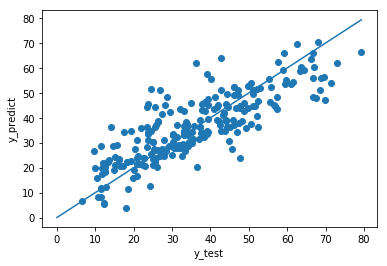

In [655]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')


In [656]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Linear_Regression_Metrics1 = pd.DataFrame({'Model':['Linear Regression'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Linear_Regression_Metrics1=Linear_Regression_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Linear_Regression_Metrics1

Model performance range with 95 percentage confidence level is : 65.617%  (15.000%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Linear Regression  8.887346        0.677934                 0.675076

## Using Polynomial Regression (degree=2)

In [657]:
poly=PolynomialFeatures(degree=2, interaction_only=True) #Considering Polynomial degree as 2
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

In [658]:
print(X_train.shape)
print(X_train_2.shape)

(557, 7)
(557, 29)


In [659]:
# Inference from the shape ofter fitting the transform
# ----------------------------------------------------------------
# The total no.of independent attributes is increased from 8 to 37

In [660]:
kfold=KFold(n_splits=num_folds,random_state=seed)
PR2_model=linear_model.LinearRegression()
results=cross_val_score(PR2_model,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[-1.3607633   0.54471368 -0.02151471  0.43096555 -4.9676182   0.35204325
  0.72924064  0.7279256   0.82627497 -0.34343572]


In [661]:
print(' Mean Accuracy      : %.3f%%'  % (results.mean()*100.0))
print(' Standard Deviation : %.3f%%'  % (results.std()*100.0))

 Mean Accuracy      : -30.822%
 Standard Deviation : 167.476%


In [662]:
PR2_model.fit(X_train_2,y_train)
y_pred = PR2_model.predict(X_test_2)

In [663]:
print("The accuracy score for training set is %12.16f" %PR2_model.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %PR2_model.score(X_test_2,y_test))

The accuracy score for training set is 0.4426479293468473
The accuracy score for testing set is 0.4289072402133440


In [664]:
# r square value for testing
r_square_for_testing=PR2_model.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.4289072402133440
The adjusted R Square value for testing set is 0.4238405110390645
The RMSE value for testing set is 11.8345801631872796


Text(0, 0.5, 'y_predict')

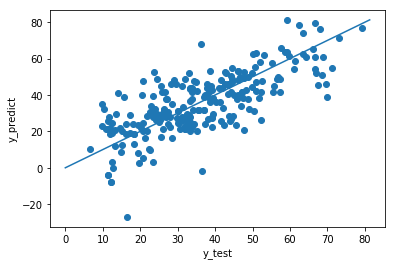

In [665]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [666]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))


# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2 = pd.DataFrame({'Model':['Polynomial Regression - degree 2'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2=Polynomial_Regression_Metrics1_degree2[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2

Model performance range with 95 percentage confidence level is : -30.822%  (328.252%)


Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2  11.83458        0.428907   

   Adjusted R Square Value  
0                 0.423841

In [667]:
Comparison_Table4=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2])
Comparison_Table4

Model       RMSE  R Square Value  \
0                 Linear Regression   8.887346        0.677934   
0  Polynomial Regression - degree 2  11.834580        0.428907   

   Adjusted R Square Value  
0                 0.675076  
0                 0.423841

In [668]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=2 performs poorer than linear regression
# Trying to improve the performance with Ridge and Lasso Regression for Polynomial degree =2

## Using Polynomial Regression (degree=2)  & Ridge Regression

In [669]:
kfold=KFold(n_splits=num_folds,random_state=seed)
ridge=Ridge(alpha=.3)
results=cross_val_score(ridge,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.67590752 0.59139684 0.64484254 0.71154893 0.81430447 0.71859981
 0.73082263 0.702363   0.81917285 0.65541081]


In [670]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 70.644%  (13.249%)


In [671]:
ridge.fit(X_train_2,y_train)
print('Ridge model:', (ridge.coef_))

Ridge model: [  0.          23.30466662  19.87920618 -40.27448647   7.63632157
  -4.61260605  -8.7436482    0.32825043  -5.17315957   7.19305271
  -1.52265229  -4.52184576   2.09047223   0.34388439   1.92530684
  -3.85390957  -5.88637638   4.59395957   0.30954597   1.1043294
   2.78813943  -2.43468358  -0.52584248   9.78520657   1.76031715
   0.99255183   1.28218943  -0.06840793   0.1284575 ]


In [672]:
y_pred = ridge.predict(X_test_2)

In [673]:
print("The accuracy score for training set is %12.16f" %ridge.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %ridge.score(X_test_2,y_test))

The accuracy score for training set is 0.7380901273873699
The accuracy score for testing set is 0.7027323777546644


In [674]:
# r square value for testing
r_square_for_testing=ridge.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7027323777546644
The adjusted R Square value for testing set is 0.7000950224242242
The RMSE value for testing set is 8.5383378118121165


Text(0, 0.5, 'y_predict')

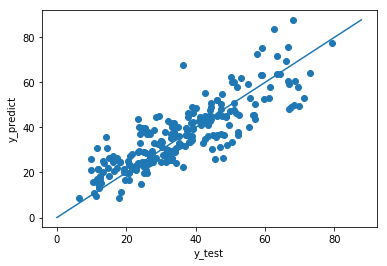

In [675]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [676]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_ridge = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & ridge'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_ridge=Polynomial_Regression_Metrics1_degree2_ridge[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_ridge

Model      RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   

   Adjusted R Square Value  
0                 0.700095

In [677]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,Polynomial_Regression_Metrics1_degree2_ridge])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 70.644%  (13.249%)


Model       RMSE  R Square Value  \
0                         Linear Regression   8.887346        0.677934   
0          Polynomial Regression - degree 2  11.834580        0.428907   
0  Polynomial Regression - degree 2 & ridge   8.538338        0.702732   

   Adjusted R Square Value  
0                 0.675076  
0                 0.423841  
0                 0.700095

## Using Polynomial Regression (degree=2)  & Lasso Regression

In [678]:
kfold=KFold(n_splits=num_folds,random_state=seed)
lasso=Lasso(alpha=.3,max_iter=100000)
results=cross_val_score(lasso,X_train_2, y_train, cv=kfold)
print('The score value for all the crossfolds ')
print(results)

The score value for all the crossfolds 
[0.6356197  0.61733119 0.59819609 0.64890549 0.76349501 0.69416185
 0.70167806 0.6482048  0.76724773 0.65575547]


In [679]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 67.306%  (10.722%)


In [680]:
lasso.fit(X_train_2,y_train)
print('Lasso model:', (lasso.coef_))

Lasso model: [ 0.          0.          0.         -0.          0.         -0.59730057
 -2.8733703   0.39295257 -0.          0.          0.          1.50751712
  2.12654909  0.44261386  0.          0.          1.93698141  0.
  0.34855873  0.         -5.22301756 -0.         -0.76895864  0.
  0.          1.53903898 -0.         -0.04542181  0.1218415 ]


In [681]:
y_pred = lasso.predict(X_test_2)

In [682]:
print("The accuracy score for training set is %12.16f" %lasso.score(X_train_2,y_train))
print("The accuracy score for testing set is %12.16f" %lasso.score(X_test_2,y_test))

The accuracy score for training set is 0.6958621932264017
The accuracy score for testing set is 0.6636097883583348


In [683]:
# r square value for testing
r_square_for_testing=lasso.score(X_test_2,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.6636097883583348
The adjusted R Square value for testing set is 0.6606253378114506
The RMSE value for testing set is 9.0828303750164530


Text(0, 0.5, 'y_predict')

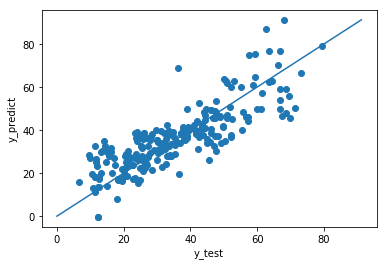

In [684]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [685]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Model performance range with 95 percentage confidence level is : 67.306%  (10.722%)


In [686]:
# Calculating Performance Parameters for the test data
Polynomial_Regression_Metrics1_degree2_Lasso = pd.DataFrame({'Model':['Polynomial Regression - degree 2 & lasso'], 
                                            'RMSE': rmse,
                                            'R Square Value': r_square_for_testing, 
                                            'Adjusted R Square Value' : adjusted_r_squared})
Polynomial_Regression_Metrics1_degree2_Lasso=Polynomial_Regression_Metrics1_degree2_Lasso[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Polynomial_Regression_Metrics1_degree2_Lasso

Model     RMSE  R Square Value  \
0  Polynomial Regression - degree 2 & lasso  9.08283         0.66361   

   Adjusted R Square Value  
0                 0.660625

In [687]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'  % (results.mean()*100.0, results.std()*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,Polynomial_Regression_Metrics1_degree2_Lasso])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 67.306%  (10.722%)


Model       RMSE  R Square Value  \
0                         Linear Regression   8.887346        0.677934   
0          Polynomial Regression - degree 2  11.834580        0.428907   
0  Polynomial Regression - degree 2 & ridge   8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso   9.082830        0.663610   

   Adjusted R Square Value  
0                 0.675076  
0                 0.423841  
0                 0.700095  
0                 0.660625

In [688]:
# Inference from the accuracy metrics:
# ------------------------------------
# Polynomial Regression with degree=2 very poorly than linear regression 
# The accuracy metrics for 95% confidence level improved in ridge Regression 
#---------------------------------------------------------------------------
# 95% confidence accuracy score
#----------------------------------------------------------------------------
# Before using Ridge        :  -30.822%  (328.252%)
# With Ridge Regression     :  70.644%  (13.249%)
# With Lasso Regression     :  67.306%  (10.722%)
# --------------------------------------------------------------------------

In [689]:
# Keeping the performance metrics of best model in the comparison table
Comparison_Table4=pd.concat([Linear_Regression_Metrics1,Polynomial_Regression_Metrics1_degree2_ridge, Polynomial_Regression_Metrics1_degree2_Lasso])
Comparison_Table4

Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625

## Support Vector Regressor

In [690]:
#Spliting into training and test test first to avoid data leak
train,test=train_test_split(concrete_Iter4_backup1,test_size=0.30, random_state=1)
print(train.shape)
print(test.shape)

(557, 8)
(240, 8)


In [691]:
X_train=train.drop('strength',axis=1) # Independent Attribute for training data
X_test=test.drop('strength',axis=1) # Independent Attribute for testing data
y_train=train.pop('strength') # Dependent Attribute for training data
y_test=test.pop('strength') # Dependent Attribute for testin data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(557, 7)
(240, 7)
(557,)
(240,)


In [692]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)
y_train_scale = preprocessing.scale(y_train)
y_test_scale = preprocessing.scale(y_test)

In [693]:
param_grid={'C':(1,2,3,4), 
            'kernel':('linear', 'rbf', 'poly','sigmoid'),
            'degree':(1,2,3,4)}
SVR_model=svm.SVR()
SVR_model.fit(X_train_scale,y_train_scale)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [694]:
gs=GridSearchCV(SVR_model,param_grid,cv=10)
gs.fit(X_train_scale,y_train_scale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 2, 3, 4), 'degree': (1, 2, 3, 4),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [695]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model',gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'C': 4, 'degree': 1, 'kernel': 'rbf'}
The model which produce best score is 0.8430086081508841
Standard deviation for the best model 0.057480200543983576


In [696]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 84.301%
 Standard Deviation : 5.74802%


In [697]:
SVR_optimised_model = gs.best_estimator_
SVR_optimised_model.fit(X_train_scale,y_train_scale)
y_pred = SVR_optimised_model.predict(X_test_scale)

In [698]:
print("The accuracy score for training set is %12.16f" %SVR_optimised_model.score(X_train_scale,y_train_scale))
print("The accuracy score for testing set is %12.16f" %SVR_optimised_model.score(X_test_scale,y_test_scale))

The accuracy score for training set is 0.8993624543655909
The accuracy score for testing set is 0.8567663311122174


In [699]:
# r square value for testing
r_square_for_testing=SVR_optimised_model.score(X_test_scale,y_test_scale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_scale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8567663311122174
The adjusted R Square value for testing set is 0.8554955634541509
The RMSE value for testing set is 0.3784622423542175


Text(0, 0.5, 'y_predict')

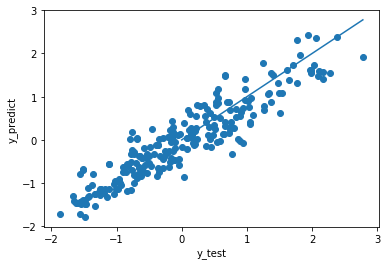

In [700]:
fig, ax = plt.subplots()
ax.scatter(y_test_scale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [701]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
SVR_Metrics1 = pd.DataFrame({'Model':['SVR'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
SVR_Metrics1=SVR_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
SVR_Metrics1

Model performance range with 95 percentage confidence level is : 84.301%  (11.266%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   SVR  0.378462        0.856766                 0.855496

In [702]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,SVR_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 84.301%  (11.266%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496

In [703]:
# Inference from the accuracy metrics:
# ------------------------------------
# SVR Performance is better
# The optimised model of SVR is
# SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
#    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

## KNN Regressor

In [704]:
X_train_stdscale = preprocessing.scale(X_train)
X_test_stdscale = preprocessing.scale(X_test)
y_train_stdscale = preprocessing.scale(y_train)
y_test_stdscale = preprocessing.scale(y_test)

In [705]:
param_grid={'n_neighbors':(1,2,3,4,5,6,7,8,9,10), 
            'metric':('euclidean', 'manhattan', 'chebyshev','minkowski')}
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train_stdscale,y_train_stdscale)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [706]:
gs=GridSearchCV(KNN_model,param_grid,cv=10)
gs.fit(X_train_stdscale,y_train_stdscale)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'),
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [707]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'metric': 'euclidean', 'n_neighbors': 3}
The model which produce best score is 0.7483143364887964
Standard deviation for the best model 0.08993465169195781


In [708]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 74.831%
 Standard Deviation : 8.99347%


In [709]:
KNN_optimised_model = gs.best_estimator_
KNN_optimised_model.fit(X_train_stdscale,y_train_stdscale)
y_pred = KNN_optimised_model.predict(X_test_stdscale)

In [710]:
print("The accuracy score for training set is %12.16f" %KNN_optimised_model.score(X_train_stdscale,y_train_stdscale))
print("The accuracy score for testing set is %12.16f" %KNN_optimised_model.score(X_test_stdscale,y_test_stdscale))

The accuracy score for training set is 0.8834485743015784
The accuracy score for testing set is 0.7937326353466942


In [711]:
# r square value for testing
r_square_for_testing=KNN_optimised_model.score(X_test_stdscale,y_test_stdscale)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test_stdscale, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7937326353466942
The adjusted R Square value for testing set is 0.7919026333789210
The RMSE value for testing set is 0.4541666705663305


Text(0, 0.5, 'y_predict')

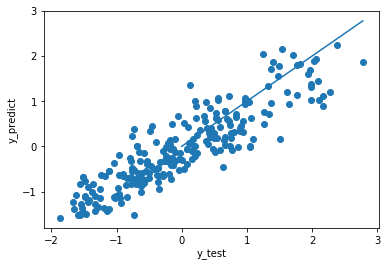

In [712]:
fig, ax = plt.subplots()
ax.scatter(y_test_stdscale, y_pred)
ax.plot([0, max(max(y_test_scale),max(y_pred))], [0, max(max(y_test_scale),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [713]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
KNN_Metrics1 = pd.DataFrame({'Model':['KNN'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
KNN_Metrics1=KNN_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
KNN_Metrics1

Model performance range with 95 percentage confidence level is : 74.831%  (17.627%)


Model      RMSE  R Square Value  Adjusted R Square Value
0   KNN  0.454167        0.793733                 0.791903

In [714]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,KNN_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 74.831%  (17.627%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903

In [715]:
# Inference from the accuracy metrics:
# ------------------------------------
# KNN Performance is very poor.
# It is observered that KNN Performs well for lower strength and poor at higher strength
# The optimised model of KNN is
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
#                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
#                    weights='uniform')

## Decision Tree Regressor

In [716]:
param_grid={'criterion':('mse','friedman_mse','mae'), 
             'max_depth':(3,6,9,12),
             'min_samples_split':(2,50,100,150,200)}
DT_model=DecisionTreeRegressor(random_state=1)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [717]:
gs=GridSearchCV(DT_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'friedman_mse', 'mae'),
                         'max_depth': (3, 6, 9, 12),
                         'min_samples_split': (2, 50, 100, 150, 200)},
             pre_dis

In [718]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 12, 'min_samples_split': 2}
The model which produce best score is 0.7689521804214005
Standard deviation for the best model 0.11174669018644269


In [719]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 76.895%
 Standard Deviation : 11.17467%


In [720]:
DT_optimised_model = gs.best_estimator_
DT_optimised_model.fit(X_train,y_train)
y_pred = DT_optimised_model.predict(X_test)

In [721]:
print("The accuracy score for training set is %12.16f" %DT_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %DT_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9929858440141642
The accuracy score for testing set is 0.8071080296287703


In [722]:
# r square value for testing
r_square_for_testing=DT_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8071080296287703
The adjusted R Square value for testing set is 0.8053966940234488
The RMSE value for testing set is 6.8779118162395481


Text(0, 0.5, 'y_predict')

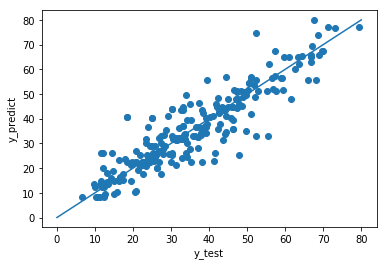

In [723]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [724]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
DecisionTree_Metrics1 = pd.DataFrame({'Model':['Decision Tree'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
DecisionTree_Metrics1=DecisionTree_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
DecisionTree_Metrics1

Model performance range with 95 percentage confidence level is : 76.895%  (21.902%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Decision Tree  6.877912        0.807108                 0.805397

In [725]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,DecisionTree_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 76.895%  (21.902%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   
0                             Decision Tree  6.877912        0.807108   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903  
0                 0.805397

In [726]:
# Inference from the accuracy metrics:
# ------------------------------------
# Decision Tree Regressor Performance is better than KNN but poorer than SVR.
# The optimised model of Decision Tree is
# DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
#                      max_leaf_nodes=None, min_impurity_decrease=0.0,
#                      min_impurity_split=None, min_samples_leaf=1,
#                      min_samples_split=2, min_weight_fraction_leaf=0.0,
#                      presort=False, random_state=1, splitter='best')

## Bagging Regressor

In [727]:
param_grid={'n_estimators':(25,50,100,150,200)}
Bagging_model=BaggingRegressor(max_samples=0.7,oob_score=True, random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=0.7, n_estimators=10,
                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
                 warm_start=False)

In [728]:
gs=GridSearchCV(Bagging_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=0.7,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=True, random_state=1,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [729]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'n_estimators': 100}
The model which produce best score is 0.8667738554761377
Standard deviation for the best model 0.04921000994587556


In [730]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 86.677%
 Standard Deviation : 4.92100%


In [731]:
Bagging_optimised_model = gs.best_estimator_
Bagging_optimised_model.fit(X_train,y_train)
y_pred = Bagging_optimised_model.predict(X_test)

In [732]:
print("The accuracy score for training set is %12.16f" %Bagging_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Bagging_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9678785767467483
The accuracy score for testing set is 0.8781172310468336


In [733]:
# r square value for testing
r_square_for_testing=Bagging_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8781172310468336
The adjusted R Square value for testing set is 0.8770358883565014
The RMSE value for testing set is 5.4672720477543937


Text(0, 0.5, 'y_predict')

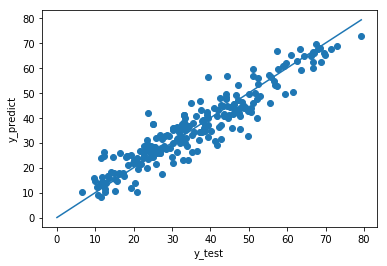

In [734]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [735]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Bagging_Metrics1 = pd.DataFrame({'Model':['Bagging'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Bagging_Metrics1=Bagging_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Bagging_Metrics1

Model performance range with 95 percentage confidence level is : 86.677%  (9.645%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Bagging  5.467272        0.878117                 0.877036

In [736]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,Bagging_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 86.677%  (9.645%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   
0                             Decision Tree  6.877912        0.807108   
0                                   Bagging  5.467272        0.878117   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903  
0                 0.805397  
0                 0.877036

In [737]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance
# The optimised model of Bagging Regressor is
# BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
#                 max_features=1.0, max_samples=0.7, n_estimators=100,
#                 n_jobs=None, oob_score=True, random_state=1, verbose=0,
#                 warm_start=False)

## Adaboost Regressor

In [738]:
param_grid={'n_estimators':(25,50,100,150,200),
           'learning_rate':(1.0,0.8,0.6,0.4)}
Adaboost_model=AdaBoostRegressor(random_state=1)
Adaboost_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [739]:
gs=GridSearchCV(Adaboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': (1.0, 0.8, 0.6, 0.4),
                         'n_estimators': (25, 50, 100, 150, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [740]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'learning_rate': 0.8, 'n_estimators': 100}
The model which produce best score is 0.7760919896241321
Standard deviation for the best model 0.04295395728413682


In [741]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 77.609%
 Standard Deviation : 4.29540%


In [742]:
Adaboost_optimised_model = gs.best_estimator_
Adaboost_optimised_model.fit(X_train,y_train)
y_pred = Adaboost_optimised_model.predict(X_test)

In [743]:
print("The accuracy score for training set is %12.16f" %Adaboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Adaboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.8233667881232450
The accuracy score for testing set is 0.7678506871242818


In [744]:
# r square value for testing
r_square_for_testing=Adaboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.7678506871242818
The adjusted R Square value for testing set is 0.7657910607743071
The RMSE value for testing set is 7.5454167165652972


Text(0, 0.5, 'y_predict')

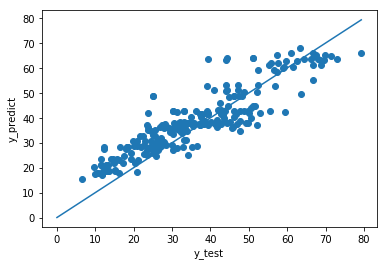

In [745]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [746]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Adaboost_Metrics1 = pd.DataFrame({'Model':['Adaboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Adaboost_Metrics1=Adaboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Adaboost_Metrics1

Model performance range with 95 percentage confidence level is : 77.609%  (8.419%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Adaboost  7.545417        0.767851                 0.765791

In [747]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,Adaboost_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 77.609%  (8.419%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   
0                             Decision Tree  6.877912        0.807108   
0                                   Bagging  5.467272        0.878117   
0                                  Adaboost  7.545417        0.767851   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903  
0                 0.805397  
0                 0.877036  
0                 0.765791

In [748]:
# Inference from the accuracy metrics:
# ------------------------------------
# Bagging has the excellent better performance than Ada Boosting
# The optimised model of AdaBoost Regressor is
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                  n_estimators=150, random_state=1)

## Gradient Boosting Regressor

In [749]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('friedman_mse', 'mse'),
            'max_depth' : (3,5,7,9)}
Gradientboost_model=GradientBoostingRegressor(random_state=1)
Gradientboost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [750]:
gs=GridSearchCV(Gradientboost_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [751]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 200}
The model which produce best score is 0.8757881833301486
Standard deviation for the best model 0.044941333664498935


In [752]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 87.579%
 Standard Deviation : 4.49413%


In [753]:
Gradientboost_optimised_model = gs.best_estimator_
Gradientboost_optimised_model.fit(X_train,y_train)
y_pred = Gradientboost_optimised_model.predict(X_test)

In [754]:
print("The accuracy score for training set is %12.16f" %Gradientboost_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %Gradientboost_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9925537625519965
The accuracy score for testing set is 0.9058706110757486


In [755]:
# r square value for testing
r_square_for_testing=Gradientboost_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.9058706110757486
The adjusted R Square value for testing set is 0.9050354960916298
The RMSE value for testing set is 4.8046543341750372


Text(0, 0.5, 'y_predict')

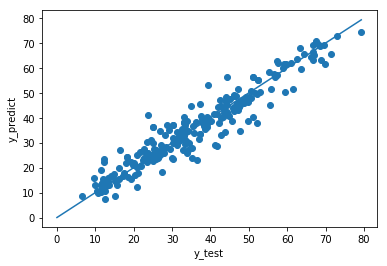

In [756]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [757]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
Gradientboost_Metrics1 = pd.DataFrame({'Model':['Gradientboost'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
Gradientboost_Metrics1=Gradientboost_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
Gradientboost_Metrics1

Model performance range with 95 percentage confidence level is : 87.579%  (8.809%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Gradientboost  4.804654        0.905871                 0.905035

In [758]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,Gradientboost_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 87.579%  (8.809%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   
0                             Decision Tree  6.877912        0.807108   
0                                   Bagging  5.467272        0.878117   
0                                  Adaboost  7.545417        0.767851   
0                             Gradientboost  4.804654        0.905871   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903  
0                 0.805397  
0                 0.877036  
0                 0.765791  
0                 0.905035

In [759]:
# Inference from the accuracy metrics:
# ------------------------------------
# Gradient Boosting Performance is better
# The optimised model of Gradient Boosting Regressor is
# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                          learning_rate=0.1, loss='ls', max_depth=3,
#                          max_features=None, max_leaf_nodes=None,
#                          min_impurity_decrease=0.0, min_impurity_split=None,
#                          min_samples_leaf=1, min_samples_split=2,
#                          min_weight_fraction_leaf=0.0, n_estimators=200,
#                          n_iter_no_change=None, presort='auto', random_state=1,
#                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                          verbose=0, warm_start=False)

## Random Forest Regressor

In [760]:
param_grid={'n_estimators':(25,50,100,150,200),
           'criterion':('mae', 'mse'),
            'max_depth' : (3,5,7,9)}
RandomForest_model=RandomForestRegressor(random_state=1)
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [761]:
gs=GridSearchCV(RandomForest_model,param_grid,cv=10)
gs.fit(X_train,y_train)

C:\Users\BRENIE SEKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mae', 'mse'), 'max_dep

In [762]:
print('The best parameter is', gs.best_params_)
print('The model which produce best score is', gs.best_score_)
print('Standard deviation for the best model', gs.cv_results_['std_test_score'][gs.best_index_])

The best parameter is {'criterion': 'mse', 'max_depth': 9, 'n_estimators': 200}
The model which produce best score is 0.8690398144668791
Standard deviation for the best model 0.049627875276008045


In [763]:
print(' Mean Accuracy      : %.3f%%'  % (gs.best_score_*100.0))
print(' Standard Deviation : %.5f%%'  % (gs.cv_results_['std_test_score'][gs.best_index_]*100.0))

 Mean Accuracy      : 86.904%
 Standard Deviation : 4.96279%


In [764]:
RandomForest_optimised_model = gs.best_estimator_
RandomForest_optimised_model.fit(X_train,y_train)
y_pred = RandomForest_optimised_model.predict(X_test)

In [765]:
print("The accuracy score for training set is %12.16f" %RandomForest_optimised_model.score(X_train,y_train))
print("The accuracy score for testing set is %12.16f" %RandomForest_optimised_model.score(X_test,y_test))

The accuracy score for training set is 0.9735798685796745
The accuracy score for testing set is 0.8747134150944026


In [766]:
# r square value for testing
r_square_for_testing=RandomForest_optimised_model.score(X_test,y_test)
print("R Square value for test dataset is %12.16f" %r_square_for_testing)

# Adjusted R square value
adjusted_r_squared = 1 - (1-r_square_for_testing)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("The adjusted R Square value for testing set is %12.16f" %adjusted_r_squared)


#Computing MSE & RMSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The RMSE value for testing set is %12.16f" %rmse)

R Square value for test dataset is 0.8747134150944026
The adjusted R Square value for testing set is 0.8736018737834530
The RMSE value for testing set is 5.5430885221314803


Text(0, 0.5, 'y_predict')

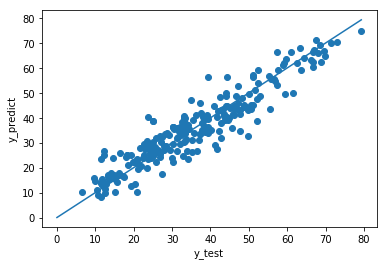

In [767]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(max(y_test),max(y_pred))], [0, max(max(y_test),max(y_pred))])
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [768]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

# Calculating Performance Parameters for the test data
RandomForest_Metrics1 = pd.DataFrame({'Model':['Random Forest'], 
                                       'RMSE': rmse,
                                       'R Square Value': r_square_for_testing, 
                                       'Adjusted R Square Value' : adjusted_r_squared})
RandomForest_Metrics1=RandomForest_Metrics1[['Model','RMSE', 'R Square Value', 'Adjusted R Square Value']]
RandomForest_Metrics1

Model performance range with 95 percentage confidence level is : 86.904%  (9.727%)


Model      RMSE  R Square Value  Adjusted R Square Value
0  Random Forest  5.543089        0.874713                 0.873602

In [769]:
# Calculating the Performance of the model at validation test with 95% Confidence Level
print('Model performance range with 95 percentage confidence level is : %.3f%%  (%.3f%%)'   % (gs.best_score_*100.0, gs.cv_results_['std_test_score'][gs.best_index_]*100.0*1.96))

Comparison_Table4=pd.concat([Comparison_Table4,RandomForest_Metrics1])
Comparison_Table4

Model performance range with 95 percentage confidence level is : 86.904%  (9.727%)


Model      RMSE  R Square Value  \
0                         Linear Regression  8.887346        0.677934   
0  Polynomial Regression - degree 2 & ridge  8.538338        0.702732   
0  Polynomial Regression - degree 2 & lasso  9.082830        0.663610   
0                                       SVR  0.378462        0.856766   
0                                       KNN  0.454167        0.793733   
0                             Decision Tree  6.877912        0.807108   
0                                   Bagging  5.467272        0.878117   
0                                  Adaboost  7.545417        0.767851   
0                             Gradientboost  4.804654        0.905871   
0                             Random Forest  5.543089        0.874713   

   Adjusted R Square Value  
0                 0.675076  
0                 0.700095  
0                 0.660625  
0                 0.855496  
0                 0.791903  
0                 0.805397  
0                 0.877036  
0                 0.765791  
0                 0.905035  
0                 0.873602

In [770]:
# Summary of Iteration 4:
# -------------------------
# Duplicate Data were removed 
# Feature Engineering were done
# Outliers were observed and removed
# Gradient Boost regressor has the best performance with 90.58 Score in training dataset
# The model has the performance range 87.579%  (8.809%) with 95% confidence level

In [771]:
# Comparing Iteration 1 and 3:
# -------------------------------------------------------
# Iteration 1: Removing Duplicate data
#              Outliers were observed and removed
#              Without feature engineering
# Iteration 3: Removing Duplicate data
#              Outliers were observed and removed
#              With feature engineering
# ---------------------------------------------------------
# The performance at Iteration 4 is better than Iteration 2